In [3]:
#to do 

#do you have an explanation for each figure 
# have to clean up titles into categories

#create a repository for every homework 

Topic: Individual election donations. Money talks, consistently the candidatae who spends the most money usually wins - to spend the most money, you have to raise the most money. Following the money is interesting because it has a cost - it seperates individuals who tolerate certain issues v others who advocate for it.

So where is this money coming from? Are there certain occupations who donate more on average than everyone else? How much is everyone donating? 

Dataset: The dataset contains 205,039 individual donations for 2021. The data includes committee, contributor full name/address/employer/occupation, contribution amount/date, ytd amount, election type/year, and contribution tax filings. 

I filtered 79 dimensions to 38 by removing columns that were redundanty or not significantly important (columns that didn't provide relevant information). This was still problematic. I could analyze the data but I wasn't able to visualize it or extract any meaning from the analysis. Importantly, data collected from forms are extremely dirty. They contain mispellings and titles that mean the same thing. For examaple, VP, V.P, and Vice President all mean the same thing. This is problematic because a lot of the functions that would normally not require a second thought (like grouping by occupation) were now impossible becuase there was too much data. As a result, significant amount was spent mapping a portion of the 250,000 redundant rows to their respective occupation. However, this mapping cannot correct for improper entries. Some individuals seemingly did not want to reveal their occupation and thus but their industry instead of their job title. Any adjustment for these entries (without additional information) would result in inaccurate data, as a result these wrong entries were left as is. 

The data source is here: https://www.fec.gov/data/receipts/individual-contributions/?two_year_transaction_period=2022

Guiding questions: 
Are certain genders (indicated by last names) more likely to donate than others? 
Which states, cities have the highest amount/count of donations?
What occupations donate the most? How much do these groups donate on averagae?

part 1 data cleaning

In [4]:
#import libraries
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("white")

import warnings
warnings.filterwarnings("ignore")

In [5]:
#read csv into dataframe
data = pd.read_csv('copy_ic.csv')

data.head()

,committee_id,committee_name,report_year,report_type,image_number,line_number,transaction_id,file_number,committee_name.1,entity_type,...,filing_form,link_id,is_individual,memo_text,two_year_transaction_period,schedule_type,increased_limit,sub_id,pdf_url,line_number_label
0,C00762229,BIDEN FIGHT FUND,2021,TER,2.021010e+17,11AI,28601729,1486476,NaN,IND,...,F3X,4.011120e+18,t,* EARMARKED CONTRIBUTION: SEE BELOW,2022,SA,NaN,4.011120e+18,https://docquery.fec.gov/cgi-bin/fecimg/?20210...,Contributions From Individuals/Persons Other T...
1,C00762229,BIDEN FIGHT FUND,2021,TER,2.021010e+17,11AI,28601863,1486476,NaN,IND,...,F3X,4.011120e+18,t,* EARMARKED CONTRIBUTION: SEE BELOW,2022,SA,NaN,4.011120e+18,https://docquery.fec.gov/cgi-bin/fecimg/?20210...,Contributions From Individuals/Persons Other T...
2,C00739177,KEVIN O'CONNOR FOR U.S. SENATE INC.,2021,TER,2.021010e+17,11AI,SA11AI.9976,1488559,NaN,IND,...,F3,4.011820e+18,t,NaN,2022,SA,NaN,4.012020e+18,https://docquery.fec.gov/cgi-bin/fecimg/?20210...,Contributions From Individuals/Persons Other T...
3,C00754408,FAMILIES FOR FREEDOM PAC,2021,30R,2.021010e+17,11AI,SA11AI.4200,1491012,NaN,IND,...,F3X,4.012720e+18,t,NaN,2022,SA,NaN,4.012820e+18,https://docquery.fec.gov/cgi-bin/fecimg/?20210...,Contributions From Individuals/Persons Other T...
4,C00763433,GALEO IMPACT FUND PAC,2021,30R,2.021010e+17,11AI,SA11AI.23942,1490390,NaN,IND,...,F3X,4.012520e+18,t,NaN,2022,SA,NaN,4.012820e+18,https://docquery.fec.gov/cgi-bin/fecimg/?20210...,Contributions From Individuals/Persons Other T...


In [6]:
#convert contribution date to date-time object
data['contribution_receipt_date'] =  pd.to_datetime(data['contribution_receipt_date'], format='%m/%d/%y')

In [7]:
# replace empty cells with NaN
print(data.replace(r'^\s*$', np.nan, regex=True))

   committee_id                                     committee_name  \
0     C00762229                                   BIDEN FIGHT FUND   
1     C00762229                                   BIDEN FIGHT FUND   
2     C00739177                KEVIN O'CONNOR FOR U.S. SENATE INC.   
3     C00754408                           FAMILIES FOR FREEDOM PAC   
4     C00763433                              GALEO IMPACT FUND PAC   
5     C00763433                              GALEO IMPACT FUND PAC   
6     C00763433                              GALEO IMPACT FUND PAC   
7     C00763433                              GALEO IMPACT FUND PAC   
8     C00273003  AMERICAN ASSOCIATION OF CLINICAL UROLOGISTS PA...   
9     C00754069                                                PAF   
10    C00754069                                                PAF   
11    C00748681                                PATRIOTS FOR CHANGE   
12    C00232272  PAN-AMERICAN LIFE INSURANCE COMPANY PAC (PALIC...   
13    C00232272  PAN

In [8]:
#describe columns and type of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 79 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   committee_id                           48 non-null     object        
 1   committee_name                         48 non-null     object        
 2   report_year                            48 non-null     int64         
 3   report_type                            48 non-null     object        
 4   image_number                           48 non-null     float64       
 5   line_number                            48 non-null     object        
 6   transaction_id                         48 non-null     object        
 7   file_number                            48 non-null     int64         
 8   committee_name.1                       0 non-null      float64       
 9   entity_type                            48 non-null     object      

In [9]:
#get the data shape
data.shape

(48, 79)

In [10]:
#get the data types
pd.set_option('display.max_rows',80)
data.dtypes

committee_id                                     object
committee_name                                   object
report_year                                       int64
report_type                                      object
image_number                                    float64
line_number                                      object
transaction_id                                   object
file_number                                       int64
committee_name.1                                float64
entity_type                                      object
entity_type_desc                                 object
unused_contbr_id                                 object
contributor_prefix                               object
contributor_name                                 object
recipient_committee_type                         object
recipient_committee_org_type                     object
recipient_committee_designation                  object
contributor_first_name                          

Data Wrangling & Checking for Nulls

In [11]:
# filter out irrelevant 
columnsdata = data.drop(['committee_id','report_type','image_number','line_number','transaction_id','file_number','committee_name','contributor_id','memo_code_full','candidate_id','candidate_name','candidate_first_name','candidate_last_name','candidate_middle_name','candidate_prefix','candidate_suffix','candidate_office','candidate_office_full','candidate_office_state','candidate_office_state_full','candidate_office_district','conduit_committee_id','conduit_committee_name','conduit_committee_street1','conduit_committee_street2','conduit_committee_city','conduit_committee_state','conduit_committee_zip','donor_committee_name','national_committee_nonfederal_account','amendment_indicator_desc','schedule_type_full','original_sub_id','link_id','is_individual','memo_text','two_year_transaction_period','schedule_type','increased_limit','sub_id','pdf_url'], axis=1)

In [12]:
dr_mapping = {"VETERINARIAN" : "ANIMAL BEHAVIORIST","VETERINARIAN" : "ANIMAL CARE TECHNICIAN","VETERINARIAN" : "ANIMAL CONTROL OFFICER","VETERINARIAN" : "ANIMAL RESCUE","VETERINARIAN" : "ANIMAL TRAINER","VETERINARIAN" : "ANIMATOR","VETERINARIAN" : "VET","VETERINARIAN" : "VET TECH","VETERINARIAN" : "VETERINARIAN","VETERINARIAN" : "VETERINARY PATHOLOGIST","VETERINARIAN" : "VETERINARY SURGEON","VETERINARIAN" : "VETRANS DISABILITY LAW AGENT","TRANSIT" : "TRANSIT","TRANSIT" : "TRANSIT OPERATOR","TRANSIT" : "TRANSIT PLANNER","TRANSIT" : "TRANSIT PLANNING","TRANSLATOR" : "TRANSLATOR","TRANSLATOR" : "TRANSLATOR & TUTOR","VETERAN" : "VETERAN","VETERAN" : "VETERAN SERVICE OFFICER","VETERAN" : "VETERAN'S ADVOCATE","VETERAN" : "VETERANS BENEFITS COUNSELOR","VETERAN" : "VETERANS SERVICE OFFICER","VETERAN" : "VETERINAR","ANTIQUES" : "ANTIQUARIAN BOOK DEALER","ANTIQUES" : "ANTIQUE DEALER","ANTIQUES" : "ANTIQUES DEALER","SURGEON" : "UROLOGIC SURGEON","SURGEON" : "SURGEON","SURGEON" : "TRANSPLANT SURGEON","DOCTOR" : "NATUROPATHIC DOCTOR","DOCTOR" : "ANESTHESIOLOGIST","DOCTOR" : "PHYSICIAN","DOCTOR" : "NEUROSURGEON","DOCTOR" : "MAXILLOFACIAL RADIOLOGY","DOCTOR" : "OPTOMETRIST","DOCTOR" : "NEUROPSYCHOLOGIST","DOCTOR" : "FACULTY PHYSICIAN","DOCTOR" : "PEDIATRICIAN","DOCTOR" : "NURSE","DOCTOR" : "PHYSICIAM","SCIENTIST" : "BIOMEDICAL RESEARCH","SCIENTIST" : "SCIENTIST","SCIENTIST" : "ARIZONA RESEARCH CENTER","SCIENTIST" : "AI RESEARCH","SCIENTIST" : "RESEARCH","SCIENTIST" : "RESEARCH & DEVELOPMENT ENGINEER","SCIENTIST" : "RESEARCH ADMIN","SCIENTIST" : "RESEARCH ADMINISTRATOR","SCIENTIST" : "RESEARCH ANALYST","SCIENTIST" : "RESEARCH AND ANALYTICS","SCIENTIST" : "RESEARCH AND DEVELOPMENT","SCIENTIST" : "RESEARCH AND PROJECT COORDINATOR","SCIENTIST" : "RESEARCH ASSISTANT","SCIENTIST" : "RESEARCH ASSISTANT PROFESSOR","SCIENTIST" : "RESEARCH ASSOC.","SCIENTIST" : "RESEARCH ASSOCIATE","SCIENTIST" : "RESEARCH CHEMIST","SCIENTIST" : "RESEARCH CONSULTANT","SCIENTIST" : "RESEARCH COORDINATOR","SCIENTIST" : "RESEARCH DIRECTOR","SCIENTIST" : "RESEARCH ECOLOGIST","SCIENTIST" : "RESEARCH ENGINEER","SCIENTIST" : "RESEARCH EXECUTIVE","SCIENTIST" : "RESEARCH FINANCE","SCIENTIST" : "RESEARCH LAB SUPERVISOR","SCIENTIST" : "RESEARCH LABORATORY SUPERVISOR","SCIENTIST" : "RESEARCH LEADER","SCIENTIST" : "RESEARCH LIBRARIAN","SCIENTIST" : "RESEARCH MANAGER","SCIENTIST" : "RESEARCH NURSE","SCIENTIST" : "RESEARCH PHYSICIAN","SCIENTIST" : "RESEARCH PHYSICIST","SCIENTIST" : "RESEARCH PROFESSOR","SCIENTIST" : "RESEARCH REVIEWER","SCIENTIST" : "RESEARCH SCIENTIST","SCIENTIST" : "RESEARCH STAFF MEMBER","SCIENTIST" : "RESEARCH TECH","SCIENTIST" : "RESEARCH TECHNICIAN","SCIENTIST" : "RESEARCH TECHNOLOGIST","SCIENTIST" : "RESEARCH WRITING ARCHIVES WEB","SCIENTIST" : "RESEARCH, SALES MARKETING","SCIENTIST" : "RESEARCHER","UNEMPLOYED" : "UNEMPLOYED","UNEMPLOYED" : "UNEMPLOYED TRUCKER","WEB DEVELOPER" : "WEB DEVELOPER","WEB DEVELOPER" : "WEB APPLICATION DEVELOPER","WEB DEVELOPER" : "WEB DESIGNER","WEB DEVELOPER" : "WEB DEVELOPER","WEB DEVELOPER" : "WEB DEVELOPER ANALYST SENIOR","WEB DEVELOPER" : "WEB DEVELOPMENT","WEB DEVELOPER" : "WEB PRODUCER","WEB DEVELOPER" : "WEB PROGRAMMER","WEB DEVELOPER" : "WEB PROJECT MANAGER","WEB DEVELOPER" : "WEB SITE DESIGN","WEB DEVELOPER" : "WEB SITE EDITOR","WEB DEVELOPER" : "WEBMASTER","WEB DEVELOPER" : "WEBSITE DEVELOPER","TREASURE" : "TREASURE ","TREASURE" : "TREASURER","TREASURE" : "TREASURER AND TAX DIRECTOR","TREASURE" : "TREASURER, KOCH INDUSTRIES","TRAVEL PLANNER" : "TRAVEL PLANNER","TRAVEL PLANNER" : "TRAVEL/TOUR OPERATOR","TRAVEL PLANNER" : "TRAVEL INDUSTRY","TRAVEL PLANNER" : "TRAVEL","TRAVEL PLANNER" : "TRAVEL ADVISOR","TRAVEL PLANNER" : "TRAVEL AGENCY OWNER","TRAVEL PLANNER" : "TRAVEL AGENT","TRAVEL PLANNER" : "TRAVEL COORDINATOR","DESIGNER" : "DESIGNER ","DESIGNER" : "UX DESIGN MANAGER","DESIGNER" : "UX DESIGNER","DESIGNER" : "USER DESIGN","DESIGNER" : "USER DESIGNER","DESIGNER" : "USER EXPERIENCE DESIGNER","CONSULTANT" : "CONSULTANT","CONSULTANT" : "TECHNOLOGY CONSULTANT","CONSULTANT" : "TRANSPORTATION CONSULTANT","CONSULTANT" : "TRAVEL DESIGN CONSULTANT","CONSULTANT" : "WARDROBE CONSULTANT","CONSULTANT" : "TREASURY CONSULTANT","CONSULTANT" : "UNISERV CONSULANT","CONSULTANT" : "MONPROFIT CONSULTANT","CONSULTANT" : "WELLNESS CONSULTANT","CONSULTANT" : "WINE CONSULTANT","CONSULTANT" : "CONSULTANT","CONSULTANT" : "DIRECTOR & CONSULTANT","CONSULTANT" : "IT CONSULTING","CONSULTANT" : "AG CONSULTANT","CONSULTANT" : "LOGISTICS CONSULTANT","CONSULTANT" : "SALES-CONSULTING","CONSULTANT" : "AEROSPACE CONSULTANT","CONSULTANT" : "ANALYTICS CONSULTANT","CONSULTANT" : "APP. CNSLT.","CONSULTANT" : "ARCHITECT/PASSIVE HOUSE CONSULTANT51","CONSULTANT" : "ART CONSULTANT","CONSULTANT" : "ARTS CONSULTANT","CONSULTANT" : "ACCOUNTANT/FINANCIAL CONSULTANT","CONSULTANT" : "UTILITY CONSULTANT","CONSULTANT" : "GOVERNMENT RELATIONS CONSULTANT","CONSULTANT" : "GOVERNMENT RELATIONS CONSULTANT V","CONSULTANT" : "GOVERNMENT AFFAIRS CONSULTANT","CONSULTANT" : "GOVERNMENT AFFAIR CONSULTANT","TRUCK DRIVER" : "TRUCK DRIVER","TRUCK DRIVER" : "TRUCK DRIVER OWNER/OPERATOR","TRUCK DRIVER" : "TRUCK DRIVER/ SELF EMPLOYED","TRUCK DRIVER" : "TRUCK DRIVERS","TRUCK DRIVER" : "TRUCK ONE","TRUCK DRIVER" : "TRUCK OPERATOR","TRUCK DRIVER" : "TRUCK REPAIR","TRUCK DRIVER" : "TRUCK SALES","TRUCK DRIVER" : "TRUCK/OWNER/OPERATOR","TRUCK DRIVER" : "TRUCKDRIVER","TRUCK DRIVER" : "TRUCKER","TRUCK DRIVER" : "TRUCKING","TRUCK DRIVER" : "TRUCKING/FARMING","TRUCK DRIVER" : "TRUCKLOAD MANAGER I","SUPERVISOR" : "SUPERVISOR","SUPERVISOR" : "MAINTENANCE SUPERVISOR","SUPERVISOR" : "AP/AR SUPERVISOR","SENIOR SUPERVISOR" : "SENIOR SUPERVISOR","SENIOR SUPERVISOR" : "TV PRODUCTION EXECUTIVE","SENIOR SUPERVISOR" : "TECHNOLOGY EXECUTIVE","SENIOR SUPERVISOR" : "SENIOR LOAN UNDERWRITER","SENIOR SUPERVISOR" : "WATER TREATMENT PLANT SUPPERINTENDANT","SENIOR SUPERVISOR" : "ANALYST IT BUSINESS SR","CEO" : "CEO","CEO" : "CEO - AMR REGIONAL","CEO" : "CEO - HEALTH PLANS","CEO" : "CEO - SALES","CEO" : "CEO (RET.)","CEO" : "CEO / GENERAL MANAGER","CEO" : "CEO / HEAD OF JPMS","CEO" : "CEO & CHAIRMAN","CEO" : "CEO & DIRECTOR","CEO" : "CEO & FOUNDER","CEO" : "CEO & GENERAL COUNSEL","CEO" : "CEO & PRESIDENT","CEO" : "CEO ANCILLARY & IND/SGT CAO","CEO" : "CEO AND CHAIRMAN","CEO" : "CEO AND FOUNDER","CEO" : "CEO AND OWNER","CEO" : "CEO AND PRESIDENT","CEO" : "CEO AND PRESIDENT - AMR","CEO" : "CEO AND WEALTH ADVISOR","CEO" : "CEO CHAIRMAN OF THE BOARD","CEO" : "CEO CHAMPION ENERGY SERVICES","CEO" : "CEO CHRISTIAN PHILANTHROPIC FOUNDATION","CEO" : "CEO ENGINEER","CEO" : "CEO FINANCE","CEO" : "CEO II","CEO" : "CEO INSURANCE DATA SOLUTIONS","CEO" : "CEO LBR. INDUSTRY","CEO" : "CEO MED GRP NON PHYSN","CEO" : "CEO MED GRP PHYSN","CEO" : "CEO MINISTER PUBLISHED AUTHOR","CEO" : "CEO OF A NATIONAL RADIO SHOW","CEO" : "CEO OF DIGITAL MARKETING TRAINING COMP","CEO" : "CEO PRES","CEO" : "CEO PRESIDENT OWNER","CEO" : "CEO UHC GOVT PRGMS","CEO" : "CEO UNTD ADVC HLTH EQTY & SVP","CEO" : "CEO-AT&T LATIN & GLOBAL MKTG OFFICER","CEO" : "CEO,","CEO" : "CEO, CARDINAL HEALTH","CEO" : "CEO, FORD DIRECT","CEO" : "CEO, HEALTHY BLUE","CEO" : "CEO, MAGELLAN RX MANAGEMENT","CEO" : "CEO, PHARMACEUTICAL SEGMENT","CEO" : "CEO, PRESIDENT","CEO" : "CEO, PRESIDENT OWNER","CEO" : "CEO, RGAX","CEO" : "CEO, YOUTUBE","CEO" : "CEO/ATTORNEY","CEO" : "CEO/ENGINEER","CEO" : "CEO/ENVIRONMENTAL DIRECTOR","CEO" : "CEO/FOUNDER","CEO" : "CEO/GENERAL MANAGER","CEO" : "CEO/OWNER","CEO" : "CEO/PORTFOLIO MANAGER","CEO" : "CEO/PRESIDENT","CEO" : "CEO/PSYCHOLOGIST/OWNER","CEO" : "501849 - CEO, INDIVIDUAL SOLUTIONS","CEO" : "601497 - CEO, WORKPLACE SOLUTIONS","CFO" : "CFO","CFO" : "CFO & PAC TREASURER","CFO" : "CFO & PRESIDENT L&A","CFO" : "CFO & TREASURER","CFO" : "CFO AND TREASURER","CFO" : "CFO CENTRAL & EASTERN EUROPE","CFO" : "CFO CONNECTED AIRCRAFT","CFO" : "CFO DEFENSE","CFO" : "CFO FIRE & SECURITY HBT","CFO" : "CFO HBS SERVICES","CFO" : "CFO HGAS SPS","CFO" : "CFO MOBILITY","CFO" : "CFO OWNER","CFO" : "CFO PPR","CFO" : "CFO SIOT","CFO" : "CFO, NORTH AMERICA","CFO" : "CFO, THE NIKE BRAND","CFO" : "CFO, TOOLS & STORAGE AND SBD CORPORATE","CFO" : "CFO/ COO","CFO" : "CFO/CCO","CFO" : "CFO/COO","CFO" : "CFO/OWNER","CFO" : "CFO/PARTNER","CFO" : "501950 - CHIEF FINANCIAL OFFICER - IND","CHIEF OFFICIER" : "CHIEF OFFICIER","CHIEF OFFICIER" : "501565 - CHIEF ETHICS OFFICER","CHIEF OFFICIER" : "501549 - CHIEF COMPLIANCE OFFICER","CHIEF OFFICIER" : "500379 - CHIEF TECHNOLOGY OFFICER-DIV","CHIEF OFFICIER" : "CHIEF ACCOUNTING OFFICER","CHIEF OFFICIER" : "CHIEF ACCOUNTING OFFICER AND HEAD OF T","CHIEF OFFICIER" : "CHIEF ACTUARY & RISK OFFICER","CHIEF OFFICIER" : "CHIEF ADMIN OFFICER","CHIEF OFFICIER" : "CHIEF ADMINISTRATIVE AND HUMAN RESOURC","CHIEF OFFICIER" : "CHIEF ADMINISTRATIVE OFFICER","CHIEF OFFICIER" : "CHIEF ADMINSTRATION OFFICER","CHIEF OFFICIER" : "CHIEF ADVOCACY OFFICER","CHIEF OFFICIER" : "CHIEF ANALYTICS OFFICER","CHIEF OFFICIER" : "CHIEF BUILDING OFFICIAL","CHIEF OFFICIER" : "CHIEF BUSINESS DEVELOPMENT","CHIEF OFFICIER" : "CHIEF BUSINESS OFFICER, YOUTUBE","CHIEF OFFICIER" : "CHIEF BUSINESS OFFICER.","CHIEF OFFICIER" : "CHIEF BUSINESS OFFICIAL","CHIEF OFFICIER" : "CHIEF CALL CENTER PRACTICE LEADER","CHIEF OFFICIER" : "CHIEF CLAIM OFFICER & PRES HHI","CHIEF OFFICIER" : "CHIEF CLAIMS OFFICER","CHIEF OFFICIER" : "CHIEF CLIN OFF","CHIEF OFFICIER" : "CHIEF CLINICAL OFFICER","CHIEF OFFICIER" : "CHIEF COLLEAGUE EXP. OFFICER","CHIEF OFFICIER" : "CHIEF COMMERCIAL OFFICER","CHIEF OFFICIER" : "CHIEF COMMERCIAL OFFICER, GEHC DIGITAL","CHIEF OFFICIER" : "CHIEF COMMERCIAL OFFICER, KES","CHIEF OFFICIER" : "CHIEF COMMERCIAL OFFICER, N.A.","CHIEF OFFICIER" : "CHIEF COMMUNICATIONS & MARKETING OFFIC","CHIEF OFFICIER" : "CHIEF COMMUNICATIONS OFF.","CHIEF OFFICIER" : "CHIEF COMMUNICATIONS OFFICER","CHIEF OFFICIER" : "CHIEF COMPLI OFF","CHIEF OFFICIER" : "CHIEF COMPLIANCE OFF - BBVA US","CHIEF OFFICIER" : "CHIEF COMPLIANCE OFFICER","CHIEF OFFICIER" : "CHIEF COMPLIANCE, E&I ITGR GC","CHIEF OFFICIER" : "CHIEF CORP AFFAIRS OFFICER","CHIEF OFFICIER" : "CHIEF CORP RESP OFFICER","CHIEF OFFICIER" : "CHIEF CORPORATE CONTRACTS EXECUTIVE","CHIEF OFFICIER" : "CHIEF COUNSEL","CHIEF OFFICIER" : "CHIEF COURT CLERK","CHIEF OFFICIER" : "CHIEF CUST OFFCR & RETAIL EXEC","CHIEF OFFICIER" : "CHIEF CUSTOMER EXPERIENCE OFF.","CHIEF OFFICIER" : "CHIEF CUSTOMER OFFICER","CHIEF OFFICIER" : "CHIEF DATA OFFICER","CHIEF OFFICIER" : "CHIEF DEPUTY AUDITOR","CHIEF OFFICIER" : "CHIEF DEPUTY DIRECTOR","CHIEF OFFICIER" : "CHIEF DEVELOPMENT AND COMMUNICATIONS O","CHIEF OFFICIER" : "CHIEF DEVELOPMENT OFFICER","CHIEF OFFICIER" : "CHIEF DIGITAL AND TECHNOLOGY OFFICER","CHIEF OFFICIER" : "CHIEF DIGITAL HEALTH AND ANALYTICS OFF","CHIEF OFFICIER" : "CHIEF DIGITAL OFFICER","CHIEF OFFICIER" : "CHIEF DIGITAL TECH OFFICER","CHIEF OFFICIER" : "CHIEF DIVERSITY OFFICER","CHIEF OFFICIER" : "CHIEF ECONOMIST","CHIEF OFFICIER" : "CHIEF ENGINEER","CHIEF OFFICIER" : "CHIEF ENGINEER DESIGN & CONSTRUCTION","CHIEF OFFICIER" : "CHIEF ETHICS AND COMPLIANCE OFFICER","CHIEF OFFICIER" : "CHIEF EXEC OFFICER","CHIEF OFFICIER" : "CHIEF EXECUITVE OFFICER","CHIEF OFFICIER" : "CHIEF EXECUTIVE OFFICER","CHIEF OFFICIER" : "CHIEF EXECUTIVE OFFICER - GENENTECH","CHIEF OFFICIER" : "CHIEF EXECUTIVE OFFICER (18081)","CHIEF OFFICIER" : "CHIEF EXECUTIVE OFFICER & PRESIDENT","CHIEF OFFICIER" : "CHIEF EXECUTIVE OFFICER # WIRT","CHIEF OFFICIER" : "CHIEF EXECUTIVE OFFICER AND FOUNDER","CHIEF OFFICIER" : "CHIEF EXECUTIVE OFFICER I","CHIEF OFFICIER" : "CHIEF EXECUTIVE OFFICER-ORGANIZATION","CHIEF OFFICIER" : "CHIEF EXECUTIVE OFFICER, AERO ALLIANCE","CHIEF OFFICIER" : "CHIEF FILEMAKER DEVELOPER","CHIEF OFFICIER" : "CHIEF FIN/ADMIN OFFICER","CHIEF OFFICIER" : "CHIEF FINANCE OFFICER","CHIEF OFFICIER" : "CHIEF FINANCIAL AND STRATEGY OFFICER","CHIEF OFFICIER" : "CHIEF FINANCIAL OFFICER","CHIEF OFFICIER" : "CHIEF FINANCIAL OFFICER AND TREASURER","CHIEF OFFICIER" : "CHIEF FINANCIAL OFFICER CORP","CHIEF OFFICIER" : "CHIEF FINANCIAL OFFICER E&PS","CHIEF OFFICIER" : "CHIEF FINANCIAL OFFICER ES","CHIEF OFFICIER" : "CHIEF FINANCIAL OFFICER HPS","CHIEF OFFICIER" : "CHIEF FINANCIAL OFFICER I","CHIEF OFFICIER" : "CHIEF FINANCIAL OFFICER UOP","CHIEF OFFICIER" : "CHIEF FINANCIAL OFFICER, EXECUTIVE VIC","CHIEF OFFICIER" : "CHIEF FINANCIAL OFFICER, KIDNEY CARE","CHIEF OFFICIER" : "CHIEF FINANCIAL OFFICER/AGM","CHIEF OFFICIER" : "CHIEF GLOBAL IMPACT OFFICER","CHIEF OFFICIER" : "CHIEF GLOBAL SUPPLY CHAIN OFFICER","CHIEF OFFICIER" : "CHIEF GOV'T RELATIONS OFFICER","CHIEF OFFICIER" : "CHIEF GROWTH OFFICER","CHIEF OFFICIER" : "CHIEF HEALTH OFFICER","CHIEF OFFICIER" : "CHIEF HR OFFICER & CHIEF INCLUSION OFF","CHIEF OFFICIER" : "CHIEF HUMAN RESOURCES OFFICER","CHIEF OFFICIER" : "CHIEF HUMAN RESOURCES OFFICER AND GENE","CHIEF OFFICIER" : "CHIEF INCLUSION OFFICER","CHIEF OFFICIER" : "CHIEF INFO & PROD SEC OFFICER","CHIEF OFFICIER" : "CHIEF INFO OFFICER","CHIEF OFFICIER" : "CHIEF INFO SECURITY OFFICER","CHIEF OFFICIER" : "CHIEF INFORMATION OFFICER","CHIEF OFFICIER" : "CHIEF INFORMATION SECURITY OFFICER","CHIEF OFFICIER" : "CHIEF INTELLIGENCE OFFICER","CHIEF OFFICIER" : "CHIEF INTERNAL AUDITOR","CHIEF OFFICIER" : "CHIEF INVESTMENT OFFICER","CHIEF OFFICIER" : "CHIEF INVESTMENT OFFICER HIMCO","CHIEF OFFICIER" : "CHIEF IP COUNSEL","CHIEF OFFICIER" : "CHIEF ISC OFFICER HON SPS","CHIEF OFFICIER" : "CHIEF LABOR & EMPLOYMT COUNSEL","CHIEF OFFICIER" : "CHIEF LEGAL & COMPLIANCE OFFICER","CHIEF OFFICIER" : "CHIEF LEGAL & CORP AFFAIRS OFFICER","CHIEF OFFICIER" : "CHIEF LEGAL COUNSEL","CHIEF OFFICIER" : "CHIEF LEGAL OFFICER","CHIEF OFFICIER" : "CHIEF LEGAL OFFICER AND CORPORATE SECR","CHIEF OFFICIER" : "CHIEF LEGAL OFFICER AND GENERAL COUNSE","CHIEF OFFICIER" : "CHIEF LEGAL/COMPLIANCE OFFICER","CHIEF OFFICIER" : "CHIEF LENDING OFFICER","CHIEF OFFICIER" : "CHIEF LITIGATION COUNSEL","CHIEF OFFICIER" : "CHIEF MARKETING & BRAND OFFICER","CHIEF OFFICIER" : "CHIEF MARKETING AND SALES OFFICER","CHIEF OFFICIER" : "CHIEF MARKETING OFFICER","CHIEF OFFICIER" : "CHIEF MARKETING OFFICER & EXECUTIVE","CHIEF OFFICIER" : "CHIEF MATE","CHIEF OFFICIER" : "CHIEF MEDICAL AND CORPORATE AFFAIRS OF","CHIEF OFFICIER" : "CHIEF MEDICAL DIRECTOR","CHIEF OFFICIER" : "CHIEF MEDICAL INFO OFFICER","CHIEF OFFICIER" : "CHIEF MEDICAL LAB SCIENTIST","CHIEF OFFICIER" : "CHIEF MEDICAL OFFICER","CHIEF OFFICIER" : "CHIEF MEDICAL OFFICER, HEALTH GROUP","CHIEF OFFICIER" : "CHIEF MEDICAL OFFICER, HEALTH PLAN","CHIEF OFFICIER" : "CHIEF OF CORPORATE SERVICES","CHIEF OFFICIER" : "CHIEF OF POLICE","CHIEF OFFICIER" : "CHIEF OF STAFF","CHIEF OFFICIER" : "CHIEF OF STAFF & SENIOR DIRECTOR","CHIEF OFFICIER" : "CHIEF OF STAFF CHRO","CHIEF OFFICIER" : "CHIEF OF STAFF, BIOPHARMA","CHIEF OFFICIER" : "CHIEF OPER OFFICER","CHIEF OFFICIER" : "CHIEF OPERATING OFFICER","CHIEF OFFICIER" : "CHIEF OPERATING OFFICER - HIGHMARK HEA","CHIEF OFFICIER" : "CHIEF OPERATING OFFICER & CFO, GE AVIA","CHIEF OFFICIER" : "CHIEF OPERATING OFFICER & CHIEF OF STA","CHIEF OFFICIER" : "CHIEF OPERATING OFFICER AENB","CHIEF OFFICIER" : "CHIEF OPERATING OFFICER I","CHIEF OFFICIER" : "CHIEF OPERATING OFFICER, DAVITA INTERN","CHIEF OFFICIER" : "CHIEF OPERATING OFFICER, NAS","CHIEF OFFICIER" : "CHIEF OPERATING OFFICER, PRODUCTS AND","CHIEF OFFICIER" : "CHIEF OPERATIONS OFFICER","CHIEF OFFICIER" : "CHIEF OPS & TECHNOLOGY OFFICER","CHIEF OFFICIER" : "CHIEF PAC OFFICER - GLOBAL","CHIEF OFFICIER" : "CHIEF PEOPLE AND DIVERS","CHIEF OFFICIER" : "CHIEF PEOPLE OFFICER","CHIEF OFFICIER" : "CHIEF PERFORMANCE EXCELLENCE & STRATEG","CHIEF OFFICIER" : "CHIEF PILOT","CHIEF OFFICIER" : "CHIEF PLANNING OFFICER","CHIEF OFFICIER" : "CHIEF POLITICAL STRAT I","CHIEF OFFICIER" : "CHIEF PROCUREMENT OFFICER","CHIEF OFFICIER" : "CHIEF PRODUCT OFFICER","CHIEF OFFICIER" : "CHIEF PRODUCT OFFICER, GRS NA","CHIEF OFFICIER" : "CHIEF PRODUCT PLATFORM & OPS","CHIEF OFFICIER" : "CHIEF PRODUCT&SEGMENT OFFICER","CHIEF OFFICIER" : "CHIEF PUBLIC AFFAIRS OFFICER","CHIEF OFFICIER" : "CHIEF QUALITY AND LEARNING OFFICER","CHIEF OFFICIER" : "CHIEF REG & STATE EXT AFFAIRS OFFICER","CHIEF OFFICIER" : "CHIEF RESEARCH OFFICER","CHIEF OFFICIER" : "CHIEF REVENUE CYCLE OFFICER","CHIEF OFFICIER" : "CHIEF RISK OFFICER","CHIEF OFFICIER" : "CHIEF RISK OFFICER, GE CAPITAL","CHIEF OFFICIER" : "CHIEF RISK OFFICER, NEXTE","CHIEF OFFICIER" : "CHIEF RISK, AUDIT & COMPLIANCE OFFICER","CHIEF OFFICIER" : "CHIEF SAFETY OFFICER","CHIEF OFFICIER" : "CHIEF SALES OFFICER","CHIEF OFFICIER" : "CHIEF SCIENCE OFFICER","CHIEF OFFICIER" : "CHIEF SCIENTIFIC OFFICER","CHIEF OFFICIER" : "CHIEF SCIENTIFIC OFFICER, PRESIDENT, W","CHIEF OFFICIER" : "CHIEF SCIENTIFIC OFFIER","CHIEF OFFICIER" : "CHIEF SCIENTIST","CHIEF OFFICIER" : "CHIEF SECURITY OFFICER","CHIEF OFFICIER" : "CHIEF STGY TRANSFORM OFFICER","CHIEF OFFICIER" : "CHIEF STRAT & GBL HD OF MS PM","CHIEF OFFICIER" : "CHIEF STRATEGY AND CLIENT EXPERIENCE O","CHIEF OFFICIER" : "CHIEF STRATEGY OFFICER","CHIEF OFFICIER" : "CHIEF SUPPLY CHAIN OFFICER","CHIEF OFFICIER" : "CHIEF SUSTAINABILITY OFFICER","CHIEF OFFICIER" : "CHIEF SUSTAINABILITY OFFICER & VICE PR","CHIEF OFFICIER" : "CHIEF TALENT & ENT SRVCS OFFCR","CHIEF OFFICIER" : "CHIEF TALENT OFFICER","CHIEF OFFICIER" : "CHIEF TAX OFFICER","CHIEF OFFICIER" : "CHIEF TECH OFF","CHIEF OFFICIER" : "CHIEF TECH OFFICER BUS UNIT","CHIEF OFFICIER" : "CHIEF TECHNICAL OFFICER","CHIEF OFFICIER" : "CHIEF TECHNOLOGY AND RISK OFFICER","CHIEF OFFICIER" : "CHIEF TECHNOLOGY OFFIC","CHIEF OFFICIER" : "CHIEF TECHNOLOGY OFFICER","CHIEF OFFICIER" : "CHIEF TECHNOLOGY OFFICER, DEFENSE","CHIEF OFFICIER" : "CHIEF TECHNOLOGY OFFICER, DYNETICS","CHIEF OFFICIER" : "CHIEF TECHNOLOGY OFFICER, GE DIGITAL","CHIEF OFFICIER" : "CHIEF TRANSFORMATION OFFICER","CHIEF OFFICIER" : "CHIEF UNDERWRITING OFFICER","CHIEF OFFICIER" : "CHIEF WHOLESALE CREDIT RISK OFFICER -","CHIEF OFFICIER" : "330026 - GLOBAL CHIEF TECHNOLOGY OFFIC","CHIEF OFFICIER" : "501045 - CHIEF OF STAFF/HEAD OF EXECUT","CHIEF OFFICIER" : "501149 - CHIEF MARKETING OFFICER","HEAD" : "TREASURER, HEAD OF IR & RISK","HEAD" : "501006 - HEAD OF INFORCE PRODUCT MGMT","HEAD" : "501058 - HEAD OF OPERATIONAL RISK MANA","HEAD" : "501102 - HEAD OF TAX","HEAD" : "501146 - HEAD OF PRODUCT & PRICING","HEAD" : "501388 - HEAD OF INTERNAL AUDIT","HEAD" : "502036 - HEAD OF ENTERPRISE TRANSFORMA","HEAD" : "502039 - HEAD OF TRANSFORMATION - INDI","HEAD" : "600628 - HEAD OF TRANSAMERICA INSTITUT","HEAD" : "600851 - HEAD OF TRANSAMERICA ASSET MA","HEAD" : "601605 - HEAD OF TAM INVESTMENTS","HEAD" : "601775 - HEAD OF COMPETITIVE ANALYSIS","HEAD" : "602184 - HEAD OF CAPITAL STRATEGY","SVP" : "601267 - SVP & CHIEF RISK OFFICER","COO" : "501457 - COO WORKPLACE SOLUTIONS","EXECUTIVE" : "AGRICULTURAL BUSINESS EXECUTIVE","EXECUTIVE" : "ACCOUNT EXECUTIVE","EXECUTIVE" : "ACCOUNT EXECUTIVE, COMMERCIAL INSURANC","EXECUTIVE" : "ASSN EXRCUTIVE","INVESTOR" : "INVESTOR","INVESTOR" : "AGRICULTURAL INVESTOR","INVESTOR" : "WAKEFIELD INVESTMENTS","SERVER" : "SERVER","SERVER" : "WAITER","SERVER" : "WAITRESS","SERVER" : "WAITSTAFF","DIRECTOR" : "TECHNICAL ACCOUNT MANAGER","DIRECTOR" : "TECHNOLOGY DIRECTOR","DIRECTOR" : "YOUTH DIRECTOR","DIRECTOR" : "DIRECTOR OF TECHNOLOGY","DIRECTOR" : "EXECUTIVE DIRECTOR","DIRECTOR" : "DIRECTOR FM","DIRECTOR" : "TELEVISION TECHNICAL DIRECTOR","DIRECTOR" : "HUMAN RESOURCES DIRECTOR","DIRECTOR" : "SALES DIRECTOR","DIRECTOR" : "UNISERV DIRECTOR","DIRECTOR" : "ASSET MANAGEMENT DIRECTOR","DIRECTOR" : "ACCOUNT DIRECTOR","DIRECTOR" : "ANALYTICS CONSULTING DIRECTOR","DIRECTOR" : "ADVOCACY DIRECTOR","DIRECTOR" : "501180 - SENIOR DIRECTOR, FINANCIAL PO","DIRECTOR" : "501128 - SENIOR DIRECTOR OPERATIONS","DIRECTOR" : "500456 - SR DIRECTOR, RISK MANAGEMENT","DIRECTOR" : "300926 - DIRECTOR STATE GOVERNMENT REL","DIRECTOR" : "DIR ENVIRONMENTAL REGULATORY ANALYSIS","DIRECTOR" : "DIR ACCOUNTING/FINANCIAL","DIRECTOR" : "DIR ASSET MANAGEMENT","DIRECTOR" : "DIR AUDIT IT","DIRECTOR" : "DIR BUS REL MGMT & COMPUTING SERVICES","DIRECTOR" : "DIR BUSINESS DEVELOPMENT 2","DIRECTOR" : "DIR CHILDHOOD FAITH FORMATION","DIRECTOR" : "DIR COLUMBIA CLASSCONSTRUCTI","DIRECTOR" : "DIR COMML & RESI REAL ESTATE","DIRECTOR" : "DIR COMMUNITY/FED AFFAIRS","DIRECTOR" : "DIR COMPENSATION & BENEFITS","DIRECTOR" : "DIR CONTINUOUS IMPROVEMENT","DIRECTOR" : "DIR CONTRACT MGMT WW SALES","DIRECTOR" : "DIR CORP ETHICS & COMPLIANCE","DIRECTOR" : "DIR CORPORATE FINANCE","DIRECTOR" : "DIR CORPORATE TAXES","DIRECTOR" : "DIR DELIVERY","DIRECTOR" : "DIR DIST OPS CNTR","DIRECTOR" : "DIR ELECTRIC DELIVERY","DIRECTOR" : "DIR ELECTRIC DELIVERY SUPT SRVS","DIRECTOR" : "DIR ENVIRONMENTAL","DIRECTOR" : "DIR ETHICS HR & PRIVACY","DIRECTOR" : "DIR FEDERAL REG AFFAIRS","DIRECTOR" : "DIR GAS PORTFOLIO ANALYTICS","DIRECTOR" : "DIR GOV & PUBLIC AFFAIRS","DIRECTOR" : "DIR GOVERNMENT AFFAIRS 2","DIRECTOR" : "DIR GOVERNMENT RELATIONS","DIRECTOR" : "DIR GOVT AFFS","DIRECTOR" : "DIR HEAD OF PUBLIC CREDI","DIRECTOR" : "DIR HUMAN RESOURCES","DIRECTOR" : "DIR II- GOV RELATIONS","DIRECTOR" : "DIR INVESTMENT SERVICES OPS","DIRECTOR" : "DIR IT","DIRECTOR" : "DIR IT TELECOM OPS","DIRECTOR" : "DIR LEGAL AND REGULATORY","DIRECTOR" : "DIR LIFT EQUIP MAINT & RELIABI","DIRECTOR" : "DIR M A","DIRECTOR" : "DIR MARKETING","DIRECTOR" : "DIR MARKETING & SALES","DIRECTOR" : "DIR MAT'L ACQUIS","DIRECTOR" : "DIR MISTRAL, INTL LNDG & GTF","DIRECTOR" : "DIR MKTG & STRATEGIC PLANNIN","DIRECTOR" : "DIR MKTG BUS DEV","DIRECTOR" : "DIR MKTG PLNG & FRCSTNG","DIRECTOR" : "DIR NETWORK ENGINEERING & OPERATIONS","DIRECTOR" : "DIR NEW CONSTRUCTION PROGRA","DIRECTOR" : "DIR NYLON RAW MATERIALS","DIRECTOR" : "DIR OF ENG - ELECTRICAL","DIRECTOR" : "DIR OF FINANCE","DIRECTOR" : "DIR OF OPERATIONS","DIRECTOR" : "DIR OPNS WORKFORCE MGMT","DIRECTOR" : "DIR PHARM OPS","DIRECTOR" : "DIR PRODUCT SOURCE PLNG. & RE","DIRECTOR" : "DIR PROJECTS","DIRECTOR" : "DIR PUBLIC AFFAIRS & COMMS - BU II","DIRECTOR" : "DIR REAL ESTATE SERVICES","DIRECTOR" : "DIR REG RELATIONS - BBVA US","DIRECTOR" : "DIR REGL AFFS","DIRECTOR" : "DIR REGULATORY ANALYSIS","DIRECTOR" : "DIR REVENUE MGMT","DIRECTOR" : "DIR RISK MGMT","DIRECTOR" : "DIR SALES","DIRECTOR" : "DIR SBA SALES & OPERATIONS","DIRECTOR" : "DIR SECURITY","DIRECTOR" : "DIR SERVICE DESIGN","DIRECTOR" : "DIR SOLUTIONS ARCHITECTURE","DIRECTOR" : "DIR SPECIAL PROJECTS","DIRECTOR" : "DIR STATE GOV'T AFFAIRS","DIRECTOR" : "DIR STRANDED RESOURCES TECH","DIRECTOR" : "DIR STRATEGY AND BUSINESS DEVELOPMENT","DIRECTOR" : "DIR SUPPLY CHAIN","DIRECTOR" : "DIR TARIFFS COMPLIANCE & FRCC RELATION","DIRECTOR" : "DIR TECHNICAL SERVICES","DIRECTOR" : "DIR TECHNOLOGY SERVICES","DIRECTOR" : "DIR TRACK MNTCE","DIRECTOR" : "DIR TRAIN MGMT","DIRECTOR" : "DIR TRANSMISSION & SHARED SERVICES","DIRECTOR" : "DIR US COMMUNICATIONS","DIRECTOR" : "DIR US LEGAL","DIRECTOR" : "DIR-AVIATION & TRAVEL SERVICES","DIRECTOR" : "DIR-BUSINESS OPS EXECUTIVE (PROGRAM MA","DIRECTOR" : "DIR-CORPORATE JET PILOT EXECUTIVE (FLI","DIRECTOR" : "DIR-ENGINEERING MULTI-SKILL LEADER EXE","DIRECTOR" : "DIR-FIN BUS MGMT MULTIFAMILY EXECUTIVE","DIRECTOR" : "DIR-GOVERNMENT RELATIONS EXECUTIVE (PU","DIRECTOR" : "DIR-HUMAN RESOURCES GEN EXECUTIVE (HUM","DIRECTOR" : "DIR-PROGRAM MANAGEMENT EXECUTIVE (PROG","DIRECTOR" : "DIR-TOTAL REWARDSHEALTH & W","DIRECTOR" : "DIR, ACCOUNTING, IC, & FIN ERP","DIRECTOR" : "DIR, BUSINESS & ECON DEVELOP","DIRECTOR" : "DIR, CORP COMMERCIAL ANALYTICS","DIRECTOR" : "DIR, DEPLOYMENT","DIRECTOR" : "DIR, ELECTRIFIED PT ENGRG","DIRECTOR" : "DIR, FED GOVERNMENTAL AFFAIRS","DIRECTOR" : "DIR, FED PROG","DIRECTOR" : "DIR, FEDERAL AFFAIRS - SR","DIRECTOR" : "DIR, GBL BRAND & INTGR MKT","DIRECTOR" : "DIR, GBL ELECTRICAL PURCHASING","DIRECTOR" : "DIR, GOVT AFFAIRS","DIRECTOR" : "DIR, INTELLIGENT AUTOMATION","DIRECTOR" : "DIR, NA MFG QUALITY & GLBL PRO","DIRECTOR" : "DIR, OFFICE OF CIO","DIRECTOR" : "DIR, REG COMPLIANCE (NUC)","DIRECTOR" : "DIR, SUST, HOMOL & COMPLIANCE","DIRECTOR" : "DIR,GVMT RELATIONS& SR COUNSEL","DIRECTOR" : "DIR,REGULATORY AFFAIRS","DIRECTOR" : "DIR. AGC PAC & POLITICAL ADVOCACY","DIRECTOR" : "DIR. ASSETS","DIRECTOR" : "DIR. CEO COMMUNICATIONS","DIRECTOR" : "DIR. FINANCE AND OPS","DIRECTOR" : "DIR. GLB PS&L","DIRECTOR" : "DIR. OF MANUFACTURING, PTO","DIRECTOR" : "DIR. OF MFG. GBL ENGRG, PTO","DIRECTOR" : "DIR. OF MFG., VEHICLE ASSY OPS","DIRECTOR" : "DIR. OF OPERATIONS","DIRECTOR" : "DIR. PD, MFG, PURCH IT","DIRECTOR" : "DIR. REGULATORY POLICY","DIRECTOR" : "DIR. SOFTWARE ENGINEERING","DIRECTOR" : "DIR. STRATEGY & PLANNING II","DIRECTOR" : "DIR., BREWERY OPERATIONS","DIRECTOR" : "DIR., BREWERY OPERATIONS, CANADA","DIRECTOR" : "DIR., CUSTOMER ANALYTICS","DIRECTOR" : "DIR., FEDERAL GOVERNMENT AFFAIRS","DIRECTOR" : "DIR., POLITICAL OPERATIONS & PAC","DIRECTOR" : "DIR., PPM - I&GA","DIRECTOR" : "DIR., QUALITY - MCC","DIRECTOR" : "DIR., QUALITY - TECH CENTER","DIRECTOR" : "DIR., SOLUTIONS - ANALYTICS","DIRECTOR" : "DIRECTOR","DIRECTOR" : "AD EXEC","DIRECTOR" : "ACCOUNTING DIRECTOR GLOBAL LIFE","DIRECTOR" : "501850 - SR MANAGING DIRECTOR, INDIVID","DIRECTOR" : "501876 - SR DIRECTOR GOVERNMENT RELATI","DIRECTOR" : "DIRECTOR - PROJECT SERVICES","DIRECTOR" : "DIRECTOR - AVIONICS, GNC & ELECTRONICS","DIRECTOR" : "DIRECTOR - ENGINES, PROPULSION & FLUID","DIRECTOR" : "DIRECTOR - MISSILE DEFENSE SYSTEMS","DIRECTOR" : "DIRECTOR - PROJECTS","DIRECTOR" : "DIRECTOR - QUALITY AUDITI","DIRECTOR" : "DIRECTOR - SALES, BUS. DEV., MKTG & CU","DIRECTOR" : "DIRECTOR - STEEL","DIRECTOR" : "DIRECTOR - TAX ACCOUNTING","DIRECTOR" : "DIRECTOR / MANAGER","DIRECTOR" : "DIRECTOR / TEACHER","DIRECTOR" : "DIRECTOR & CONSULTANT","DIRECTOR" : "DIRECTOR ACADEMIC TECH","DIRECTOR" : "DIRECTOR ACCREDITATIONS","DIRECTOR" : "DIRECTOR AND ASSOCIATE GENERAL COUNSEL","DIRECTOR" : "DIRECTOR AND CEO","DIRECTOR" : "DIRECTOR BUS DEV - PUBLIC SECTOR","DIRECTOR" : "DIRECTOR BUS DEVL","DIRECTOR" : "DIRECTOR BUSINESS DEVELOPMENT","DIRECTOR" : "DIRECTOR BUSINESS SYSTEMS DESIGN - FIN","DIRECTOR" : "DIRECTOR CENTRAL MAINTENANCE","DIRECTOR" : "DIRECTOR COMM BUS MGMT","DIRECTOR" : "DIRECTOR COMMUNICATIONS MARKETING","DIRECTOR" : "DIRECTOR COMPLIANCE","DIRECTOR" : "DIRECTOR CONTROLLER BIW","DIRECTOR" : "DIRECTOR CORPORATE FINANCE","DIRECTOR" : "DIRECTOR CORPORATE SECURITY","DIRECTOR" : "DIRECTOR CORPORATE SYSTEMS","DIRECTOR" : "DIRECTOR COST OPTIMIZATION","DIRECTOR" : "DIRECTOR CUSTOMER EXPERIENCE","DIRECTOR" : "DIRECTOR EDITORIAL","DIRECTOR" : "DIRECTOR EMPLOYEE DEVELOPMENT","DIRECTOR" : "DIRECTOR EMPLOYMENT COUNSEL","DIRECTOR" : "DIRECTOR ENGINEERING","DIRECTOR" : "DIRECTOR ENVIRONMENTAL / SAFETY AFFAIR","DIRECTOR" : "DIRECTOR ENVIRONMENTAL HEALTH AND SAFE","DIRECTOR" : "DIRECTOR ENVIRONMENTAL PROGRAMS","DIRECTOR" : "DIRECTOR FACILITIES","DIRECTOR" : "DIRECTOR FACILITY SECURITYOFCR","DIRECTOR" : "DIRECTOR FEDERAL AFFAIRS","DIRECTOR" : "DIRECTOR FIELD REIMBURSEMENT MANAGERS","DIRECTOR" : "DIRECTOR FINANCE","DIRECTOR" : "DIRECTOR FINANCIAL PLANNING","DIRECTOR" : "DIRECTOR FM","DIRECTOR" : "DIRECTOR FORECAST & PERFORMANCE MEAS","DIRECTOR" : "DIRECTOR FREIGHT NEGOTIATIONS","DIRECTOR" : "DIRECTOR GLOBAL ACCOUNTS","DIRECTOR" : "DIRECTOR GLOBAL LOGISTICS","DIRECTOR" : "DIRECTOR GLOBAL OPERATIONS","DIRECTOR" : "DIRECTOR GOVERNMENT AFFAIRS","DIRECTOR" : "DIRECTOR GOVERNMENT RELATIONS","DIRECTOR" : "DIRECTOR GOVERNMENT RELATIONS FEDERAL","DIRECTOR" : "DIRECTOR GRANTS","DIRECTOR" : "DIRECTOR GRANTS & CONTRACTS","DIRECTOR" : "DIRECTOR GREEN CHEMISTRY","DIRECTOR" : "DIRECTOR HEALTH INFORMATION PROTECTION","DIRECTOR" : "DIRECTOR HEALTHCARE MARKET DC-BALTIMOR","DIRECTOR" : "DIRECTOR HUMAN RESOURCES","DIRECTOR" : "DIRECTOR I FINANCE","DIRECTOR" : "DIRECTOR I SUPPLY CHAIN","DIRECTOR" : "DIRECTOR II - COM SERV & STRAT","DIRECTOR" : "DIRECTOR II MARKETING","DIRECTOR" : "DIRECTOR INSIDE SALES","DIRECTOR" : "DIRECTOR INSTRUMENT SALES","DIRECTOR" : "DIRECTOR INTEGRATED LOGISTICS","DIRECTOR" : "DIRECTOR IT","DIRECTOR" : "DIRECTOR IT PROGRAMS","DIRECTOR" : "DIRECTOR IT SERVICES","DIRECTOR" : "DIRECTOR LABOR RELATIONS","DIRECTOR" : "DIRECTOR LIBRARY & INFORMATION SERVICE","DIRECTOR" : "DIRECTOR LIFECYCLE MANAGEMENT","DIRECTOR" : "DIRECTOR LOCOMOTIVE OPERATIONS & MAINT","DIRECTOR" : "DIRECTOR LOSS PREVENTION","DIRECTOR" : "DIRECTOR LSG CHANGE MANAGEMENT","DIRECTOR" : "DIRECTOR MANUFACTURING DIVISION IV","DIRECTOR" : "DIRECTOR MARKET DEVELOPMENT","DIRECTOR" : "DIRECTOR MARKETING","DIRECTOR" : "DIRECTOR MECHANICAL ENGINEERING","DIRECTOR" : "DIRECTOR MECHANICAL OPERATIONS","DIRECTOR" : "DIRECTOR MEDICAL AFFAIRS","DIRECTOR" : "DIRECTOR NETWORK SYSTEMS","DIRECTOR" : "DIRECTOR NUTRITION","DIRECTOR" : "DIRECTOR OF A NON-PROFIT","DIRECTOR" : "DIRECTOR OF ADMINISTRATION","DIRECTOR" : "DIRECTOR OF ADMISSIONS REGISTRATION","DIRECTOR" : "DIRECTOR OF ALUMNI RELATIONS","DIRECTOR" : "DIRECTOR OF ANALYTICS","DIRECTOR" : "DIRECTOR OF AVIATION","DIRECTOR" : "DIRECTOR OF BENEFITS","DIRECTOR" : "DIRECTOR OF BUSINESS AFFAIRS","DIRECTOR" : "DIRECTOR OF BUSINESS DEVELOPMENT","DIRECTOR" : "DIRECTOR OF CLAIMS","DIRECTOR" : "DIRECTOR OF CLIENT DEVELOPMENT","DIRECTOR" : "DIRECTOR OF COMMUNICATIONS","DIRECTOR" : "DIRECTOR OF COMMUNICATIONS & PLANNING","DIRECTOR" : "DIRECTOR OF COMMUNITY ENGAGEMENT","DIRECTOR" : "DIRECTOR OF COMMUNITY OUTREACH","DIRECTOR" : "DIRECTOR OF CONTENT","DIRECTOR" : "DIRECTOR OF CONTRACTS","DIRECTOR" : "DIRECTOR OF COST AND PERF","DIRECTOR" : "DIRECTOR OF CURRICULUM AND INSTRUCTION","DIRECTOR" : "DIRECTOR OF CUSTOMER SERVICE","DIRECTOR" : "DIRECTOR OF DATA","DIRECTOR" : "DIRECTOR OF DEVELOPMENT","DIRECTOR" : "DIRECTOR OF DONOR DEVELOPMENT","DIRECTOR" : "DIRECTOR OF EDUCATION","DIRECTOR" : "DIRECTOR OF EDUCATION OPERATIONS","DIRECTOR" : "DIRECTOR OF ELECTRICAL ENGINEERING","DIRECTOR" : "DIRECTOR OF ELECTRO-OPTICAL SYSTEMS","DIRECTOR" : "DIRECTOR OF ENGINEERING","DIRECTOR" : "DIRECTOR OF ENV SUSTAINABILITY","DIRECTOR" : "DIRECTOR OF FACILITIES","DIRECTOR" : "DIRECTOR OF FAITH FORMATION","DIRECTOR" : "DIRECTOR OF FIELD AVIONICS","DIRECTOR" : "DIRECTOR OF FINANCE","DIRECTOR" : "DIRECTOR OF FINANCE (CPA)","DIRECTOR" : "DIRECTOR OF FINANCE CONTROLS","DIRECTOR" : "DIRECTOR OF GOVERNMENT AFFAIRS","DIRECTOR" : "DIRECTOR OF GOVERNMENTAL AFFAIRS","DIRECTOR" : "DIRECTOR OF HARDWARE","DIRECTOR" : "DIRECTOR OF HEALTHCARE","DIRECTOR" : "DIRECTOR OF HR","DIRECTOR" : "DIRECTOR OF HUMAN RESOURCES","DIRECTOR" : "DIRECTOR OF IMPROVEMENT","DIRECTOR" : "DIRECTOR OF INSTITUTIONAL PARTNERSHIPS","DIRECTOR" : "DIRECTOR OF INSTRUCTIONAL RESOURCE","DIRECTOR" : "DIRECTOR OF IT","DIRECTOR" : "DIRECTOR OF IT & PRODUCT","DIRECTOR" : "DIRECTOR OF LAND DEVELOPMENT","DIRECTOR" : "DIRECTOR OF LEGISLATIVE AFFAIRS","DIRECTOR" : "DIRECTOR OF LOCAL POLICY AND COMMUNITY","DIRECTOR" : "DIRECTOR OF MANUFACTURING","DIRECTOR" : "DIRECTOR OF MARKET QUALITY","DIRECTOR" : "DIRECTOR OF MARKET RESEARCH","DIRECTOR" : "DIRECTOR OF MARKETING","DIRECTOR" : "DIRECTOR OF MEMBERSHIP","DIRECTOR" : "DIRECTOR OF MORTGAGE OPERATIONS","DIRECTOR" : "DIRECTOR OF MUSIC","DIRECTOR" : "DIRECTOR OF NATIONAL ACCOUNTS","DIRECTOR" : "DIRECTOR OF OPERATIONS","DIRECTOR" : "DIRECTOR OF ORGANIZING","DIRECTOR" : "DIRECTOR OF OUTREACH","DIRECTOR" : "DIRECTOR OF OUTREACH SERVICES","DIRECTOR" : "DIRECTOR OF PARTNERSHIPS","DIRECTOR" : "DIRECTOR OF PHILANTHROPY","DIRECTOR" : "DIRECTOR OF PROCESS ENGINEERING","DIRECTOR" : "DIRECTOR OF PRODUCT","DIRECTOR" : "DIRECTOR OF PRODUCT MANAGEMENT","DIRECTOR" : "DIRECTOR OF PROFESSIONAL EDUCATION","DIRECTOR" : "DIRECTOR OF PROGRAMS","DIRECTOR" : "DIRECTOR OF PROPERTY MANAGEMENT","DIRECTOR" : "DIRECTOR OF PROPERTY MANAGEMENT SOUTHE","DIRECTOR" : "DIRECTOR OF RAD CONT","DIRECTOR" : "DIRECTOR OF RADAR PROGRAMS","DIRECTOR" : "DIRECTOR OF REGULATION","DIRECTOR" : "DIRECTOR OF RETENTION AND ENGAGEMENT","DIRECTOR" : "DIRECTOR OF SALES","DIRECTOR" : "DIRECTOR OF SOCIAL MEDIA","DIRECTOR" : "DIRECTOR OF SOFTWARE ARCHITECTURE","DIRECTOR" : "DIRECTOR OF SOFTWARE DEVELOPMENT","DIRECTOR" : "DIRECTOR OF SOFTWARE ENGINEERING","DIRECTOR" : "DIRECTOR OF STRATEGIC INITIATIVES","DIRECTOR" : "DIRECTOR OF STRATEGIC RESOURCES","DIRECTOR" : "DIRECTOR OF STRATEGY","DIRECTOR" : "DIRECTOR OF SUBCONTRACTS & PROCUREMENT","DIRECTOR" : "DIRECTOR OF SUPPORT","DIRECTOR" : "DIRECTOR OF SYSTEMS MDI","DIRECTOR" : "DIRECTOR OF TALENT","DIRECTOR" : "DIRECTOR OF TALENT ACQUISITION","DIRECTOR" : "DIRECTOR OF TECH SALES","DIRECTOR" : "DIRECTOR OF TECHNICAL SERVICES","DIRECTOR" : "DIRECTOR OF TECHNOLOGY","DIRECTOR" : "DIRECTOR OF TESTING","DIRECTOR" : "DIRECTOR OF TRAINING","DIRECTOR" : "DIRECTOR OF UNIVERSITY PRESS","DIRECTOR" : "DIRECTOR OPERATIONS","DIRECTOR" : "DIRECTOR OR EXEC DIRECTOR","DIRECTOR" : "DIRECTOR OTOLOGY/NEUROTOLOGY","DIRECTOR" : "DIRECTOR OUTFITTING TRADES","DIRECTOR" : "DIRECTOR POWER & GAS CONTRACTS STRATEG","DIRECTOR" : "DIRECTOR POWER OPERATIONS","DIRECTOR" : "DIRECTOR PROCESS IMPROVEMENT","DIRECTOR" : "DIRECTOR PROCUREMENT","DIRECTOR" : "DIRECTOR PRODUCT SUPPLY","DIRECTOR" : "DIRECTOR PROGRAM RESEARCH AND DEV","DIRECTOR" : "DIRECTOR PROGRAMS AND ALLIANCE","DIRECTOR" : "DIRECTOR PROJECT MANAGEMENT","DIRECTOR" : "DIRECTOR QUALITY ASSURANCE","DIRECTOR" : "DIRECTOR QUALITY ENGINEERING","DIRECTOR" : "DIRECTOR R&D","DIRECTOR" : "DIRECTOR RADIOLOGY 41","DIRECTOR" : "DIRECTOR REASEARCH AND EDUCATION","DIRECTOR" : "DIRECTOR REFINERY OPERATIONS","DIRECTOR" : "DIRECTOR REGULATED PRODUCTS","DIRECTOR" : "DIRECTOR RESEARCH AND DEVELOPMENT","DIRECTOR" : "DIRECTOR RESEARCH AND TECHNOLOGY","DIRECTOR" : "DIRECTOR REV ACCOUNTING SUPPORT SERVIC","DIRECTOR" : "DIRECTOR REVENUE CYCLE","DIRECTOR" : "DIRECTOR REVENUE WAYBILLING OPERATIONS","DIRECTOR" : "DIRECTOR SAFETY","DIRECTOR" : "DIRECTOR SALES","DIRECTOR" : "DIRECTOR SALES OPTIMIZATION","DIRECTOR" : "DIRECTOR SITE OPERATIONS","DIRECTOR" : "DIRECTOR SOFTWARE ARCHITECTURE","DIRECTOR" : "DIRECTOR SOFTWARE ENGINEERING","DIRECTOR" : "DIRECTOR SPECIAL PROJECTS","DIRECTOR" : "DIRECTOR STATE AFFAIRS","DIRECTOR" : "DIRECTOR STATE ENGAGEMENT","DIRECTOR" : "DIRECTOR STATE GOV RELATIONS","DIRECTOR" : "DIRECTOR STATE GOVERNMENT AFFAIRS","DIRECTOR" : "DIRECTOR STRATEGIC CHANNELS","DIRECTOR" : "DIRECTOR STRATEGIC PLANNING - GROUP II","DIRECTOR" : "DIRECTOR STRATEGY","DIRECTOR" : "DIRECTOR SUCCESS CONTENT","DIRECTOR" : "DIRECTOR SUPPLY CHAIN GROUP III","DIRECTOR" : "DIRECTOR SUPPLY CHAIN INNOVATION","DIRECTOR" : "DIRECTOR SYSTEM TRANSFORMATION IV","DIRECTOR" : "DIRECTOR TECHNICAL SERVICES","DIRECTOR" : "DIRECTOR TECHNICAL SUPPORT","DIRECTOR" : "DIRECTOR TRANSFORMATION","DIRECTOR" : "DIRECTOR UNION RELATIONS","DIRECTOR" : "DIRECTOR VETERAN SERVICES","DIRECTOR" : "DIRECTOR_COVID MANAGEMENT","DIRECTOR" : "DIRECTOR-SECURITIES DIVISION","DIRECTOR" : "DIRECTOR,	FINANCE - EAST","DIRECTOR" : "DIRECTOR, ACRE","DIRECTOR" : "DIRECTOR, ALLIANCE DEVELOPMENT","DIRECTOR" : "DIRECTOR, BUSINESS DEVELOPMENT","DIRECTOR" : "DIRECTOR, BUSINESS DEVELOPMENT & INDUS","DIRECTOR" : "DIRECTOR, BUSINESS STRATEGY","DIRECTOR" : "DIRECTOR, BUSINESS TRANSFORMATION","DIRECTOR" : "DIRECTOR, CLINICAL RESEARCH PHARMACY O","DIRECTOR" : "DIRECTOR, COMMERCIAL DEVELOPMENT","DIRECTOR" : "DIRECTOR, COMMUNICATIONS","DIRECTOR" : "DIRECTOR, COMMUNICATIONS AND HEALTHCAR","DIRECTOR" : "DIRECTOR, CORPORATE","DIRECTOR" : "DIRECTOR, CORPORATE SERVICES","DIRECTOR" : "DIRECTOR, CORPORATE STRATEGY","DIRECTOR" : "DIRECTOR, CTO OFFICE","DIRECTOR" : "DIRECTOR, ECONOMIC POLICY","DIRECTOR" : "DIRECTOR, EDUCATION","DIRECTOR" : "DIRECTOR, ENGINE ENGINEERING","DIRECTOR" : "DIRECTOR, ENVIRONMENTAL OPERATIONS","DIRECTOR" : "DIRECTOR, EXTERNAL ACTIVATION","DIRECTOR" : "DIRECTOR, FED GOVRNMNT AFFAIRS","DIRECTOR" : "DIRECTOR, FEDERAL RELATIONS","DIRECTOR" : "DIRECTOR, FIELD SALES","DIRECTOR" : "DIRECTOR, FINANCIAL REPORTING","DIRECTOR" : "DIRECTOR, FLEET OPERATIONS","DIRECTOR" : "DIRECTOR, FOSSIL GENERATION","DIRECTOR" : "DIRECTOR, GLBL NEW MODEL PROG.","DIRECTOR" : "DIRECTOR, GLOBAL ASO","DIRECTOR" : "DIRECTOR, GLOBAL E&PI","DIRECTOR" : "DIRECTOR, GLOBAL MATERIAL COST","DIRECTOR" : "DIRECTOR, GLOBAL MS&AP","DIRECTOR" : "DIRECTOR, GOVERNMENT AFFAIRS","DIRECTOR" : "DIRECTOR, GOVERNMENT AFFAIRS & PUBLIC","DIRECTOR" : "DIRECTOR, GOVERNMENT AND MEDIA AFFAIRS","DIRECTOR" : "DIRECTOR, GOVERNMENT RELATIONS","DIRECTOR" : "DIRECTOR, GOVT AFFAIRS & PUBLIC POLICY","DIRECTOR" : "DIRECTOR, GRASSROOTS ENGAGEMENT","DIRECTOR" : "DIRECTOR, HUMAN RESOURCES","DIRECTOR" : "DIRECTOR, IFI QUANT RESEARCH","DIRECTOR" : "DIRECTOR, INBOUND FREIGHT","DIRECTOR" : "DIRECTOR, IT OPERATIONS","DIRECTOR" : "DIRECTOR, LEGAL","DIRECTOR" : "DIRECTOR, LEGISLATIVE AFFAIRS","DIRECTOR" : "DIRECTOR, LINCOLN NA","DIRECTOR" : "DIRECTOR, LOCKHEED MARTIN BOARD","DIRECTOR" : "DIRECTOR, MARKETING","DIRECTOR" : "DIRECTOR, MARKETING & SALES","DIRECTOR" : "DIRECTOR, MECHANICAL ENGINEERING","DIRECTOR" : "DIRECTOR, MOBILITY BUSINESSES","DIRECTOR" : "DIRECTOR, NA ENGINEERING","DIRECTOR" : "DIRECTOR, NYLON INTERMEDIATES SBD","DIRECTOR" : "DIRECTOR, PALLIATIVE CARE SERVICE","DIRECTOR" : "DIRECTOR, POLITICAL ACTION COMMITTEE &","DIRECTOR" : "DIRECTOR, PRODUCTION PROGRAMMES","DIRECTOR" : "DIRECTOR, PROPERTY MANAGEMENT","DIRECTOR" : "DIRECTOR, REAL ESTATE","DIRECTOR" : "DIRECTOR, SALES","DIRECTOR" : "DIRECTOR, SALES DERMATOLOGY","DIRECTOR" : "DIRECTOR, SENIOR BUSINESS","DIRECTOR" : "DIRECTOR, SOLUTION ENGINEER","DIRECTOR" : "DIRECTOR, SPEND MANAGEMENT PROJECT","DIRECTOR" : "DIRECTOR, STATE GOVERNMENT RELATIONS","DIRECTOR" : "DIRECTOR, STATE GOVERNMENT RELATIONS (","DIRECTOR" : "DIRECTOR, STRATEGIC RESPONSE PROGRAM","DIRECTOR" : "DIRECTOR, VEHICLE ENGINEERING","DIRECTOR" : "DIRECTOR,OPERATIONS&LOGISTICS","DIRECTOR" : "DIRECTOR/ASSISTANT COUNSEL, GOVERNMENT","DIRECTOR" : "DIRECTOR/BOARD PRESIDENT","DIRECTOR" : "DIRECTOR/OWNER","DIRECTOR" : "DIRECTOR/PRODUCER","DIRECTOR" : "DIRECTOR/SHAREHOLDER","DIRECTOR" : "DIRECTORS OF FAITH FORMA","DIRECTOR" : "AREA MARKETING DIRECTOR","DIRECTOR" : "AREA SALES DIRECTOR","EXECUTIVE VICE PRESIDENT" : "TECH OPERATIONS VP","EXECUTIVE VICE PRESIDENT" : "VFX PRODUCER","EXECUTIVE VICE PRESIDENT" : "VICE CHAIR","EXECUTIVE VICE PRESIDENT" : "VICE CHAIR OF INV BANKING","EXECUTIVE VICE PRESIDENT" : "VICE CHAIR PARTNER","EXECUTIVE VICE PRESIDENT" : "VICE CHAIRMAN","EXECUTIVE VICE PRESIDENT" : "VICE CHAIRMAN & CHIEF FINANCIAL OFFICE","EXECUTIVE VICE PRESIDENT" : "VICE CHAIRMAN & EXECUTIVE VP","EXECUTIVE VICE PRESIDENT" : "VICE CHAIRMAN AND CFO","EXECUTIVE VICE PRESIDENT" : "VICE CHAIRMAN AND CORP DEV OFFICER","EXECUTIVE VICE PRESIDENT" : "VICE CHAIRMAN AND STRATEGIC ADVISOR TO","EXECUTIVE VICE PRESIDENT" : "VICE CHAIRMAN BANK OF AMERICA","EXECUTIVE VICE PRESIDENT" : "VICE CHAIRMAN HEAD OF INVESTMENT SO","EXECUTIVE VICE PRESIDENT" : "VICE CHAIRMAN OF EXEC COMMITTEE","EXECUTIVE VICE PRESIDENT" : "VICE CHAIRMAN OF THE BOARD, HEAD OF AD","EXECUTIVE VICE PRESIDENT" : "VICE CHAIRMAN UHG","EXECUTIVE VICE PRESIDENT" : "VICE CHAIRMAN, CHIEF COMMERCIAL OFFICE","EXECUTIVE VICE PRESIDENT" : "VICE CHAIRMAN, EXTERNAL AFFAIRS, CHIEF","EXECUTIVE VICE PRESIDENT" : "VICE CHAIRMAN, GE","EXECUTIVE VICE PRESIDENT" : "VICE CHAIRMAN/PRESIDENT","EXECUTIVE VICE PRESIDENT" : "VICE PRES","EXECUTIVE VICE PRESIDENT" : "VICE PRES CHF SEC GOV CMP OFF & CORP S","EXECUTIVE VICE PRESIDENT" : "VP&DEPUTY GC LABOR&EMPMT&BENFT","EXECUTIVE VICE PRESIDENT" : "VPGM ACST","EXECUTIVE VICE PRESIDENT" : "VPGM CONNECTED BUILDINGS HCE","EXECUTIVE VICE PRESIDENT" : "VPGM CONNECTED INDUSTRIAL","EXECUTIVE VICE PRESIDENT" : "VPGM E&C","EXECUTIVE VICE PRESIDENT" : "VPGM ENGINES","EXECUTIVE VICE PRESIDENT" : "VPGM FIRE AMERICAS","EXECUTIVE VICE PRESIDENT" : "VPGM GAS PROCESSING IN PRT","EXECUTIVE VICE PRESIDENT" : "VPGM HPS HTHS","EXECUTIVE VICE PRESIDENT" : "VPGM HPS PAS","EXECUTIVE VICE PRESIDENT" : "VPGM IGS SOLUTIONS","EXECUTIVE VICE PRESIDENT" : "VPGM LPI","EXECUTIVE VICE PRESIDENT" : "VPGM PMC","EXECUTIVE VICE PRESIDENT" : "VPO","EXECUTIVE VICE PRESIDENT" : "V P","EXECUTIVE VICE PRESIDENT" : "V.P","EXECUTIVE VICE PRESIDENT" : "V.P. BENEFIT SOLUTIONS","EXECUTIVE VICE PRESIDENT" : "V.P. GLOBAL LIFE","EXECUTIVE VICE PRESIDENT" : "V.P. HUMAN RESOURCES","EXECUTIVE VICE PRESIDENT" : "V.P. INTERNAL AUDIT","EXECUTIVE VICE PRESIDENT" : "V.P. INVESTMENTS","EXECUTIVE VICE PRESIDENT" : "V.P. MARKETING","EXECUTIVE VICE PRESIDENT" : "V.P. TREASURER, CONTROLLER, FINANCE","EXECUTIVE VICE PRESIDENT" : "V.P., SUPPLIER RELATIONS & EXPOSITIONS","EXECUTIVE VICE PRESIDENT" : "V.P.MARKETING","EXECUTIVE VICE PRESIDENT" : "VPRESIDENT BRAND/PROD MGMT (M)","EXECUTIVE VICE PRESIDENT" : "VPSUPPLYOPS&SOURCNGEXELONUTIL","EXECUTIVE VICE PRESIDENT" : "ZONE VICE PRESIDENT","EXECUTIVE VICE PRESIDENT" : "V.P. TREASURER, CONTROLLER, FINANCE","EXECUTIVE VICE PRESIDENT" : "VP INTL BUSINESS TECHNOLOGY","EXECUTIVE VICE PRESIDENT" : "V.P. GLOBAL LIFE","EXECUTIVE VICE PRESIDENT" : "SR. V.P. GLOBAL LIFE","EXECUTIVE VICE PRESIDENT" : "V.P. HUMAN RESOURCES","EXECUTIVE VICE PRESIDENT" : "V.P. INVESTMENTS","EXECUTIVE VICE PRESIDENT" : "V.P. INTERNAL AUDIT","EXECUTIVE VICE PRESIDENT" : "VP SYSTEMS ENGINEERING","EXECUTIVE VICE PRESIDENT" : "VICE PRESIDENT","EXECUTIVE VICE PRESIDENT" : "VICE PRESIDENT, OPS + BUSINESS","EXECUTIVE VICE PRESIDENT" : "VP/ADMINISTRATOR","EXECUTIVE VICE PRESIDENT" : "600183 - VP, MANAGING DIRECTOR TA FINA","EXECUTIVE VICE PRESIDENT" : "AREA VICE PRESIDENT","EXECUTIVE VICE PRESIDENT" : "ANALYTICS CONSULTING VP","EXECUTIVE VICE PRESIDENT" : "EXECUTIVE VICE PRESIDENT","EXECUTIVE VICE PRESIDENT" : "AREA VICE PRESIDENT","EXECUTIVE VICE PRESIDENT" : "EXECUTIVE VICE PRESIDENT - CHIEF LEGAL","EXECUTIVE VICE PRESIDENT" : "EXECUTIVE VICE PRESIDENT - GENERAL COU","EXECUTIVE VICE PRESIDENT" : "EXECUTIVE VICE PRESIDENT - INVESTMENT","EXECUTIVE VICE PRESIDENT" : "EXECUTIVE VICE PRESIDENT - PACKAGING","EXECUTIVE VICE PRESIDENT" : "EXECUTIVE VICE PRESIDENT / COO","EXECUTIVE VICE PRESIDENT" : "EXECUTIVE VICE PRESIDENT & CFO","EXECUTIVE VICE PRESIDENT" : "EXECUTIVE VICE PRESIDENT & CHIEF HUMAN","EXECUTIVE VICE PRESIDENT" : "EXECUTIVE VICE PRESIDENT & CHIEF OPERA","EXECUTIVE VICE PRESIDENT" : "EXECUTIVE VICE PRESIDENT & CIO","EXECUTIVE VICE PRESIDENT" : "EXECUTIVE VICE PRESIDENT & COO","EXECUTIVE VICE PRESIDENT" : "EXECUTIVE VICE PRESIDENT & GENERAL COU","EXECUTIVE VICE PRESIDENT" : "EXECUTIVE VICE PRESIDENT & HEA","EXECUTIVE VICE PRESIDENT" : "EXECUTIVE VICE PRESIDENT &CHIEF REVENU","EXECUTIVE VICE PRESIDENT" : "EXECUTIVE VICE PRESIDENT AND CHIEF COM","EXECUTIVE VICE PRESIDENT" : "EXECUTIVE VICE PRESIDENT AND CHIEF COR","EXECUTIVE VICE PRESIDENT" : "EXECUTIVE VICE PRESIDENT AND CHIEF FIN","EXECUTIVE VICE PRESIDENT" : "EXECUTIVE VICE PRESIDENT AND G","EXECUTIVE VICE PRESIDENT" : "EXECUTIVE VICE PRESIDENT AND GENERAL C","EXECUTIVE VICE PRESIDENT" : "EXECUTIVE VICE PRESIDENT CENTENE CH","EXECUTIVE VICE PRESIDENT" : "EXECUTIVE VICE PRESIDENT CHIEF FINA","EXECUTIVE VICE PRESIDENT" : "EXECUTIVE VICE PRESIDENT CHIEF FINANCI","EXECUTIVE VICE PRESIDENT" : "EXECUTIVE VICE PRESIDENT CHIEF MEDI","EXECUTIVE VICE PRESIDENT" : "EXECUTIVE VICE PRESIDENT ENVOLVE SP","EXECUTIVE VICE PRESIDENT" : "EXECUTIVE VICE PRESIDENT GDPG","EXECUTIVE VICE PRESIDENT" : "EXECUTIVE VICE PRESIDENT GOVERNMENT","EXECUTIVE VICE PRESIDENT" : "EXECUTIVE VICE PRESIDENT GROUP PRESIDE","EXECUTIVE VICE PRESIDENT" : "EXECUTIVE VICE PRESIDENT HUMAN RESO","EXECUTIVE VICE PRESIDENT" : "EXECUTIVE VICE PRESIDENT MARKETS &","EXECUTIVE VICE PRESIDENT" : "EXECUTIVE VICE PRESIDENT MARKETS PR","EXECUTIVE VICE PRESIDENT" : "EXECUTIVE VICE PRESIDENT MERGERS AN","EXECUTIVE VICE PRESIDENT" : "EXECUTIVE VICE PRESIDENT OPERATIONS","EXECUTIVE VICE PRESIDENT" : "EXECUTIVE VICE PRESIDENT REFINING","EXECUTIVE VICE PRESIDENT" : "EXECUTIVE VICE PRESIDENT STRATEGY","EXECUTIVE VICE PRESIDENT" : "EXECUTIVE VICE PRESIDENT- INVESTMENTS","EXECUTIVE VICE PRESIDENT" : "EXECUTIVE VICE PRESIDENT, ADVOCACY","EXECUTIVE VICE PRESIDENT" : "EXECUTIVE VICE PRESIDENT, BUSINESS AFF","EXECUTIVE VICE PRESIDENT" : "EXECUTIVE VICE PRESIDENT, CHIE","EXECUTIVE VICE PRESIDENT" : "EXECUTIVE VICE PRESIDENT, CHIEF SUPPLY","EXECUTIVE VICE PRESIDENT" : "EXECUTIVE VICE PRESIDENT, COO & CFO","EXECUTIVE VICE PRESIDENT" : "EXECUTIVE VICE PRESIDENT, CORE DIAGNOS","EXECUTIVE VICE PRESIDENT" : "EXECUTIVE VICE PRESIDENT, CORPORATE OP","EXECUTIVE VICE PRESIDENT" : "EXECUTIVE VICE PRESIDENT, EMERGING COM","EXECUTIVE VICE PRESIDENT" : "EXECUTIVE VICE PRESIDENT, EMPLOYEE REL","EXECUTIVE VICE PRESIDENT" : "EXECUTIVE VICE PRESIDENT, ENTERPRISE R","EXECUTIVE VICE PRESIDENT" : "EXECUTIVE VICE PRESIDENT, GENERAL COUN","EXECUTIVE VICE PRESIDENT" : "EXECUTIVE VICE PRESIDENT, GLOBAL PRACT","EXECUTIVE VICE PRESIDENT" : "EXECUTIVE VICE PRESIDENT, HEAD","EXECUTIVE VICE PRESIDENT" : "EXECUTIVE VICE PRESIDENT, HEAD OF ACQU","EXECUTIVE VICE PRESIDENT" : "EXECUTIVE VICE PRESIDENT, MANAGEMENT C","EXECUTIVE VICE PRESIDENT" : "EXECUTIVE VICE PRESIDENT, NORTH AMERIC","EXECUTIVE VICE PRESIDENT" : "EXECUTIVE VICE PRESIDENT, PUBLIC POLIC","EXECUTIVE VICE PRESIDENT" : "EXECUTIVE VICE PRESIDENT, RAPID AND MO","EXECUTIVE VICE PRESIDENT" : "EXECUTIVE VICE PRESIDENT, TECHNOLOGY &","EXECUTIVE VICE PRESIDENT" : "EXECUTIVE VICE PRESIDENT&CFO-MPLX","EXECUTIVE VICE PRESIDENT" : "EXECUTIVE VICE-PRESIDENT","EXECUTIVE VICE PRESIDENT" : "EXECUTIVE VP","EXECUTIVE VICE PRESIDENT" : "EXECUTIVE VP - EXPERIENCES & DEVICES","EXECUTIVE VICE PRESIDENT" : "EXECUTIVE VP / COO","EXECUTIVE VICE PRESIDENT" : "EXECUTIVE VP & CFO","EXECUTIVE VICE PRESIDENT" : "EXECUTIVE VP & CHIEF LEGAL OFFICER","EXECUTIVE VICE PRESIDENT" : "EXECUTIVE VP & CIO","EXECUTIVE VICE PRESIDENT" : "EXECUTIVE VP ADMIN.& CORP. AFFAIRS","EXECUTIVE VICE PRESIDENT" : "EXECUTIVE VP AND CFO","EXECUTIVE VICE PRESIDENT" : "EXECUTIVE VP AND CHIEF OF STAFF","EXECUTIVE VICE PRESIDENT" : "EXECUTIVE VP CUSTOMER SERVICES","EXECUTIVE VICE PRESIDENT" : "EXECUTIVE VP KII - CEO RESOURCES","EXECUTIVE VICE PRESIDENT" : "EXECUTIVE VP STRATEGY & CORP DEVELOPME","EXECUTIVE VICE PRESIDENT" : "EXECUTIVE VP-BOARD","EXECUTIVE VICE PRESIDENT" : "EXECUTIVE VP, CFO & CONTROLLER","EXECUTIVE VICE PRESIDENT" : "EXECUTIVE VP, CHIEF FINANCIAL OFFICER","EXECUTIVE VICE PRESIDENT" : "EXECUTIVE VP, CHIEF HR OFFICER","EXECUTIVE VICE PRESIDENT" : "EXECUTIVE VP, COMMUNICATIONS","ENGINEER" : "3RD ASST ENGINEER","ENGINEER" : "AEROSPACE ENGINEER","ENGINEER" : "AEROSPACE ENGINEERING","ENGINEER" : "AEROSPACE SYSTEMS ENGINEER","GENERAL COUNSEL" : "GENERAL COUNSEL","GENERAL COUNSEL" : "GENERAL COUNSEL - AHN","GENERAL COUNSEL" : "GENERAL COUNSEL - GROUP III","GENERAL COUNSEL" : "GENERAL COUNSEL - SUN","GENERAL COUNSEL" : "GENERAL COUNSEL & EVP, LEGAL AFFAIRS","GENERAL COUNSEL" : "GENERAL COUNSEL & HEAD OF PUBLIC POLIC","GENERAL COUNSEL" : "GENERAL COUNSEL & SECRETARY","GENERAL COUNSEL" : "GENERAL COUNSEL AND CORPORATE SECRETAR","GENERAL COUNSEL" : "GENERAL COUNSEL COMPLIANCE","GENERAL COUNSEL" : "GENERAL COUNSEL GOVERNANCE","GENERAL COUNSEL" : "GENERAL COUNSEL IP","GENERAL COUNSEL" : "GENERAL COUNSEL IP, PRIVACY AND GOVERA","GENERAL COUNSEL" : "GENERAL COUNSEL MARKETS & REGULATION","GENERAL COUNSEL" : "GENERAL COUNSEL MEDICAL DEVICES GROUP","GENERAL COUNSEL" : "GENERAL COUNSEL-LOB","GENERAL COUNSEL" : "GENERAL COUNSEL, GE CAPITAL & TREASURY","GENERAL COUNSEL" : "GENERAL COUNSEL, INTELLIGENCE GROUP","GENERAL COUNSEL" : "GENERAL COUNSEL/SECRETARY/SVP","GENERAL COUNSEL" : "330028 - GENERAL COUNSEL","ACCOUNTANT" : "ACCOUNTANT","ACCOUNTANT" : "ACCOUNTANT (RETIRED)","ACCOUNTANT" : "ACCOUNTANT SEMI RETIRED","ACCOUNTANT" : "ACCOUNTANT/FINANCIAL CONSULTANT","ACCOUNTANT" : "ACCOUNTING","ACCOUNTANT" : "ACCOUNTING ANALYST","ACCOUNTANT" : "ACCOUNTING ANALYST SR","ACCOUNTANT" : "ACCOUNTING AND BUSINESS OPERATIONS","ACCOUNTANT" : "ACCOUNTING ASSISTANT","ACCOUNTANT" : "ACCOUNTING CLERK","PLANNER" : "TRANSPORTATION PLANNER","PLANNER" : "TRANSPORTATION PLANNING","PLANNER" : "TRANSPORTATION SAFETY PLANNER","ACTOR" : "ACTOR","ACTOR" : "ACTRESS","ACTOR" : "ACTRESS/DIRECTOR","ACTOR" : "ACTRESS/MODEL","ACTOR" : "ACTRESS/PHILANTHOPIST","ACTOR" : "ACTRESS/STUNTWOMAN","ACTOR" : "ACTRESS/WRITER","GENERAL MANAGER" : "TECHNICAL ACCOUNT MANAGER","GENERAL MANAGER" : "TECHNICAL PRODUCT MANAGER","GENERAL MANAGER" : "TECHNICAL PROGRAM DIRECTOR SR","GENERAL MANAGER" : "TECHNICAL PROGRAM MANAGER","GENERAL MANAGER" : "TECHNICAL PROJECT MANAGER","GENERAL MANAGER" : "TRADING DESK HEAD (MGR)","GENERAL MANAGER" : "TRAINING SERVICES MANAGER","GENERAL MANAGER" : "TRAINING MANAGER","GENERAL MANAGER" : "TRANSPORTATION SUPERVISOR","GENERAL MANAGER" : "TRAVEL MANAGEMENT","GENERAL MANAGER" : "ZONE MANAGER","GENERAL MANAGER" : "AIRPORT RETAIL MANAGER","GENERAL MANAGER" : "APT MANAGER","GENERAL MANAGER" : "AREA GENERAL MANAGER","GENERAL MANAGER" : "APT MGR","GENERAL MANAGER" : "AR MGR","GENERAL MANAGER" : "APPELLATE MANAGER","GENERAL MANAGER" : "MANAGER","GENERAL MANAGER" : "TECHNICAL PROJECT MANAGER","GENERAL MANAGER" : "BUSINESS MANAGER","GENERAL MANAGER" : "MANAGEMENT","GENERAL MANAGER" : "PROGRAM MANAGER","GENERAL MANAGER" : "CLINIC MANAGER","GENERAL MANAGER" : "AP MANAGER","GENERAL MANAGER" : "APARTMENT AMANAGER","GENERAL MANAGER" : "APARTMENT MANAGER","GENERAL MANAGER" : "ACCOUNTING MANAGER","GENERAL MANAGER" : "ACCOUNTING MGR.","GENERAL MANAGER" : "ACCOUNTING SYSTEMS MANAGER","GENERAL MANAGER" : "ACCT MGR","GENERAL MANAGER" : "ACCT. MANAGER","GENERAL MANAGER" : "ACTIVITY MANAGER","GENERAL MANAGER" : "ACCOUNT LEADER 5","GENERAL MANAGER" : "ACCOUNT MANAGEMENT","GENERAL MANAGER" : "ASSET MANAGEMENT","GENERAL MANAGER" : "ASSET MANAGER","GENERAL MANAGER" : "ASSET MGR","GENERAL MANAGER" : "ACCOUNT MANAGER","GENERAL MANAGER" : "ACCOUNT MANAGER OUTSIDE SALES","GENERAL MANAGER" : "ACCOUNT PRODUCT MANAGER","GENERAL MANAGER" : "ACCOUNT SUPERVISOR","GENERAL MANAGER" : "GENERAL MANAGER","GENERAL MANAGER" : "GENERAL MANAGER - GLOBAL","GENERAL MANAGER" : "GENERAL MANAGER - SUPPLY AND MARKETING","GENERAL MANAGER" : "GENERAL MANAGER ASPHALT","GENERAL MANAGER" : "GENERAL MANAGER BHL/TH","GENERAL MANAGER" : "GENERAL MANAGER CARD BUS UNIT","GENERAL MANAGER" : "GENERAL MANAGER OPERATIONS","GENERAL MANAGER" : "GENERAL MANAGER REMAN","GENERAL MANAGER" : "GENERAL MANAGER SE MARKETING","GENERAL MANAGER" : "GENERAL MANAGER TEXAS & WEST COAST MKT","GENERAL MANAGER" : "GENERAL MANAGER TRANSPORTATION","GENERAL MANAGER" : "GENERAL MANAGER-CUST","GENERAL MANAGER" : "GENERAL MANAGER-POWE","GENERAL MANAGER" : "GENERAL MANAGER, BUSINESS DEVELOPMENT","GENERAL MANAGER" : "GENERAL MANAGER, CYBERSOURCE","GENERAL MANAGER" : "GENERAL MANAGER, GLOBAL COMMERCIAL DEV","GENERAL MANAGER" : "GENERAL MANAGER, INSIGHTS & SOLUTIONS","GENERAL MANAGER" : "GENERAL MANAGER/CEO","GENERAL MANAGER" : "GENERAL MANAGER/VP","GENERAL MANAGER" : "TECHNOLOGY MANAGER","GENERAL MANAGER" : "TELEVISION TECH MANAGER","GENERAL MANAGER" : "GENERAL MANGER","GENERAL MANAGER" : "GENERAL MGR","GENERAL MANAGER" : "GENERAL MGR CORP STR","GENERAL MANAGER" : "GENERAL MGR UNDERWRITING, BI","GENERAL MANAGER" : "GENERAL MGR, GLOBAL DIGITAL SERVICES","GOVERNMENT AFFAIRS" : "GOVERNMENT AFFAIRS","GOVERNMENT AFFAIRS" : "GOVERNMENT AFFAIRS ADVISOR","GOVERNMENT AFFAIRS" : "GOVERNMENT AFFAIRS ANALYST","GOVERNMENT AFFAIRS" : "GOVERNMENT AFFAIRS COUNSELOR","GOVERNMENT AFFAIRS" : "GOVERNMENT AFFAIRS DIRECTOR","GOVERNMENT AFFAIRS" : "GOVERNMENT AFFAIRS PROFESSIONAL","GOVERNMENT RELATIONS" : "GOVERNMENT RELATIONS","GOVERNMENT RELATIONS" : "GOVERNMENT RELATIONS AND ENGAGEMENT OF","GOVERNMENT RELATIONS" : "GOVERNMENT RELATIONS AND LOBBYING","GOVERNMENT RELATIONS" : "GOVERNMENT RELATIONS EXECUTIVE","GOVERNMENT RELATIONS" : "GOVERNMENT RELATIONS MANAGER","GOVERNMENT RELATIONS" : "GOVERNMENT RELATIONS MGR IV","GOVERNMENT RELATIONS" : "GOVERNMENT RELATIONS SPECIALIST","PRESIDENT AND CEO" : "PRESIDENT /CEO","PRESIDENT AND CEO" : "PRESIDENT & C.E.O.","PRESIDENT AND CEO" : "PRESIDENT & CEO","PRESIDENT AND CEO" : "PRESIDENT & CEO - ENTERGY AR","PRESIDENT AND CEO" : "PRESIDENT & CEO - ENTERGY LA","PRESIDENT AND CEO" : "PRESIDENT & CEO - ENTERGY MS","PRESIDENT AND CEO" : "PRESIDENT & CEO ACCUITY, INC.","PRESIDENT AND CEO" : "PRESIDENT & CEO AERO","PRESIDENT AND CEO" : "PRESIDENT & CEO AGDC","PRESIDENT AND CEO" : "PRESIDENT & CEO HBT","PRESIDENT AND CEO" : "PRESIDENT & CEO HCE","PRESIDENT AND CEO" : "PRESIDENT & CEO HIGHMARK HEALTH","PRESIDENT AND CEO" : "PRESIDENT & CEO NEXTERA E","PRESIDENT AND CEO" : "PRESIDENT & CEO PM USA","PRESIDENT AND CEO" : "PRESIDENT & CEO PMT","PRESIDENT AND CEO" : "PRESIDENT & CEO SPS","PRESIDENT AND CEO" : "PRESIDENT & CEO SUN","PRESIDENT AND CEO" : "PRESIDENT & CEO- ENTERGY TX","PRESIDENT AND CEO" : "PRESIDENT & CEO, AHN","PRESIDENT AND CEO" : "PRESIDENT & CEO, CONVERSE","PRESIDENT AND CEO" : "PRESIDENT & CEO, EFS","PRESIDENT AND CEO" : "PRESIDENT & CEO, FLORIDA","PRESIDENT AND CEO" : "PRESIDENT & CEO, GE HEALTHCARE CHINA","PRESIDENT AND CEO" : "PRESIDENT & CEO, LIFE CARE SOLUTIONS","PRESIDENT AND CEO" : "PRESIDENT & CEO, SYSTEMS","PRESIDENT AND CEO" : "PRESIDENT & CHIEF EXEC OFFICER","PRESIDENT AND CEO" : "PRESIDENT & CHIEF EXECUTIVE OFFI","PRESIDENT AND CEO" : "PRESIDENT & CHIEF EXECUTIVE OFFICER","PRESIDENT" : "UNIVERSITY PRESIDENT","PRESIDENT" : "501621 - PRESIDENT, WORLD FINANCIAL GR","PRESIDENT" : "PRESIDENT ACTUATION TECHNOLOGIES","PRESIDENT" : "PRESIDENT ADVANCED ANALYTICS","PRESIDENT" : "PRESIDENT ADVANCED MATERIALS","PRESIDENT" : "PRESIDENT AFLAC US","PRESIDENT" : "PRESIDENT AIM","PRESIDENT" : "PRESIDENT AMEREN MISSOURI","PRESIDENT" : "PRESIDENT AMEREN TRANSM CO","PRESIDENT" : "PRESIDENT AMERICAS","PRESIDENT" : "PRESIDENT AMERICAS AFTMKT","PRESIDENT" : "PRESIDENT AND ARTIST","PRESIDENT" : "PRESIDENT AND CEO","PRESIDENT" : "PRESIDENT AND CEO INVISTA B V","PRESIDENT" : "PRESIDENT AND CEO NALH","PRESIDENT" : "PRESIDENT AND CEO, MPC AND MPLX","PRESIDENT" : "PRESIDENT AND CEO; CHAIRMAN OF THE BOA","PRESIDENT" : "PRESIDENT AND CHIEF EXEC OFFICER","PRESIDENT" : "PRESIDENT AND CHIEF EXECUTIVE OFFICER","PRESIDENT" : "PRESIDENT AND ENGINEER","PRESIDENT" : "PRESIDENT AND GENERAL MANAGER","PRESIDENT" : "PRESIDENT AND GENERAL MGR/FRO","PRESIDENT" : "PRESIDENT AND OWNER","PRESIDENT" : "PRESIDENT ASIA","PRESIDENT" : "PRESIDENT ASIA PACIFIC AERO","PRESIDENT" : "PRESIDENT BIOSCIENCES DIVISION","PRESIDENT" : "PRESIDENT BMS","PRESIDENT" : "PRESIDENT CA COMMERCIAL","PRESIDENT" : "PRESIDENT CAREMORE","PRESIDENT" : "PRESIDENT CEO","PRESIDENT" : "PRESIDENT CLINICAL SVCS","PRESIDENT" : "PRESIDENT CO COMMERCIAL","PRESIDENT" : "PRESIDENT CONNECTED AEROSPACE","PRESIDENT" : "PRESIDENT CORRUGATED PKG","PRESIDENT" : "PRESIDENT CT COMMERCIAL","PRESIDENT" : "PRESIDENT CUSTOMER SUPPORT","PRESIDENT" : "PRESIDENT DIRECT WRITER","PRESIDENT" : "PRESIDENT DOMINION E","PRESIDENT" : "PRESIDENT EDUCATION","PRESIDENT" : "PRESIDENT ELECTRIC O","PRESIDENT" : "PRESIDENT ELECTRONIC SOLUTION","PRESIDENT" : "PRESIDENT ENGINEER","PRESIDENT" : "PRESIDENT ENGINES & POWER SYS","PRESIDENT" : "PRESIDENT FOOD LION","PRESIDENT" : "PRESIDENT FOUNDER","PRESIDENT" : "PRESIDENT GA COMMERCIAL","PRESIDENT" : "PRESIDENT GAS DISTRI","PRESIDENT" : "PRESIDENT GLOBAL RETAIL SPS","PRESIDENT" : "PRESIDENT GLOBAL VACCINE BUSINESS UNIT","PRESIDENT" : "PRESIDENT GOVT SOLS","PRESIDENT" : "PRESIDENT GRS N.A.","PRESIDENT" : "PRESIDENT HEALTHCORE","PRESIDENT" : "PRESIDENT HERMETIC MOTORS","PRESIDENT" : "PRESIDENT HFSG","PRESIDENT" : "PRESIDENT HGAS","PRESIDENT" : "PRESIDENT HIGHMARK HEALTH PLAN","PRESIDENT" : "PRESIDENT HMHS & ENTERPRISE TECHNOLOGY","PRESIDENT" : "PRESIDENT HOUSTON MKT","PRESIDENT" : "PRESIDENT HPS","PRESIDENT" : "PRESIDENT IL DIVISION","PRESIDENT" : "PRESIDENT ILR","PRESIDENT" : "PRESIDENT IN COMMERCIAL","PRESIDENT" : "PRESIDENT INSURANCE SERVICES","PRESIDENT" : "PRESIDENT INTL O&G OPS","PRESIDENT" : "PRESIDENT IPT","PRESIDENT" : "PRESIDENT JOHN DEERE FINANCIAL & CIO","PRESIDENT" : "PRESIDENT KY COMMERCIAL","PRESIDENT" : "PRESIDENT MARKETS GROUP","PRESIDENT" : "PRESIDENT MBM LLC","PRESIDENT" : "PRESIDENT ME COMMERCIAL","PRESIDENT" : "PRESIDENT MECH SYSTM & COMPNTS","PRESIDENT" : "PRESIDENT MEDICAID","PRESIDENT" : "PRESIDENT MEDICAID - IA","PRESIDENT" : "PRESIDENT MEDICAID - TN/KY/WV","PRESIDENT" : "PRESIDENT MEDICAID - GA/SC","PRESIDENT" : "PRESIDENT MEDICAID - LA/AR","PRESIDENT" : "PRESIDENT MEDICAID - MD/DC","PRESIDENT" : "PRESIDENT MEDICAID - MN/WI","PRESIDENT" : "PRESIDENT MEDICAID - NC","PRESIDENT" : "PRESIDENT MEDICAID - NE","PRESIDENT" : "PRESIDENT MEDICAID - VA","PRESIDENT" : "PRESIDENT MEDICAID - WA/NV","PRESIDENT" : "PRESIDENT MEDICAID EAST REG","PRESIDENT" : "PRESIDENT MEDICAID WEST REGION","PRESIDENT" : "PRESIDENT MEDICARE - FLORIDA","PRESIDENT" : "PRESIDENT MEDICARE CENTRAL RGN","PRESIDENT" : "PRESIDENT MEDICARE EAST REGION","PRESIDENT" : "PRESIDENT MEDICARE WEST REGION","PRESIDENT" : "PRESIDENT MO COMMERCIAL","PRESIDENT" : "PRESIDENT NA & CHIEF MARKETING OFFICER","PRESIDENT" : "PRESIDENT NA CONSUMER PRODUCTS","PRESIDENT" : "PRESIDENT NA, REGIONAL & TRANSPORT","PRESIDENT" : "PRESIDENT NEUROSCIENCE","PRESIDENT" : "PRESIDENT NFS","PRESIDENT" : "PRESIDENT NH COMMERCIAL","PRESIDENT" : "PRESIDENT NOG","PRESIDENT" : "PRESIDENT NV COMMERCIAL","PRESIDENT" : "PRESIDENT NY COMMERCIAL","PRESIDENT" : "PRESIDENT OF BOARD","PRESIDENT" : "PRESIDENT OF CATEGORIES AND PRODUCT","PRESIDENT" : "PRESIDENT OF CONSTRUCTION","PRESIDENT" : "PRESIDENT OF EMERGING G","PRESIDENT" : "PRESIDENT OF NON-PROFIT","PRESIDENT" : "PRESIDENT OF ORTHOPAEDICS","PRESIDENT" : "PRESIDENT OF REGIONAL BEEF, JBS USA","PRESIDENT" : "PRESIDENT OF SUPPLY CHAIN","PRESIDENT" : "PRESIDENT OF THE BOARD","PRESIDENT" : "PRESIDENT OF U.S. SALES","PRESIDENT" : "PRESIDENT OH COMMERCIAL","PRESIDENT" : "PRESIDENT OK DIVISION","PRESIDENT" : "PRESIDENT OPD","PRESIDENT" : "PRESIDENT OPERATIONS","PRESIDENT" : "PRESIDENT OWNER","PRESIDENT" : "PRESIDENT PERSONAL LINES","PRESIDENT" : "PRESIDENT PGS","PRESIDENT" : "PRESIDENT POET GRAIN","PRESIDENT" : "PRESIDENT PRODUCTIVITY PRODUCT","PRESIDENT" : "PRESIDENT RESEARCH & SAFETY MARKET","PRESIDENT" : "PRESIDENT RESEARCH AND DEVELOPMENT","PRESIDENT" : "PRESIDENT RESIDENTIAL SOLUTIONS","PRESIDENT" : "PRESIDENT U.S. BUSINESS","PRESIDENT" : "PRESIDENT U.S. CHAMBER OF COMMERCE","PRESIDENT" : "PRESIDENT U.S. INS. SOLUTIONS","PRESIDENT" : "PRESIDENT UHG & COO","PRESIDENT" : "PRESIDENT UNITED CONCORDIA DENTAL","PRESIDENT" : "PRESIDENT UOP","PRESIDENT" : "PRESIDENT US BUSINESS UNIT","PRESIDENT" : "PRESIDENT US PHARMACEUTICALS","PRESIDENT" : "PRESIDENT USAA INVESTMENT SERVICES COM","PRESIDENT" : "PRESIDENT VA COMMERCIAL","PRESIDENT" : "PRESIDENT WI COMMERCIAL","PRESIDENT" : "PRESIDENT WMN&CHILD SVCS","PRESIDENT" : "PRESIDENT_INTL & EVP_GLOBAL SALES","PRESIDENT" : "PRESIDENT- AT&T OPERATIONS","PRESIDENT" : "PRESIDENT-AT&T MOBILITY & ENTERTAINMEN","PRESIDENT" : "PRESIDENT-AT&T NETWORK ENGINEERING & O","PRESIDENT" : "PRESIDENT-AT&T SPORTS NETWORKS","PRESIDENT" : "PRESIDENT-CEO","PRESIDENT" : "PRESIDENT-DIRECTV LATAM NORTHERN REGIO","PRESIDENT" : "PRESIDENT-GP CELLULOSE","PRESIDENT" : "PRESIDENT-GYPSUM","PRESIDENT" : "PRESIDENT-LUMBER","PRESIDENT" : "PRESIDENT-STATE","PRESIDENT" : "PRESIDENT, ADVICE & WEALTH MANAGEMENT","PRESIDENT" : "PRESIDENT, AKRON/CANTON OH REGION","PRESIDENT" : "PRESIDENT, AMERICAN AIRLINES GROUP","PRESIDENT" : "PRESIDENT, AMERICAS","PRESIDENT" : "PRESIDENT, CARGO","PRESIDENT" : "PRESIDENT, CEO","PRESIDENT" : "PRESIDENT, CHIEF EXECUTIVE OFFICER AND","PRESIDENT" : "PRESIDENT, CMDTIES, TRDG","PRESIDENT" : "PRESIDENT, CORPORATE SOLUTIONS","PRESIDENT" : "PRESIDENT, DEVELOPED MARKETS","PRESIDENT" : "PRESIDENT, DISTRIBUTION","PRESIDENT" : "PRESIDENT, EMERGING MARKETS RE","PRESIDENT" : "PRESIDENT, FASG","PRESIDENT" : "PRESIDENT, FEDERAL SAVINGS BANK","PRESIDENT" : "PRESIDENT, GAS INFRASTRUC","PRESIDENT" : "PRESIDENT, GEXA ENERGY","PRESIDENT" : "PRESIDENT, GLOBAL GOVERNMENT AFFAIRS &","PRESIDENT" : "PRESIDENT, GLOBAL PARTNERSHIPS","PRESIDENT" : "PRESIDENT, GULF POWER","PRESIDENT" : "PRESIDENT, INT'L MARKETS GROUP","PRESIDENT" : "PRESIDENT, JORDAN BRAND","PRESIDENT" : "PRESIDENT, LIFE INSURANCE COMPANY","PRESIDENT" : "PRESIDENT, MCC","PRESIDENT" : "PRESIDENT, MCKESSON RX TECHNOLOGY SOLU","PRESIDENT" : "PRESIDENT, N.A.","PRESIDENT" : "PRESIDENT, NELNET AND CEO, NBS","PRESIDENT" : "PRESIDENT, NEW YORK","PRESIDENT" : "PRESIDENT, NEXTERA ENERGY","PRESIDENT" : "PRESIDENT, NORTH AMERICA","PRESIDENT" : "PRESIDENT, NORTHWEST OH REGION","PRESIDENT" : "PRESIDENT, NSPM","PRESIDENT" : "PRESIDENT, NSPW","PRESIDENT" : "PRESIDENT, NUCLEAR PHARMACY SERV","PRESIDENT" : "PRESIDENT, NUTRITION","PRESIDENT" : "PRESIDENT, NW AGRIBUSINESS","PRESIDENT" : "PRESIDENT, NW ANNUITY","PRESIDENT" : "PRESIDENT, PAYER SOLUTIONS","PRESIDENT" : "PRESIDENT, PERSONAL SYSTEMS BUSINESS","PRESIDENT" : "PRESIDENT, PGIM INVESTMENTS","PRESIDENT" : "PRESIDENT, PROPERTY AND CASUALTY INSUR","PRESIDENT" : "PRESIDENT, PSCO","PRESIDENT" : "PRESIDENT, RETAIL SOLUTIONS","PRESIDENT" : "PRESIDENT, SEGMENT DEVELOPMENT & ENRIC","PRESIDENT" : "PRESIDENT, SIGNATURE PHOTOGRAPHER","PRESIDENT" : "PRESIDENT, SPS","PRESIDENT" : "PRESIDENT, STRATEGY & BUSINESS MANAGEM","PRESIDENT" : "PRESIDENT, TECHNOLOGY","PRESIDENT" : "PRESIDENT, TRANSPORTATION","PRESIDENT" : "PRESIDENT, TRUST SERVICES","PRESIDENT" : "PRESIDENT, US PHARMA & SPECIALTY HEALT","PRESIDENT" : "PRESIDENT.","PRESIDENT" : "PRESIDENT'S CLUB BANKER","SENIOR DIRECTOR" : "TRAINING DIRECTOR","SENIOR DIRECTOR" : "ANALYTICS DIRECTOR","SENIOR DIRECTOR" : "AREA MARKETING DIRECTOR","SENIOR DIRECTOR" : "AREA SALES DIRECTOR","SENIOR DIRECTOR" : "SENIOR DIRECTOR","SENIOR DIRECTOR" : "SENIOR DIRECTOR FEDERAL AFFAIRS","SENIOR DIRECTOR" : "SENIOR DIRECTOR GOVERNMENT AFFAIRS &","SENIOR DIRECTOR" : "SENIOR DIRECTOR - MEETINGS","SENIOR DIRECTOR" : "SENIOR DIRECTOR & GENERAL MANAGER","SENIOR DIRECTOR" : "SENIOR DIRECTOR C&S","SENIOR DIRECTOR" : "SENIOR DIRECTOR COMMUNICATIONS","SENIOR DIRECTOR" : "SENIOR DIRECTOR DIRECT SALES AND GM","SENIOR DIRECTOR" : "SENIOR DIRECTOR GLOBAL FINANCIAL SERV","SENIOR DIRECTOR" : "SENIOR DIRECTOR INTERNATIONAL REAL ES","SENIOR DIRECTOR" : "SENIOR DIRECTOR MECHANICAL","SENIOR DIRECTOR" : "SENIOR DIRECTOR MECHANICAL OPS & SUPPO","SENIOR DIRECTOR" : "SENIOR DIRECTOR OF MEMBERSHIP","SENIOR DIRECTOR" : "SENIOR DIRECTOR PQC SERIALIZATION AND","SENIOR DIRECTOR" : "SENIOR DIRECTOR SALES US","SENIOR DIRECTOR" : "SENIOR DIRECTOR TALENT MANAGEMENT","SENIOR DIRECTOR" : "SENIOR DIRECTOR, EXTERNAL ACTIVATION","SENIOR DIRECTOR" : "SENIOR DIRECTOR, FEDERAL GOVERNMENT RE","SENIOR DIRECTOR" : "SENIOR DIRECTOR, GLOBAL PUBLIC POLICY,","SENIOR DIRECTOR" : "SENIOR DIRECTOR, GLOBAL TRADE POLICY","SENIOR DIRECTOR" : "SENIOR DIRECTOR, GOVERNMENT & INDUSTRY","SENIOR DIRECTOR" : "SENIOR DIRECTOR, GOVERNMENT AFFAIRS","SENIOR DIRECTOR" : "SENIOR DIRECTOR, GOVERNMENT AFFAIRS -","SENIOR DIRECTOR" : "SENIOR DIRECTOR, GOVERNMENT AFFAIRS AN","SENIOR DIRECTOR" : "SENIOR DIRECTOR, GOVERNMENT AFFAIRS/PO","SENIOR DIRECTOR" : "SENIOR DIRECTOR, HOSPITAL AND IM PUBLI","SENIOR DIRECTOR" : "SENIOR DIRECTOR, HR, BIOPHARMA MEDICAL","SENIOR DIRECTOR" : "SENIOR DIRECTOR, I&I PUBLIC AFFAIRS","SENIOR DIRECTOR" : "SENIOR DIRECTOR, LATIN AMERICA POLICY","SENIOR DIRECTOR" : "SENIOR DIRECTOR, LEGISLATIVE AFFAIRS","SENIOR DIRECTOR" : "SENIOR DIRECTOR, MARKET ANALYTICS BUSI","SENIOR DIRECTOR" : "SENIOR DIRECTOR, MEMBER SERVICES & OPE","SENIOR DIRECTOR" : "SENIOR DIRECTOR, ONCOLOGY, BIOSIMILAR","SENIOR DIRECTOR" : "SENIOR DIRECTOR, PATIENT ADVOCACY","SENIOR DIRECTOR" : "SENIOR DIRECTOR, PG&E ACADEMY","SENIOR DIRECTOR" : "SENIOR DIRECTOR, POLITICAL AFFAIRS","SENIOR DIRECTOR" : "SENIOR DIRECTOR, POLITICAL OUTREACH","SENIOR DIRECTOR" : "SENIOR DIRECTOR, PUBLIC AFFAIRS","SENIOR DIRECTOR" : "SENIOR DIRECTOR, REGULATORY PORTFOLIO","SENIOR DIRECTOR" : "SENIOR DIRECTOR, STATE GOVERNMENT RELA","SENIOR DIRECTOR" : "SENIOR DIRECTOR| ADVOCACY, ADMIN, FINA","SENIOR DIRECTOR" : "ADVERTISING DIRECTOR","SENIOR DIRECTOR" : "ART DIRECTOR","SENIOR DIRECTOR" : "ART GALLERY","SENIOR DIRECTOR" : "ART ADMINISTRATOR","SENIOR DIRECTOR" : "ART MUSEUM DIRECTOR","SENIOR DIRECTOR" : "ARTWORK SUPERVISOR","SENIOR DIRECTOR" : "AS EXEC","SENIOR DIRECTOR" : "ASC PROGRAM DIRECTOR","ART" : "ARTIST","ART" : "ARTS ADMINISTRATION","ART" : "ARTS ADMINISTRATOR","ART" : "ARTS MANAGEMENT SPECIALIST","ART" : "ARTS OFFICER","ART" : "ARTS PRESENTER","ART" : "ARTS PRODUCER","ART" : "ARTWORK","ART" : "ART ADVISOR","ART" : "ART APPRAISER","ART" : "ART AUCTIONEER","ART" : "ART COORDINATOR","ART" : "ART HISTORIAN","ART" : "ART PUBLISHER","ART" : "ART SPECIALIST","ART" : "ARTISAN","ART" : "ARTIST","ART" : "ARTIST - DESIGNER","ART" : "ARTIST & INVESTOR","ART" : "ARTIST AGENT","ART" : "ARTIST AGENT AUTHOR","ART" : "ARTIST FABRICATOR","ART" : "ARTIST MANAGEMENT","ART" : "ARTIST, TEACHER, SEAMSTRESS","ART" : "ARTIST/CUSTOM GARDEN DESIGN","ART" : "ARTIST/MANAGER","ART" : "ARTIST/PHOTOGRAPHER","ART" : "ARTIST/TEACHER","ART" : "ARTIST/WRITER","ART" : "ARTISTIC DIRECTOR","SENIOR MANAGEMENT" : "SENIOR MANAGEMENT","SENIOR MANAGEMENT" : "SENIOR MANAGER","SENIOR MANAGEMENT" : "ANALYTICS MANAGER","SENIOR MANAGEMENT" : "ANALYTICS MANAGER","SENIOR MANAGEMENT" : "SENIOR MANAGER GLOBAL EVENTS","SENIOR MANAGEMENT" : "SENIOR MANAGER MARKETING OPERATIONS","SENIOR MANAGEMENT" : "SENIOR MANAGER OF ENGINEERING","SENIOR MANAGEMENT" : "SENIOR MANAGER S&T RESEARCH","SENIOR MANAGEMENT" : "SENIOR MANAGER THREAT INVESTIGATIONS","SENIOR MANAGEMENT" : "SENIOR MANAGER, ALLIANCE DEVELOPMENT","SENIOR MANAGEMENT" : "SENIOR MANAGER, POLITICAL AND GOVERNME","SENIOR MANAGEMENT" : "SENIOR MANAGER, STATE GOVERNMENT (FLOR","SENIOR MANAGEMENT" : "SENIOR MANAGING DIRECTOR","SENIOR MANAGEMENT" : "SENIOR MANAGING DIRECTOR, CREDIT","SENIOR MANAGEMENT" : "SENIOR MANAGING DIRECTOR, HEAD","SENIOR MANAGEMENT" : "SENIOR MANAGING EDITOR","AGENT" : "AGENT","AGENT" : "AGENT SUPPORT","AGENT" : "AGENT/BROKER","SENIOR VICE PRESIDENT" : "SENIOR VICE PRESIDENT ","SENIOR VICE PRESIDENT" : "AGENCY VICE PRESIDENT","SENIOR VICE PRESIDENT" : "AREA VICE PRESIDENT","SENIOR VICE PRESIDENT" : "SENIOR VICE PRES ESTRN REFING OPRTNS","SENIOR VICE PRESIDENT" : "SENIOR VICE PRES WSTRN REFING OPRTNS","SENIOR VICE PRESIDENT" : "SENIOR VICE PRESIDENT","SENIOR VICE PRESIDENT" : "SENIOR VICE PRESIDENT - GENERAL COUNSE","SENIOR VICE PRESIDENT" : "SENIOR VICE PRESIDENT - HR","SENIOR VICE PRESIDENT" : "SENIOR VICE PRESIDENT & CHIEF ECONOMIS","SENIOR VICE PRESIDENT" : "SENIOR VICE PRESIDENT & CHIEF OPERATIN","SENIOR VICE PRESIDENT" : "SENIOR VICE PRESIDENT & DEPUTY GENERAL","SENIOR VICE PRESIDENT" : "SENIOR VICE PRESIDENT & GENERAL COUNSE","SENIOR VICE PRESIDENT" : "SENIOR VICE PRESIDENT & PRESIDENT CCG","SENIOR VICE PRESIDENT" : "SENIOR VICE PRESIDENT & PRESIDENT LPG","SENIOR VICE PRESIDENT" : "SENIOR VICE PRESIDENT & TREASURER","SENIOR VICE PRESIDENT" : "SENIOR VICE PRESIDENT AND CHIEF ACCOUN","SENIOR VICE PRESIDENT" : "SENIOR VICE PRESIDENT AND CONTROLLER","SENIOR VICE PRESIDENT" : "SENIOR VICE PRESIDENT AND DIRECTOR","SENIOR VICE PRESIDENT" : "SENIOR VICE PRESIDENT AND PRESIDENT A","SENIOR VICE PRESIDENT" : "SENIOR VICE PRESIDENT ASSOCIATE GEN","SENIOR VICE PRESIDENT" : "SENIOR VICE PRESIDENT BUSINESS DEVE","SENIOR VICE PRESIDENT" : "SENIOR VICE PRESIDENT BUSINESS DIGI","SENIOR VICE PRESIDENT" : "SENIOR VICE PRESIDENT BUSINESS OPER","SENIOR VICE PRESIDENT" : "SENIOR VICE PRESIDENT CAPITAL MARKETS","SENIOR VICE PRESIDENT" : "SENIOR VICE PRESIDENT CHIEF COMMUNI","SENIOR VICE PRESIDENT" : "SENIOR VICE PRESIDENT CHIEF MEDICAL","SENIOR VICE PRESIDENT" : "SENIOR VICE PRESIDENT CHIEF OF STAF","SENIOR VICE PRESIDENT" : "SENIOR VICE PRESIDENT CHIEF SECURIT","SENIOR VICE PRESIDENT" : "SENIOR VICE PRESIDENT CLINICAL AFFAIRS","SENIOR VICE PRESIDENT" : "SENIOR VICE PRESIDENT CONTROLLER","SENIOR VICE PRESIDENT" : "SENIOR VICE PRESIDENT CORP COMM","SENIOR VICE PRESIDENT" : "SENIOR VICE PRESIDENT DOMESTIC AND INT","SENIOR VICE PRESIDENT" : "SENIOR VICE PRESIDENT FINANCE","SENIOR VICE PRESIDENT" : "SENIOR VICE PRESIDENT FINANCIAL OPE","SENIOR VICE PRESIDENT" : "SENIOR VICE PRESIDENT FOR POLICY AND A","SENIOR VICE PRESIDENT" : "SENIOR VICE PRESIDENT GLOBAL POLICY AN","SENIOR VICE PRESIDENT" : "SENIOR VICE PRESIDENT HEALTH ECONOM","SENIOR VICE PRESIDENT" : "SENIOR VICE PRESIDENT INDIVIDUAL HE","SENIOR VICE PRESIDENT" : "SENIOR VICE PRESIDENT MARKETING","SENIOR VICE PRESIDENT" : "SENIOR VICE PRESIDENT MARKETS","SENIOR VICE PRESIDENT" : "SENIOR VICE PRESIDENT MERGERS AND A","SENIOR VICE PRESIDENT" : "SENIOR VICE PRESIDENT NIA PLANNING","SENIOR VICE PRESIDENT" : "SENIOR VICE PRESIDENT OF DEVELOPMENT","SENIOR VICE PRESIDENT" : "SENIOR VICE PRESIDENT OF GOVERNMENT AF","SENIOR VICE PRESIDENT" : "SENIOR VICE PRESIDENT OF SERVICES","SENIOR VICE PRESIDENT" : "SENIOR VICE PRESIDENT OPERATIONS","SENIOR VICE PRESIDENT" : "SENIOR VICE PRESIDENT TAX","SENIOR VICE PRESIDENT" : "SENIOR VICE PRESIDENT TAXATION","SENIOR VICE PRESIDENT" : "SENIOR VICE PRESIDENT, ADMINISTRATION","SENIOR VICE PRESIDENT" : "SENIOR VICE PRESIDENT, ADS","SENIOR VICE PRESIDENT" : "SENIOR VICE PRESIDENT, BUSINESS TRANSF","SENIOR VICE PRESIDENT" : "SENIOR VICE PRESIDENT, CENTRAL OPERATI","SENIOR VICE PRESIDENT" : "SENIOR VICE PRESIDENT, CFO& CONTROLLER","SENIOR VICE PRESIDENT" : "SENIOR VICE PRESIDENT, CHIEF A","SENIOR VICE PRESIDENT" : "SENIOR VICE PRESIDENT, CHIEF CLAIMS OF","SENIOR VICE PRESIDENT" : "SENIOR VICE PRESIDENT, CHIEF I","SENIOR VICE PRESIDENT" : "SENIOR VICE PRESIDENT, CHIEF INFORMATI","SENIOR VICE PRESIDENT" : "SENIOR VICE PRESIDENT, CHIEF R","SENIOR VICE PRESIDENT" : "SENIOR VICE PRESIDENT, CHIEF T","SENIOR VICE PRESIDENT" : "SENIOR VICE PRESIDENT, CLAIMS","SENIOR VICE PRESIDENT" : "SENIOR VICE PRESIDENT, CONSUMER OPERAT","SENIOR VICE PRESIDENT" : "SENIOR VICE PRESIDENT, CORE","SENIOR VICE PRESIDENT" : "SENIOR VICE PRESIDENT, DATA MANAGEMENT","SENIOR VICE PRESIDENT" : "SENIOR VICE PRESIDENT, DIVERSI","SENIOR VICE PRESIDENT" : "SENIOR VICE PRESIDENT, ENGINEERED MATE","SENIOR VICE PRESIDENT" : "SENIOR VICE PRESIDENT, ENTERPRISE STRA","SENIOR VICE PRESIDENT" : "SENIOR VICE PRESIDENT, ETHICS","SENIOR VICE PRESIDENT" : "SENIOR VICE PRESIDENT, FEDERAL AFFAIRS","SENIOR VICE PRESIDENT" : "SENIOR VICE PRESIDENT, FINANCE, ADMINI","SENIOR VICE PRESIDENT" : "SENIOR VICE PRESIDENT, GE AND PRESIDEN","SENIOR VICE PRESIDENT" : "SENIOR VICE PRESIDENT, GE TREASURY & C","SENIOR VICE PRESIDENT" : "SENIOR VICE PRESIDENT, GENERAL COUNSEL","SENIOR VICE PRESIDENT" : "SENIOR VICE PRESIDENT, GLOBAL AFFAIRS","SENIOR VICE PRESIDENT" : "SENIOR VICE PRESIDENT, GOVERNMENT AFFA","SENIOR VICE PRESIDENT" : "SENIOR VICE PRESIDENT, HUMAN RESOURCES","SENIOR VICE PRESIDENT" : "SENIOR VICE PRESIDENT, INFORMATION TEC","SENIOR VICE PRESIDENT" : "SENIOR VICE PRESIDENT, INVESTMENTS","SENIOR VICE PRESIDENT" : "SENIOR VICE PRESIDENT, MANUFACTURING &","SENIOR VICE PRESIDENT" : "SENIOR VICE PRESIDENT, NATIONAL SECURI","SENIOR VICE PRESIDENT" : "SENIOR VICE PRESIDENT, PLANNING AND MA","SENIOR VICE PRESIDENT" : "SENIOR VICE PRESIDENT, PLATFORMS","SENIOR VICE PRESIDENT" : "SENIOR VICE PRESIDENT, POLITICAL AND I","SENIOR VICE PRESIDENT" : "SENIOR VICE PRESIDENT, PRUDENT","SENIOR VICE PRESIDENT" : "SENIOR VICE PRESIDENT, SALES","SENIOR VICE PRESIDENT" : "SENIOR VICE PRESIDENT, SALES & MARKETI","SENIOR VICE PRESIDENT" : "SENIOR VICE PRESIDENT, SOUTHERN REGION","SENIOR VICE PRESIDENT" : "SENIOR VICE PRESIDENT, STATE GOVERNMEN","SENIOR VICE PRESIDENT" : "SENIOR VICE PRESIDENT, STATE RELATIONS","SENIOR VICE PRESIDENT" : "SENIOR VICE PRESIDENT, UNDERWRITING","SENIOR VICE PRESIDENT" : "SENIOR VICE-PRESIDENT","SENIOR VICE PRESIDENT" : "SENIOR VP","SENIOR VICE PRESIDENT" : "SENIOR VP - CHINA ADN PROJECT","SENIOR VICE PRESIDENT" : "SENIOR VP - GLOBAL SUPPLY CHAIN","SENIOR VICE PRESIDENT" : "SENIOR VP & CCO","SENIOR VICE PRESIDENT" : "SENIOR VP & CFO","SENIOR VICE PRESIDENT" : "SENIOR VP & CHIEF FINANCIAL OFFICER","SENIOR VICE PRESIDENT" : "SENIOR VP & CHRO","SENIOR VICE PRESIDENT" : "SENIOR VP & GENERAL COUNSEL","SENIOR VICE PRESIDENT" : "SENIOR VP AND TREASURER","SENIOR VICE PRESIDENT" : "SENIOR VP CHIEF ISC OFFICER","SENIOR VICE PRESIDENT" : "SENIOR VP GOVERNMENT AFFAIRS","SENIOR VICE PRESIDENT" : "SENIOR VP OF ENGINEERING","SENIOR VICE PRESIDENT" : "SENIOR VP OF PUBLIC POLICY","SENIOR VICE PRESIDENT" : "SENIOR VP PUBLIC AFFAIRS & COMMUNICATI","SENIOR VICE PRESIDENT" : "SENIOR VP T&D OPERATIONS","SENIOR VICE PRESIDENT" : "SENIOR VP-WORLDWIDE SALES","SENIOR VICE PRESIDENT" : "SENIOR VP, DEVICES & SERVICES","SENIOR VICE PRESIDENT" : "SENIOR VP, FEDERAL GOV'T RELATIONS","SENIOR VICE PRESIDENT" : "SENIOR VP, GENERAL COUNSEL & SECRETARY","SENIOR VICE PRESIDENT" : "SENIOR VP, HUMAN RESOURCES","SENIOR VICE PRESIDENT" : "SENIOR VP, PRODUCT & DESIGN","SENIOR VICE PRESIDENT" : "SENIOR VP., POLICY & INT'L AFFAIRS","SENIOR VICE PRESIDENT" : "SENIOR VP/GENERAL MANAGER","SENIOR VICE PRESIDENT" : "501309 - VP MANAGING DIR STABLE VALUE","SENIOR VICE PRESIDENT" : "SR VICE PRESIDENT","SENIOR VICE PRESIDENT" : "SR VICE PRESIDENT - BU","SENIOR VICE PRESIDENT" : "SR VICE PRESIDENT AIR OPERATIONS","SENIOR VICE PRESIDENT" : "SR VICE PRESIDENT CORPORATE DEVELOPMEN","SENIOR VICE PRESIDENT" : "SR VICE PRESIDENT GROUND OPS","SENIOR VICE PRESIDENT" : "SR VP - METHANOL SUPPLY & OPTIMIZATION","SENIOR VICE PRESIDENT" : "SR VP & CFO","SENIOR VICE PRESIDENT" : "SR VP & CHIEF ADMINISTRATIVE OFFICER","SENIOR VICE PRESIDENT" : "SR VP & CNO","SENIOR VICE PRESIDENT" : "SR VP & GENERAL COUNSEL","SENIOR VICE PRESIDENT" : "SR VP & HEAD OF US STRAT ACCTS & LICEN","SENIOR VICE PRESIDENT" : "SR VP & PRESIDENT GDIT","SENIOR VICE PRESIDENT" : "SR VP ADMIN&GENERAL COUNSEL","SENIOR VICE PRESIDENT" : "SR VP AND CIO","SENIOR VICE PRESIDENT" : "SR VP BUSN","SENIOR VICE PRESIDENT" : "SR VP CHIEF INFO OFFICER","SENIOR VICE PRESIDENT" : "SR VP CHIEF MARKETING OFFICE","SENIOR VICE PRESIDENT" : "SR VP COATED MILL OPS","SENIOR VICE PRESIDENT" : "SR VP COMPLIANCE & ETHICS","SENIOR VICE PRESIDENT" : "SR VP COUNSEL GEN & CORP SEC","SENIOR VICE PRESIDENT" : "SR VP DEVELOPMENT","SENIOR VICE PRESIDENT" : "SR VP DISTRIBUTED ENERGY & RENEWABLES","SENIOR VICE PRESIDENT" : "SR VP ELECTRIC OPERATIONS","SENIOR VICE PRESIDENT" : "SR VP ENG AND ASSET MANAGEMENT","SENIOR VICE PRESIDENT" : "SR VP FLT OPS","SENIOR VICE PRESIDENT" : "SR VP GENERAL COUNSEL & CORPORATE SECR","SENIOR VICE PRESIDENT" : "SR VP GLOBAL GOV'T RELATIONS","SENIOR VICE PRESIDENT" : "SR VP GOVERNMENT PROG & SALE","SENIOR VICE PRESIDENT" : "SR VP GOVERNMENT RELATIONS","SENIOR VICE PRESIDENT" : "SR VP GOVT REGULATORY AFFAIRS","SENIOR VICE PRESIDENT" : "SR VP HR CORP","SENIOR VICE PRESIDENT" : "SR VP HUMAN RESOURCES","SENIOR VICE PRESIDENT" : "SR VP INNOVATION_ENG & FLIGH","SENIOR VICE PRESIDENT" : "SR VP MANUFACTURING & COMPLS","SENIOR VICE PRESIDENT" : "SR VP PLNG COMMS & TRADE CO","SENIOR VICE PRESIDENT" : "SR VP SAFETY & REG COMPLIANCE","SENIOR VICE PRESIDENT" : "SR VP STRATEGY & PLANNING","SENIOR VICE PRESIDENT" : "SR VP TECHNICAL & OPERATING SERVICES","SENIOR VICE PRESIDENT" : "SR VP TECHNICAL OPERATIONS","SENIOR VICE PRESIDENT" : "SR VP TIMBERLANDS","SENIOR VICE PRESIDENT" : "SR VP UTILITY OPERATIONS","SENIOR VICE PRESIDENT" : "SR VP WORLDWIDE SALES","SENIOR VICE PRESIDENT" : "SR VP_ALLIANCES","SENIOR VICE PRESIDENT" : "SR VP_CORPORATE REAL ESTATE","SENIOR VICE PRESIDENT" : "SR VP_DEPUTY GENERAL COUNSEL","SENIOR VICE PRESIDENT" : "SR VP_GLOBAL SALES","SENIOR VICE PRESIDENT" : "SR VP_GOVERNMENT AFFAIRS","SENIOR VICE PRESIDENT" : "SR VP_HUMAN RESOURCES","SENIOR VICE PRESIDENT" : "SR VP_IN-FLIGHT SERVICE","SENIOR VICE PRESIDENT" : "SR VP_NETWORK PLANNING","SENIOR VICE PRESIDENT" : "SR VP_OPERATIONS & CUSTOMER CENTER","SENIOR VICE PRESIDENT" : "SR VP_TECH OPS","SENIOR VICE PRESIDENT" : "SR VP, GEN COUNSEL & SEC","SENIOR VICE PRESIDENT" : "SR VP, GOV AFFAIRS/R&OP","SENIOR VICE PRESIDENT" : "SR VP, GVMT RELATIONS","SENIOR VICE PRESIDENT" : "SR VP, MARKETING/MERCHANDISING","SENIOR VICE PRESIDENT" : "SR VP, NUCLEAR OPERATIONS","SENIOR VICE PRESIDENT" : "SR VP, OPERATIONS","SENIOR VICE PRESIDENT" : "SR VP, ORIGINATION","SENIOR VICE PRESIDENT" : "SR VP, PROJECT DIR","SENIOR VICE PRESIDENT" : "SR VP, SALES","SENIOR VICE PRESIDENT" : "SR VP, TAX & TREASURY","SENIOR VICE PRESIDENT" : "VICE PRESIDENT","SENIOR VICE PRESIDENT" : "VICE PRESIDENT GM","SENIOR VICE PRESIDENT" : "VICE PRESIDENT - ADMIN","SENIOR VICE PRESIDENT" : "VICE PRESIDENT - ASSOCIATE GENERAL COU","SENIOR VICE PRESIDENT" : "VICE PRESIDENT - CHIEF FINANCIAL OFFIC","SENIOR VICE PRESIDENT" : "VICE PRESIDENT - COMPLETIONS","SENIOR VICE PRESIDENT" : "VICE PRESIDENT - CORPORATE & STRATEGIC","SENIOR VICE PRESIDENT" : "VICE PRESIDENT - COUNSEL","SENIOR VICE PRESIDENT" : "VICE PRESIDENT - DEVELOPMENT","SENIOR VICE PRESIDENT" : "VICE PRESIDENT - FINANCE","SENIOR VICE PRESIDENT" : "VICE PRESIDENT - GLASS STRATEGY","SENIOR VICE PRESIDENT" : "VICE PRESIDENT - GLOBAL COMPLI","SENIOR VICE PRESIDENT" : "VICE PRESIDENT - HUMAN RESOURCES","SENIOR VICE PRESIDENT" : "VICE PRESIDENT - INTERNAL AUDIT","SENIOR VICE PRESIDENT" : "VICE PRESIDENT - INVESTOR RELATIONS &","SENIOR VICE PRESIDENT" : "VICE PRESIDENT - IT","SENIOR VICE PRESIDENT" : "VICE PRESIDENT - NORTHERN REGION","SENIOR VICE PRESIDENT" : "VICE PRESIDENT - SOUTHERN REGION","SENIOR VICE PRESIDENT" : "VICE PRESIDENT / C F O","SENIOR VICE PRESIDENT" : "VICE PRESIDENT / GM","SENIOR VICE PRESIDENT" : "VICE PRESIDENT & ASSOCIATE GENERAL COU","SENIOR VICE PRESIDENT" : "VICE PRESIDENT & CEO, OFFSHORE WIND -","SENIOR VICE PRESIDENT" : "VICE PRESIDENT & CFO","SENIOR VICE PRESIDENT" : "VICE PRESIDENT & CFO, GAS POWER","SENIOR VICE PRESIDENT" : "VICE PRESIDENT & CHIEF ACTUARY","SENIOR VICE PRESIDENT" : "VICE PRESIDENT & CHIEF OPERATING OFFIC","SENIOR VICE PRESIDENT" : "VICE PRESIDENT & CHIEF TA","SENIOR VICE PRESIDENT" : "VICE PRESIDENT & CMO CBG","SENIOR VICE PRESIDENT" : "VICE PRESIDENT & CMO SIBG","SENIOR VICE PRESIDENT" : "VICE PRESIDENT & CONTROLLER","SENIOR VICE PRESIDENT" : "VICE PRESIDENT & COO","SENIOR VICE PRESIDENT" : "VICE PRESIDENT & COUNSEL, GOVERNMENT A","SENIOR VICE PRESIDENT" : "VICE PRESIDENT & GENERAL","SENIOR VICE PRESIDENT" : "VICE PRESIDENT & GENERAL MANAGER","SENIOR VICE PRESIDENT" : "VICE PRESIDENT & GENERAL MGR","SENIOR VICE PRESIDENT" : "VICE PRESIDENT & SENIOR TAX COUNSEL","SENIOR VICE PRESIDENT" : "VICE PRESIDENT ACCESS AND PRICING STRA","SENIOR VICE PRESIDENT" : "VICE PRESIDENT AND CHIEF ADMINISTRATIV","SENIOR VICE PRESIDENT" : "VICE PRESIDENT AND GENERAL MANAGER","SENIOR VICE PRESIDENT" : "VICE PRESIDENT AND GENERAL MANAGER EN","SENIOR VICE PRESIDENT" : "VICE PRESIDENT AND GM","SENIOR VICE PRESIDENT" : "VICE PRESIDENT AND MANUFACTURING MGR","SENIOR VICE PRESIDENT" : "VICE PRESIDENT AND NATIONAL POLITICAL","SENIOR VICE PRESIDENT" : "VICE PRESIDENT AND PRESIDENT - DISTRIB","SENIOR VICE PRESIDENT" : "VICE PRESIDENT AND PRESIDENT - ENGINE","SENIOR VICE PRESIDENT" : "VICE PRESIDENT AND TREASURER","SENIOR VICE PRESIDENT" : "VICE PRESIDENT AUDIT","SENIOR VICE PRESIDENT" : "VICE PRESIDENT BUSINESS DEVELOPMENT","SENIOR VICE PRESIDENT" : "VICE PRESIDENT CBG - USAC","SENIOR VICE PRESIDENT" : "VICE PRESIDENT CFSC","SENIOR VICE PRESIDENT" : "VICE PRESIDENT CHIEF COMMUNICATIONS O","SENIOR VICE PRESIDENT" : "VICE PRESIDENT CHIEF MARKETING","SENIOR VICE PRESIDENT" : "VICE PRESIDENT COMMERCIAL APAC","SENIOR VICE PRESIDENT" : "VICE PRESIDENT COMMERCIAL EMEA","SENIOR VICE PRESIDENT" : "VICE PRESIDENT COMMUNICATIONS","SENIOR VICE PRESIDENT" : "VICE PRESIDENT COMMUNITY RELATIONS","SENIOR VICE PRESIDENT" : "VICE PRESIDENT COMPL&BUS COND","SENIOR VICE PRESIDENT" : "VICE PRESIDENT CORPORATE ACCOUNTS","SENIOR VICE PRESIDENT" : "VICE PRESIDENT CORPORATE ACCOUNTS NO","SENIOR VICE PRESIDENT" : "VICE PRESIDENT CORPORATE COMMUNICATION","SENIOR VICE PRESIDENT" : "VICE PRESIDENT CORPORATE RESPONSIBILIT","SENIOR VICE PRESIDENT" : "VICE PRESIDENT CORPORATE STRATEGY","SENIOR VICE PRESIDENT" : "VICE PRESIDENT CUSTOMER ENGAGEMENT - M","SENIOR VICE PRESIDENT" : "VICE PRESIDENT DEVELOPMENT AND INNOVAT","SENIOR VICE PRESIDENT" : "VICE PRESIDENT E4A MEDICAL UNIT","SENIOR VICE PRESIDENT" : "VICE PRESIDENT ENGINEERING","SENIOR VICE PRESIDENT" : "VICE PRESIDENT ENTERPRISE OPERATIONAL","SENIOR VICE PRESIDENT" : "VICE PRESIDENT ES&S","SENIOR VICE PRESIDENT" : "VICE PRESIDENT FEDERAL AFFAIR","SENIOR VICE PRESIDENT" : "VICE PRESIDENT FINANCE","SENIOR VICE PRESIDENT" : "VICE PRESIDENT FINANCE RESEARCH & DEVE","SENIOR VICE PRESIDENT" : "VICE PRESIDENT FLIGHT OPERATIONS","SENIOR VICE PRESIDENT" : "VICE PRESIDENT FLORIDA & PR HEALTHCARE","SENIOR VICE PRESIDENT" : "VICE PRESIDENT FLOW CYTOMETRY","SENIOR VICE PRESIDENT" : "VICE PRESIDENT FOSSIL ENGINEERING & SU","SENIOR VICE PRESIDENT" : "VICE PRESIDENT GENERAL COUNSEL","SENIOR VICE PRESIDENT" : "VICE PRESIDENT GENERAL COUNSEL (FED","SENIOR VICE PRESIDENT" : "VICE PRESIDENT GLOBAL HR","SENIOR VICE PRESIDENT" : "VICE PRESIDENT GLOBAL OPERATIONS","SENIOR VICE PRESIDENT" : "VICE PRESIDENT GLOBAL PUBLIC POLICY, E","SENIOR VICE PRESIDENT" : "VICE PRESIDENT GLOBAL QUALITY ASSURAN","SENIOR VICE PRESIDENT" : "VICE PRESIDENT GLOBAL TAX ACCOUNTING","SENIOR VICE PRESIDENT" : "VICE PRESIDENT GOV REL AMERICAS","SENIOR VICE PRESIDENT" : "VICE PRESIDENT GOV'T RELATIONS","SENIOR VICE PRESIDENT" : "VICE PRESIDENT GOVERNMENT RELATIONS","SENIOR VICE PRESIDENT" : "VICE PRESIDENT HCBG OPERATIONS","SENIOR VICE PRESIDENT" : "VICE PRESIDENT HEAD WW HEOR MARKETS -","SENIOR VICE PRESIDENT" : "VICE PRESIDENT HUMAN RESOURCES","SENIOR VICE PRESIDENT" : "VICE PRESIDENT HUMAN RESOURCES CCG","SENIOR VICE PRESIDENT" : "VICE PRESIDENT II","SENIOR VICE PRESIDENT" : "VICE PRESIDENT IMPLEMENTATION & INT","SENIOR VICE PRESIDENT" : "VICE PRESIDENT INFORMATION TECHNOLO","SENIOR VICE PRESIDENT" : "VICE PRESIDENT INFORMATION TECHNOLOGY","SENIOR VICE PRESIDENT" : "VICE PRESIDENT INVESTOR RELATIONS","SENIOR VICE PRESIDENT" : "VICE PRESIDENT KAS RESEARCH & DEV","SENIOR VICE PRESIDENT" : "VICE PRESIDENT KBX LLC","SENIOR VICE PRESIDENT" : "VICE PRESIDENT LEGAL & GOV. AFFAIRS","SENIOR VICE PRESIDENT" : "VICE PRESIDENT MANUFACTURING","SENIOR VICE PRESIDENT" : "VICE PRESIDENT MARKETING","SENIOR VICE PRESIDENT" : "VICE PRESIDENT MEDICAL DIRECTOR","SENIOR VICE PRESIDENT" : "VICE PRESIDENT NETWORK STRATEGY & M","SENIOR VICE PRESIDENT" : "VICE PRESIDENT NYLON INTERMEDI","SENIOR VICE PRESIDENT" : "VICE PRESIDENT OF ACS","SENIOR VICE PRESIDENT" : "VICE PRESIDENT OF BRANDS","SENIOR VICE PRESIDENT" : "VICE PRESIDENT OF BUSINESS DEVELOPMENT","SENIOR VICE PRESIDENT" : "VICE PRESIDENT OF GLOBAL LODGING","SENIOR VICE PRESIDENT" : "VICE PRESIDENT OF HUMAN RESOURCES","SENIOR VICE PRESIDENT" : "VICE PRESIDENT OF INDUSTRY AFFAIRS","SENIOR VICE PRESIDENT" : "VICE PRESIDENT OF INTELLECTUAL PROPERT","SENIOR VICE PRESIDENT" : "VICE PRESIDENT OF MEASUREMENT & BILLIN","SENIOR VICE PRESIDENT" : "VICE PRESIDENT OF OPERATIONS","SENIOR VICE PRESIDENT" : "VICE PRESIDENT OF STRATEGIC DEVELOPMEN","SENIOR VICE PRESIDENT" : "VICE PRESIDENT OF UNDERWRITING & MARKE","SENIOR VICE PRESIDENT" : "VICE PRESIDENT OPERATIONS","SENIOR VICE PRESIDENT" : "VICE PRESIDENT OPERATIONS (HEALTH P","SENIOR VICE PRESIDENT" : "VICE PRESIDENT PAYER AND ORGANIZED CUS","SENIOR VICE PRESIDENT" : "VICE PRESIDENT PRODUCTIVITY AND OPERA","SENIOR VICE PRESIDENT" : "VICE PRESIDENT PROGRAM","SENIOR VICE PRESIDENT" : "VICE PRESIDENT PUBLIC AFFAIRS","SENIOR VICE PRESIDENT" : "VICE PRESIDENT PUBLIC POLICY STATE AND","SENIOR VICE PRESIDENT" : "VICE PRESIDENT REFINING","SENIOR VICE PRESIDENT" : "VICE PRESIDENT SALES","SENIOR VICE PRESIDENT" : "VICE PRESIDENT SCIENTIFIC COLLABORATI","SENIOR VICE PRESIDENT" : "VICE PRESIDENT SPORTS MARKETING NA","SENIOR VICE PRESIDENT" : "VICE PRESIDENT SUPPLY CHAIN","SENIOR VICE PRESIDENT" : "VICE PRESIDENT T","SENIOR VICE PRESIDENT" : "VICE PRESIDENT TALENT ACQUISITION","SENIOR VICE PRESIDENT" : "VICE PRESIDENT TAX","SENIOR VICE PRESIDENT" : "VICE PRESIDENT TAXES","SENIOR VICE PRESIDENT" : "VICE PRESIDENT TECHNOLOGY","SENIOR VICE PRESIDENT" : "VICE PRESIDENT TXU SOLUTIONS","SENIOR VICE PRESIDENT" : "VICE PRESIDENT US GOVERNMENT AFFAIRS","SENIOR VICE PRESIDENT" : "VICE PRESIDENT US HEALTHCARE GOV & PUB","SENIOR VICE PRESIDENT" : "VICE PRESIDENT-GENERAL MANAGER","SENIOR VICE PRESIDENT" : "VICE PRESIDENT-MNT","SENIOR VICE PRESIDENT" : "VICE PRESIDENT, 24X7","SENIOR VICE PRESIDENT" : "VICE PRESIDENT, ABBOTT TRANSITION ORGA","SENIOR VICE PRESIDENT" : "VICE PRESIDENT, ACTUARIAL","SENIOR VICE PRESIDENT" : "VICE PRESIDENT, AMMONIA VALUE CHAIN","SENIOR VICE PRESIDENT" : "VICE PRESIDENT, ARD SALES","SENIOR VICE PRESIDENT" : "VICE PRESIDENT, ASSOCIATE GENERAL COUN","SENIOR VICE PRESIDENT" : "VICE PRESIDENT, AUDIT","SENIOR VICE PRESIDENT" : "VICE PRESIDENT, BUSINESS DEVELOPMENT","SENIOR VICE PRESIDENT" : "VICE PRESIDENT, BUSINESS DEVELOPMNT-MP","SENIOR VICE PRESIDENT" : "VICE PRESIDENT, BUSINESS OPERATIONS","SENIOR VICE PRESIDENT" : "VICE PRESIDENT, CHIEF ACCOUNTING OFFIC","SENIOR VICE PRESIDENT" : "VICE PRESIDENT, CHIEF ETHICS AND COMPL","SENIOR VICE PRESIDENT" : "VICE PRESIDENT, CHIEF FINANCIAL OFFICE","SENIOR VICE PRESIDENT" : "VICE PRESIDENT, CHIEF INFORMATION OFFI","SENIOR VICE PRESIDENT" : "VICE PRESIDENT, CHIEF TALENT OFFICER","SENIOR VICE PRESIDENT" : "VICE PRESIDENT, CLINICAL, REGULATORY A","SENIOR VICE PRESIDENT" : "VICE PRESIDENT, COMMUNITY CORRECTIONS","SENIOR VICE PRESIDENT" : "VICE PRESIDENT, COMPLIANCE","SENIOR VICE PRESIDENT" : "VICE PRESIDENT, CONTROLLERSHIP","SENIOR VICE PRESIDENT" : "VICE PRESIDENT, COO","SENIOR VICE PRESIDENT" : "VICE PRESIDENT, CORPORATE AFFAIRS AND","SENIOR VICE PRESIDENT" : "VICE PRESIDENT, CORPORATE COUN","SENIOR VICE PRESIDENT" : "VICE PRESIDENT, CORPORATE DEVELOPMENT","SENIOR VICE PRESIDENT" : "VICE PRESIDENT, DISTRIBUTION &","SENIOR VICE PRESIDENT" : "VICE PRESIDENT, ENGINEERING","SENIOR VICE PRESIDENT" : "VICE PRESIDENT, ENGINEERING & TECHNOLO","SENIOR VICE PRESIDENT" : "VICE PRESIDENT, ENGINEERING FELLOW","SENIOR VICE PRESIDENT" : "VICE PRESIDENT, ENVIRONMENT, HEALTH &","SENIOR VICE PRESIDENT" : "VICE PRESIDENT, EXPLORATION","SENIOR VICE PRESIDENT" : "VICE PRESIDENT, FACILITY OPERATIONS","SENIOR VICE PRESIDENT" : "VICE PRESIDENT, FEDERAL AFFAIRS","SENIOR VICE PRESIDENT" : "VICE PRESIDENT, FIELD SALES","SENIOR VICE PRESIDENT" : "VICE PRESIDENT, FINANCE","SENIOR VICE PRESIDENT" : "VICE PRESIDENT, FINANCIAL MANA","SENIOR VICE PRESIDENT" : "VICE PRESIDENT, FINANCIAL PLANNING & A","SENIOR VICE PRESIDENT" : "VICE PRESIDENT, FLEET MANAGEMENT & OPT","SENIOR VICE PRESIDENT" : "VICE PRESIDENT, GENERAL COUNSEL","SENIOR VICE PRESIDENT" : "VICE PRESIDENT, GENERAL COUNSEL - GE A","SENIOR VICE PRESIDENT" : "VICE PRESIDENT, GENERAL COUNSEL AND BU","SENIOR VICE PRESIDENT" : "VICE PRESIDENT, GENERAL COUNSEL AND CO","SENIOR VICE PRESIDENT" : "VICE PRESIDENT, GENERAL MERCHANDISE","SENIOR VICE PRESIDENT" : "VICE PRESIDENT, GLOBAL BUSINESS DEVELO","SENIOR VICE PRESIDENT" : "VICE PRESIDENT, GLOBAL COMMUNICATIONS","SENIOR VICE PRESIDENT" : "VICE PRESIDENT, GLOBAL DATA CENTERS","SENIOR VICE PRESIDENT" : "VICE PRESIDENT, GLOBAL PARTNERSHIPS","SENIOR VICE PRESIDENT" : "VICE PRESIDENT, GLOBAL PUBLIC POLICY","SENIOR VICE PRESIDENT" : "VICE PRESIDENT, GLOBAL REGULATORY AFFA","SENIOR VICE PRESIDENT" : "VICE PRESIDENT, GLOBAL SUPPLY CHAIN LE","SENIOR VICE PRESIDENT" : "VICE PRESIDENT, GOOGLE CLOUD","SENIOR VICE PRESIDENT" : "VICE PRESIDENT, GOVERNMENT AFFAIRS","SENIOR VICE PRESIDENT" : "VICE PRESIDENT, GOVERNMENT AFFAIRS & P","SENIOR VICE PRESIDENT" : "VICE PRESIDENT, GOVERNMENT RELATIONS","SENIOR VICE PRESIDENT" : "VICE PRESIDENT, HR BUSINESS PA","SENIOR VICE PRESIDENT" : "VICE PRESIDENT, HR, EMERGING MARKETS,","SENIOR VICE PRESIDENT" : "VICE PRESIDENT, HR, GLOBAL WORKPLACE S","SENIOR VICE PRESIDENT" : "VICE PRESIDENT, HR, WORKPLACE SOLUTION","SENIOR VICE PRESIDENT" : "VICE PRESIDENT, HUMAN RESOURCES","SENIOR VICE PRESIDENT" : "VICE PRESIDENT, INDUSTRY DEVELOPMENT","SENIOR VICE PRESIDENT" : "VICE PRESIDENT, INFORMATION SY","SENIOR VICE PRESIDENT" : "VICE PRESIDENT, INTERNATIONAL AFFAIRS","SENIOR VICE PRESIDENT" : "VICE PRESIDENT, INVESTOR RELATIONS, LI","SENIOR VICE PRESIDENT" : "VICE PRESIDENT, IT & CHIEF INVESTMENT","SENIOR VICE PRESIDENT" : "VICE PRESIDENT, IT BUSINESS SERVICES","SENIOR VICE PRESIDENT" : "VICE PRESIDENT, LEGAL","SENIOR VICE PRESIDENT" : "VICE PRESIDENT, LITIGATION","SENIOR VICE PRESIDENT" : "VICE PRESIDENT, MARKETING","SENIOR VICE PRESIDENT" : "VICE PRESIDENT, MARKETING AND GRAPHICS","SENIOR VICE PRESIDENT" : "VICE PRESIDENT, MEMBER SERVICES","SENIOR VICE PRESIDENT" : "VICE PRESIDENT, MILITARY SYSTEMS","SENIOR VICE PRESIDENT" : "VICE PRESIDENT, MOLECULAR DIAGNOSTICS","SENIOR VICE PRESIDENT" : "VICE PRESIDENT, NATIONAL C-STORE","SENIOR VICE PRESIDENT" : "VICE PRESIDENT, NUTRITION, SUPPLY CHAI","SENIOR VICE PRESIDENT" : "VICE PRESIDENT, OPERATIONS","SENIOR VICE PRESIDENT" : "VICE PRESIDENT, OPERATIONS & ENGINEERI","SENIOR VICE PRESIDENT" : "VICE PRESIDENT, OPERATIONS & SALES","SENIOR VICE PRESIDENT" : "VICE PRESIDENT, OPS + BUSINESS","SENIOR VICE PRESIDENT" : "VICE PRESIDENT, PARTNERSHIPS","SENIOR VICE PRESIDENT" : "VICE PRESIDENT, PAYMENT ECOSYSTEMS","SENIOR VICE PRESIDENT" : "VICE PRESIDENT, PGIM INVESTMEN","SENIOR VICE PRESIDENT" : "VICE PRESIDENT, POWER DEL","SENIOR VICE PRESIDENT" : "VICE PRESIDENT, PROCUREMENT","SENIOR VICE PRESIDENT" : "VICE PRESIDENT, PRODUCT & DESIGN","SENIOR VICE PRESIDENT" : "VICE PRESIDENT, PRODUCT MANAGEMENT","SENIOR VICE PRESIDENT" : "VICE PRESIDENT, PROGRAMS ASG","SENIOR VICE PRESIDENT" : "VICE PRESIDENT, PRU ADVISORS B","SENIOR VICE PRESIDENT" : "VICE PRESIDENT, PUBLIC AFFAIRS AND COR","SENIOR VICE PRESIDENT" : "VICE PRESIDENT, PUBLIC POLICY & GOVERN","SENIOR VICE PRESIDENT" : "VICE PRESIDENT, QUALITY","SENIOR VICE PRESIDENT" : "VICE PRESIDENT, RARE DISEASE STRATEGIC","SENIOR VICE PRESIDENT" : "VICE PRESIDENT, REGIONAL SALES","SENIOR VICE PRESIDENT" : "VICE PRESIDENT, RESEARCH","SENIOR VICE PRESIDENT" : "VICE PRESIDENT, RESPIRATORY SALES","SENIOR VICE PRESIDENT" : "VICE PRESIDENT, RETAIL SALES","SENIOR VICE PRESIDENT" : "VICE PRESIDENT, RISK MANAGEMEN","SENIOR VICE PRESIDENT" : "VICE PRESIDENT, SALES SUPPORT","SENIOR VICE PRESIDENT" : "VICE PRESIDENT, SERVICE OPERAT","SENIOR VICE PRESIDENT" : "VICE PRESIDENT, SERVICES - RENEWABLE E","SENIOR VICE PRESIDENT" : "VICE PRESIDENT, SERVICES - SELLING & O","SENIOR VICE PRESIDENT" : "VICE PRESIDENT, SIBG - ASIA","SENIOR VICE PRESIDENT" : "VICE PRESIDENT, STATE AFFAIRS","SENIOR VICE PRESIDENT" : "VICE PRESIDENT, STRATEGIC INIT","SENIOR VICE PRESIDENT" : "VICE PRESIDENT, STRATEGY","SENIOR VICE PRESIDENT" : "VICE PRESIDENT, STRATEGY AND TECHNOLOG","SENIOR VICE PRESIDENT" : "VICE PRESIDENT, TAX AND TREASURY","SENIOR VICE PRESIDENT" : "VICE PRESIDENT, TRANSPORT SECURITY","SENIOR VICE PRESIDENT" : "VICE PRESIDENT, TREASURER","SENIOR VICE PRESIDENT" : "VICE PRESIDENT, US MARKETING DERMATOLO","SENIOR VICE PRESIDENT" : "VICE PRESIDENT, VALUE BASED BRANDS","SENIOR VICE PRESIDENT" : "VICE PRESIDENT, WIRELESS SERVICES","SENIOR VICE PRESIDENT" : "VICE PRESIDENT.","SENIOR VICE PRESIDENT" : "VICE PRESIDENT.FEDERAL REGULATORY & GO","SENIOR VICE PRESIDENT" : "VICE PRESIDENT.POWER GENERATION OPERAT","SENIOR VICE PRESIDENT" : "VICE PRESIDENT.REGULATORY LEGAL","SENIOR VICE PRESIDENT" : "VICE PRESIDENT.SAFETY AND TECHNICAL TR","SENIOR VICE PRESIDENT" : "VICE PRESIDENT/ TREAS","SENIOR VICE PRESIDENT" : "VICE PRESIDENT/DIRECTOR OF MARKETING","SENIOR VICE PRESIDENT" : "VICE PRESIDENT/GENERAL MANAGER","SENIOR VICE PRESIDENT" : "VP BUSINESS & OPERATIONS SERV","SENIOR VICE PRESIDENT" : "VP CFO CORPORATE FUNCTIONAL AND BI FI","SENIOR VICE PRESIDENT" : "VP CPO & GLOBAL M&S","SENIOR VICE PRESIDENT" : "VP - ANIMAL HEALTH SOURCING","SENIOR VICE PRESIDENT" : "VP - BRANDED & SPECIALTY CONTRACTS","SENIOR VICE PRESIDENT" : "VP - BUSINESS INTELLIGENCE OPS","SENIOR VICE PRESIDENT" : "VP - BUSINESS UNIT IT","SENIOR VICE PRESIDENT" : "VP - COMPLIANCE PROGRAM OPERATIONS AND","SENIOR VICE PRESIDENT" : "VP - CONTRACTS & CHARGEBACKS","SENIOR VICE PRESIDENT" : "VP - CONTROLLER","SENIOR VICE PRESIDENT" : "VP - CORPORATE PARTNERSHIPS","SENIOR VICE PRESIDENT" : "VP - DIVISION OPERATIONS","SENIOR VICE PRESIDENT" : "VP - EHS & COMPLIANCE","SENIOR VICE PRESIDENT" : "VP - ENGINEERING & CONSTRUCT","SENIOR VICE PRESIDENT" : "VP - FIELD SALES CSP","SENIOR VICE PRESIDENT" : "VP - FINANCE SYSTEMS","SENIOR VICE PRESIDENT" : "VP - GLOBAL SECURE SUPPLY CHAIN","SENIOR VICE PRESIDENT" : "VP - GOVERNMENT RELATIONS","SENIOR VICE PRESIDENT" : "VP - GPO OPERATIONS & SERVICES","SENIOR VICE PRESIDENT" : "VP - GROTON OPERATIONS","SENIOR VICE PRESIDENT" : "VP - HEALTH SYSTEMS","SENIOR VICE PRESIDENT" : "VP - HUMAN RESOURCES","SENIOR VICE PRESIDENT" : "VP - INTEGRATION & TRANSFORMATION","SENIOR VICE PRESIDENT" : "VP - INTERNATIONAL BD","SENIOR VICE PRESIDENT" : "VP - IPN CORPORATE ACCTS","SENIOR VICE PRESIDENT" : "VP - IT - WORLD COURIER ICS","SENIOR VICE PRESIDENT" : "VP - IT TECHNICAL DELIVERY","SENIOR VICE PRESIDENT" : "VP - LABOR & EMPLOYMENT","SENIOR VICE PRESIDENT" : "VP - MANUFACTURER OPS AND SUPPLY CHAIN","SENIOR VICE PRESIDENT" : "VP - NATIONAL ACCOUNTS","SENIOR VICE PRESIDENT" : "VP - NATIONAL FIELD SALES","SENIOR VICE PRESIDENT" : "VP - NORTH AMERICAN CTB SALES & KRAFT","SENIOR VICE PRESIDENT" : "VP - NUC OPS AND FLEET SUPPO","SENIOR VICE PRESIDENT" : "VP - OPERATIONS","SENIOR VICE PRESIDENT" : "VP - PIPELINE CONTROL","SENIOR VICE PRESIDENT" : "VP - PROCUREMENT FLEET BUDGET","SENIOR VICE PRESIDENT" : "VP - PRODUCTS TRADING & MKT","SENIOR VICE PRESIDENT" : "VP - QUALITY","SENIOR VICE PRESIDENT" : "VP - QUONSET POINT OPERATION","SENIOR VICE PRESIDENT" : "VP - REAL ESTATE","SENIOR VICE PRESIDENT" : "VP - REG/LEG/COMPLIANCE","SENIOR VICE PRESIDENT" : "VP - REGULATORY AFFAIRS","SENIOR VICE PRESIDENT" : "VP - REGULATORY LAW","SENIOR VICE PRESIDENT" : "VP - REPLENISHMENT OPS","SENIOR VICE PRESIDENT" : "VP - RISK MANAGEMENT","SENIOR VICE PRESIDENT" : "VP - SALES","SENIOR VICE PRESIDENT" : "VP - SALES OPERATIONS","SENIOR VICE PRESIDENT" : "VP - SPECIALTY & BRANDED STRATEGIC ACC","SENIOR VICE PRESIDENT" : "VP - SPECIALTY & BRANDED STRATEGIC PLA","SENIOR VICE PRESIDENT" : "VP - STRATEGIC ACCOUNTS","SENIOR VICE PRESIDENT" : "VP - STRATEGIC ACCOUNTS - MWI","SENIOR VICE PRESIDENT" : "VP - TAX RESEARCH AND PLANNING","SENIOR VICE PRESIDENT" : "VP - TECHNOLOGY INFRASTRUCTURE","SENIOR VICE PRESIDENT" : "VP - TRANSFORMATION OFFICE","SENIOR VICE PRESIDENT" : "VP - TREASURER","SENIOR VICE PRESIDENT" : "VP - VICE PRESIDENT ANALYTICS","SENIOR VICE PRESIDENT" : "VP & AGC, IP STRATEGY AND OPERATIONS","SENIOR VICE PRESIDENT" : "VP & ASSISTANT CORP CONTROLLER","SENIOR VICE PRESIDENT" : "VP & ASSOC GENERAL COUNSEL","SENIOR VICE PRESIDENT" : "VP & ASSOC GENERAL COUNSEL FOR OPERATI","SENIOR VICE PRESIDENT" : "VP & ASSOCIATE GENERAL COUNSEL","SENIOR VICE PRESIDENT" : "VP & CFO - INGENIORX","SENIOR VICE PRESIDENT" : "VP & CFO CLINICAL SOLUTIONS","SENIOR VICE PRESIDENT" : "VP & CHF MKTG OFCR - INGENIORX","SENIOR VICE PRESIDENT" : "VP & CHF SALES OFR - INGENIORX","SENIOR VICE PRESIDENT" : "VP & CHIEF ACCOUNTING OFFICER","SENIOR VICE PRESIDENT" : "VP & CHIEF ACCTG & SRCNG OFF","SENIOR VICE PRESIDENT" : "VP & CHIEF ACTUARY - MEDICAID","SENIOR VICE PRESIDENT" : "VP & CHIEF ENVIRONME","SENIOR VICE PRESIDENT" : "VP & CHIEF ETHICS &COMPL OFFCR","SENIOR VICE PRESIDENT" : "VP & CHIEF FINANCIAL OFFICER","SENIOR VICE PRESIDENT" : "VP & CHIEF HR OFFICER","SENIOR VICE PRESIDENT" : "VP & CHIEF HUMAN RESOURCES OFF","SENIOR VICE PRESIDENT" : "VP & CHIEF INFO OFFICER","SENIOR VICE PRESIDENT" : "VP & CHIEF INFO SECURITY OFFCR","SENIOR VICE PRESIDENT" : "VP & CHIEF INFORMATI","SENIOR VICE PRESIDENT" : "VP & CHIEF INFORMATION OF","SENIOR VICE PRESIDENT" : "VP & CHIEF INFORMATION OFFICER","SENIOR VICE PRESIDENT" : "VP & CHIEF INFORMATION SECURITY OFFICE","SENIOR VICE PRESIDENT" : "VP & CHIEF MEDICAL OFFICER IL","SENIOR VICE PRESIDENT" : "VP & CHIEF MKTING OFFICER HCBG","SENIOR VICE PRESIDENT" : "VP & CHIEF OF STAFF","SENIOR VICE PRESIDENT" : "VP & CHIEF SECURITY","SENIOR VICE PRESIDENT" : "VP & CHIEF TAX OFFICER","SENIOR VICE PRESIDENT" : "VP & CHIEF TECHNOLOGY OFFICER","SENIOR VICE PRESIDENT" : "VP & CHRO DBG","SENIOR VICE PRESIDENT" : "VP & CHRO ENABLING FUNCTIONS","SENIOR VICE PRESIDENT" : "VP & CHRO GBD","SENIOR VICE PRESIDENT" : "VP & CIO DBG","SENIOR VICE PRESIDENT" : "VP & CONTROLLER","SENIOR VICE PRESIDENT" : "VP & COO - DBG","SENIOR VICE PRESIDENT" : "VP & COO - INGENIORX","SENIOR VICE PRESIDENT" : "VP & COO GLOBAL COMMUNITY IMPACT","SENIOR VICE PRESIDENT" : "VP & COO NGS","SENIOR VICE PRESIDENT" : "VP & CORPORATE SECRETARY","SENIOR VICE PRESIDENT" : "VP & COUNSEL","SENIOR VICE PRESIDENT" : "VP & COUNSEL - INGENIORX","SENIOR VICE PRESIDENT" : "VP & COUNSEL CSBD/CLINICAL","SENIOR VICE PRESIDENT" : "VP & COUNSEL DIVERSIFIED BUS","SENIOR VICE PRESIDENT" : "VP & CSO CORPORATE AFFAIRS","SENIOR VICE PRESIDENT" : "VP & DEP GEN CNSL, LEGIS INITIAT","SENIOR VICE PRESIDENT" : "VP & DEPUTY GC RETAIL","SENIOR VICE PRESIDENT" : "VP & DEPUTY GC, LITIGATION","SENIOR VICE PRESIDENT" : "VP & DEPUTY GEN COUNSEL REG","SENIOR VICE PRESIDENT" : "VP & DEPUTY GENERAL COUNSEL","SENIOR VICE PRESIDENT" : "VP & DEPUTY GENL COUNSEL","SENIOR VICE PRESIDENT" : "VP & GAS UTILITIES CONTROLLER","SENIOR VICE PRESIDENT" : "VP & GC DATA PRIVACY","SENIOR VICE PRESIDENT" : "VP & GC L&E","SENIOR VICE PRESIDENT" : "VP & GC LITIGATION","SENIOR VICE PRESIDENT" : "VP & GENERAL COUNSEL","SENIOR VICE PRESIDENT" : "VP & GENERAL COUNSEL NEXT","SENIOR VICE PRESIDENT" : "VP & GENERAL COUNSEL, FPL","SENIOR VICE PRESIDENT" : "VP & GENERAL MANAGER","SENIOR VICE PRESIDENT" : "VP & GENERAL TAX COUNSEL","SENIOR VICE PRESIDENT" : "VP & GM AUTO & AERO SOLUTIONS","SENIOR VICE PRESIDENT" : "VP & GM CA COMMERCIAL","SENIOR VICE PRESIDENT" : "VP & GM CA INDIVIDUAL BUSINESS","SENIOR VICE PRESIDENT" : "VP & GM FHPS","SENIOR VICE PRESIDENT" : "VP & GM FPL ENERGY SERVIC","SENIOR VICE PRESIDENT" : "VP & GM MASS SPECTROMETRY","SENIOR VICE PRESIDENT" : "VP & GM MUNITION SYSTEMS","SENIOR VICE PRESIDENT" : "VP & GM NOGL","SENIOR VICE PRESIDENT" : "VP & GM NY/ L&T NY","SENIOR VICE PRESIDENT" : "VP & GM OHIO & WEST","SENIOR VICE PRESIDENT" : "VP & GM PRECISION SYSTEMS","SENIOR VICE PRESIDENT" : "VP & GM WATER & LAB PRODUCTS","SENIOR VICE PRESIDENT" : "VP & IT DIRECTOR","SENIOR VICE PRESIDENT" : "VP & REFINERY MANAGER","SENIOR VICE PRESIDENT" : "VP & SENIOR COMPLIANCE OFFICER","SENIOR VICE PRESIDENT" : "VP & SR CLINICL OFCR NATL ACCT","SENIOR VICE PRESIDENT" : "VP & TREASURER","SENIOR VICE PRESIDENT" : "VP & US ENTERPRISE LEAD, IM KEY ACCOUN","SENIOR VICE PRESIDENT" : "VP ACCOUNT MGMT NATIONAL ACCTS","SENIOR VICE PRESIDENT" : "VP ACCTNG","SENIOR VICE PRESIDENT" : "VP ACTUARY","SENIOR VICE PRESIDENT" : "VP ACTUARY II","SENIOR VICE PRESIDENT" : "VP ADMINISTRATIVE SERVICES","SENIOR VICE PRESIDENT" : "VP ADVISORY SVC","SENIOR VICE PRESIDENT" : "VP AFRICA C&A","SENIOR VICE PRESIDENT" : "VP AND ASSISTANT GENERAL COUNSEL MAJOR","SENIOR VICE PRESIDENT" : "VP AND ASST GEN CNSL GLBL TRD-COMPLIAN","SENIOR VICE PRESIDENT" : "VP AND CFO","SENIOR VICE PRESIDENT" : "VP AND CHIEF EMPLOYMENT COUNSEL","SENIOR VICE PRESIDENT" : "VP AND CHIEF FINANCIAL OFFIC","SENIOR VICE PRESIDENT" : "VP AND CONTROLLER","SENIOR VICE PRESIDENT" : "VP AND CORPORATE SECRETARY","SENIOR VICE PRESIDENT" : "VP AND DEPUTY GC LPG AND SDG","SENIOR VICE PRESIDENT" : "VP AND GENERAL COUNSEL","SENIOR VICE PRESIDENT" : "VP AND GM","SENIOR VICE PRESIDENT" : "VP AND GM MOLECULAR BIOLOGY","SENIOR VICE PRESIDENT" : "VP AND GM WW MANUFACTURING SUPPORT","SENIOR VICE PRESIDENT" : "VP AND HEAD FEDERAL GOVERNMENT AFFAIRS","SENIOR VICE PRESIDENT" : "VP AND HEAD OF USP COMMERCIAL INSIGHTS","SENIOR VICE PRESIDENT" : "VP AND MANUFACTURING MANAGER","SENIOR VICE PRESIDENT" : "VP AND PRESIDENT MISSION SYS","SENIOR VICE PRESIDENT" : "VP AND REFINERY MANAGER","SENIOR VICE PRESIDENT" : "VP ANTHEM REIMAGINE","SENIOR VICE PRESIDENT" : "VP APPLICATION SERVICES","SENIOR VICE PRESIDENT" : "VP APPLICATIONS","SENIOR VICE PRESIDENT" : "VP AREA","SENIOR VICE PRESIDENT" : "VP ASSISTANT GENERAL COUNSEL - C","SENIOR VICE PRESIDENT" : "VP ASSISTANT GENERAL COUNSEL - G","SENIOR VICE PRESIDENT" : "VP ASSOC GENERAL COUNSEL","SENIOR VICE PRESIDENT" : "VP ASSOCIATE EXPERIENCE","SENIOR VICE PRESIDENT" : "VP ASSOCIATE GENERAL COUNSEL","SENIOR VICE PRESIDENT" : "VP ASST GEN COUNSELOR AND ASST SECR","SENIOR VICE PRESIDENT" : "VP ATTORNEY II","SENIOR VICE PRESIDENT" : "VP AUDIT","SENIOR VICE PRESIDENT" : "VP AUDIT AND COMPLIANCE","SENIOR VICE PRESIDENT" : "VP AVIATION","SENIOR VICE PRESIDENT" : "VP BAP","SENIOR VICE PRESIDENT" : "VP BD","SENIOR VICE PRESIDENT" : "VP BEHAVIORAL HEALTH OPS","SENIOR VICE PRESIDENT" : "VP BRAND DEVELOPMENT","SENIOR VICE PRESIDENT" : "VP BROKER SOLUTIONS","SENIOR VICE PRESIDENT" : "VP BUS DEV","SENIOR VICE PRESIDENT" : "VP BUS DEV M&A","SENIOR VICE PRESIDENT" : "VP BUSINESS ANALYSIS & PLNG","SENIOR VICE PRESIDENT" : "VP BUSINESS DEV","SENIOR VICE PRESIDENT" : "VP BUSINESS DEVELOPM","SENIOR VICE PRESIDENT" : "VP BUSINESS DEVELOPMENT","SENIOR VICE PRESIDENT" : "VP BUSINESS DEVELOPMENT | CUSTOMER SER","SENIOR VICE PRESIDENT" : "VP BUSINESS DEVELOPMENT AND INTEGRATIO","SENIOR VICE PRESIDENT" : "VP BUSINESS DEVELOPMENT AND REAL ESTAT","SENIOR VICE PRESIDENT" : "VP BUSINESS DEVELOPMENT EXE","SENIOR VICE PRESIDENT" : "VP BUSINESS INITIATIVES","SENIOR VICE PRESIDENT" : "VP BUSINESS MANAGEMENT","SENIOR VICE PRESIDENT" : "VP BUSINESS OPERATIONS","SENIOR VICE PRESIDENT" : "VP BUSINESS OPS & TECH SUPPORT","SENIOR VICE PRESIDENT" : "VP BUSINESS STRATEGY AND ANALYSIS","SENIOR VICE PRESIDENT" : "VP BUSINESS TRANSFORMATION II","SENIOR VICE PRESIDENT" : "VP BUSINESS UNIT","SENIOR VICE PRESIDENT" : "VP BUSN","SENIOR VICE PRESIDENT" : "VP CARIBBEAN AMMONIA TRADING","SENIOR VICE PRESIDENT" : "VP CAROLINAS COAL GENERATION","SENIOR VICE PRESIDENT" : "VP CATEGORY MGMT II","SENIOR VICE PRESIDENT" : "VP CCO PMT","SENIOR VICE PRESIDENT" : "VP CCO AERO","SENIOR VICE PRESIDENT" : "VP CEE HBT","SENIOR VICE PRESIDENT" : "VP CEE SPS","SENIOR VICE PRESIDENT" : "VP CENTRAL SERVICES","SENIOR VICE PRESIDENT" : "VP CFO","SENIOR VICE PRESIDENT" : "VP CFO AERO","SENIOR VICE PRESIDENT" : "VP CFO CORP FUNCT. & DIGITAL","SENIOR VICE PRESIDENT" : "VP CFO HCE","SENIOR VICE PRESIDENT" : "VP CFO ISC & WC","SENIOR VICE PRESIDENT" : "VP CFO PMT","SENIOR VICE PRESIDENT" : "VP CFO SPS","SENIOR VICE PRESIDENT" : "VP CHF INTERNAL AUDIT/ERM OFCR","SENIOR VICE PRESIDENT" : "VP CHIEF ACCOUNTING OFFICER AND","SENIOR VICE PRESIDENT" : "VP CHIEF ACTUARY","SENIOR VICE PRESIDENT" : "VP CHIEF COMPLIANCE OFFICER","SENIOR VICE PRESIDENT" : "VP CHIEF ECONOMIST","SENIOR VICE PRESIDENT" : "VP CHIEF INFORMATION OFFICER","SENIOR VICE PRESIDENT" : "VP CHIEF IP COUNSEL","SENIOR VICE PRESIDENT" : "VP CHIEF PROCUREMENT OFFICER","SENIOR VICE PRESIDENT" : "VP CHIEF SALES OFFICER - DBG","SENIOR VICE PRESIDENT" : "VP CHIEF SECURITY OFFICER","SENIOR VICE PRESIDENT" : "VP CHIEF TALENT OFFICER","SENIOR VICE PRESIDENT" : "VP CHRO CSBD & ENTERPRISE SVCS","SENIOR VICE PRESIDENT" : "VP CIO PMT","SENIOR VICE PRESIDENT" : "VP CLAIMS - FF>>TRACK LDR","SENIOR VICE PRESIDENT" : "VP CLAIMS INTEGRITY","SENIOR VICE PRESIDENT" : "VP CLIENT BENEFIT STRATEGY","SENIOR VICE PRESIDENT" : "VP CLINICAL & SPECLTY PHARMACY","SENIOR VICE PRESIDENT" : "VP CLINICAL QUALITY MGMT","SENIOR VICE PRESIDENT" : "VP CLINICAL SCIENCE TAU","SENIOR VICE PRESIDENT" : "VP CLINICAL STRATEGY & PRODUCT","SENIOR VICE PRESIDENT" : "VP CLINICAL SVCS INITIATIVES","SENIOR VICE PRESIDENT" : "VP CLMS","SENIOR VICE PRESIDENT" : "VP CLNT SVC ACCT MGMT","SENIOR VICE PRESIDENT" : "VP CLOUD & IT INFRASTRUCTR ENG","SENIOR VICE PRESIDENT" : "VP COAL","SENIOR VICE PRESIDENT" : "VP COMM","SENIOR VICE PRESIDENT" : "VP COMMERCIAL","SENIOR VICE PRESIDENT" : "VP COMMERCIAL - EASTERN INTERSTA","SENIOR VICE PRESIDENT" : "VP COMMERCIAL - NORTHEAST","SENIOR VICE PRESIDENT" : "VP COMMERCIAL CHARTERING","SENIOR VICE PRESIDENT" : "VP COMMERCIAL CLINICAL OPS","SENIOR VICE PRESIDENT" : "VP COMMERCIAL GULF OF MEXICO","SENIOR VICE PRESIDENT" : "VP COMMERCIAL LEGAL OPERATIONS","SENIOR VICE PRESIDENT" : "VP COMMERCIAL OPS","SENIOR VICE PRESIDENT" : "VP COMMERCIAL RISK ADJUSTMENT","SENIOR VICE PRESIDENT" : "VP COMMERCIAL SYSTEMS","SENIOR VICE PRESIDENT" : "VP COMMERCIAL UNDERWRITING","SENIOR VICE PRESIDENT" : "VP COMMERCIALIZATION - CBG","SENIOR VICE PRESIDENT" : "VP COMMUNICATIONS","SENIOR VICE PRESIDENT" : "VP COMMUNICATIONS & ADMINISTRATION","SENIOR VICE PRESIDENT" : "VP COMMUNICATIONS & CORPORATE SO","SENIOR VICE PRESIDENT" : "VP COMMUNICATIONS AND MARKETING","SENIOR VICE PRESIDENT" : "VP COMPLETIONS ENGINEERING","SENIOR VICE PRESIDENT" : "VP COMPLI","SENIOR VICE PRESIDENT" : "VP COMPLIANCE","SENIOR VICE PRESIDENT" : "VP COMPLIANCE - CSBD","SENIOR VICE PRESIDENT" : "VP COMPLIANCE (NURSE)","SENIOR VICE PRESIDENT" : "VP COMPLIANCE & CORPORATE","SENIOR VICE PRESIDENT" : "VP COMPLIANCE & ETHICS - INT NYLON","SENIOR VICE PRESIDENT" : "VP CONSUMER MARKETING - RAIIC","SENIOR VICE PRESIDENT" : "VP CONTENT ACQUISITION","SENIOR VICE PRESIDENT" : "VP CONTENT DEVELOPMENT","SENIOR VICE PRESIDENT" : "VP CONTINUOUS IMPROVEMENT","SENIOR VICE PRESIDENT" : "VP CONTRACTS & PROCUREMENT","SENIOR VICE PRESIDENT" : "VP CONTRACTS/ASSOC GEN COUNS","SENIOR VICE PRESIDENT" : "VP CONTROLLER","SENIOR VICE PRESIDENT" : "VP CONTROLLER & CHIEF ACC","SENIOR VICE PRESIDENT" : "VP CORP ACT - FF>>TRACK LDR","SENIOR VICE PRESIDENT" : "VP CORP BUSINESS DEVELOPMENT","SENIOR VICE PRESIDENT" : "VP CORP CONTROLLER","SENIOR VICE PRESIDENT" : "VP CORP DEV OFFICER","SENIOR VICE PRESIDENT" : "VP CORP REPUTATION & MEDIA","SENIOR VICE PRESIDENT" : "VP CORP SECRETARY & DGC","SENIOR VICE PRESIDENT" : "VP CORPORATE ACCOUNTING","SENIOR VICE PRESIDENT" : "VP CORPORATE AUDIT","SENIOR VICE PRESIDENT" : "VP CORPORATE COMMUNICATIONS","SENIOR VICE PRESIDENT" : "VP CORPORATE COMPENSATION","SENIOR VICE PRESIDENT" : "VP CORPORATE CONTROLLER","SENIOR VICE PRESIDENT" : "VP CORPORATE DEVELOPMENT","SENIOR VICE PRESIDENT" : "VP CORPORATE ENVIRONMENTAL STRAT","SENIOR VICE PRESIDENT" : "VP CORPORATE REAL ESTATE","SENIOR VICE PRESIDENT" : "VP CORPORATE REAL ESTATE & DEV","SENIOR VICE PRESIDENT" : "VP CORPORATE RELATIONS","SENIOR VICE PRESIDENT" : "VP CORPORATE RESPONSIBILITY","SENIOR VICE PRESIDENT" : "VP CORPORATE SERVICES","SENIOR VICE PRESIDENT" : "VP CORPORATE TAX","SENIOR VICE PRESIDENT" : "VP COST OF CARE PERFORMANCE","SENIOR VICE PRESIDENT" : "VP CROSS-CO BUS INITIATIVES","SENIOR VICE PRESIDENT" : "VP CSBD MARKETING","SENIOR VICE PRESIDENT" : "VP CTO","SENIOR VICE PRESIDENT" : "VP CTO PMT & UOP","SENIOR VICE PRESIDENT" : "VP CULTURE/TRANSFRMTN/ORG PERF","SENIOR VICE PRESIDENT" : "VP CUST & PROD SUPP & DT","SENIOR VICE PRESIDENT" : "VP CUST AND CLOUD OPERATIONS","SENIOR VICE PRESIDENT" : "VP CUST EXP DIGIT&PPRLS TRANSF","SENIOR VICE PRESIDENT" : "VP CUST SVS","SENIOR VICE PRESIDENT" : "VP CUSTOMER CARE","SENIOR VICE PRESIDENT" : "VP CUSTOMER CARE & SUPPORT","SENIOR VICE PRESIDENT" : "VP CUSTOMER CONNECT-SOLUTIONS","SENIOR VICE PRESIDENT" : "VP CUSTOMER EXPERIENCE","SENIOR VICE PRESIDENT" : "VP CUSTOMER MARKETING","SENIOR VICE PRESIDENT" : "VP CUSTOMER OPERATIONS & SERVICE","SENIOR VICE PRESIDENT" : "VP CUSTOMER SEGMENT","SENIOR VICE PRESIDENT" : "VP CUSTOMER SEGMENT BOEING COM","SENIOR VICE PRESIDENT" : "VP CUSTOMER SEGMENT EPS BOMBAR","SENIOR VICE PRESIDENT" : "VP CUSTOMER SERVICE","SENIOR VICE PRESIDENT" : "VP CVMD US COMMERCIAL","SENIOR VICE PRESIDENT" : "VP DATA APPLICATIONS & ANALYTICS","SENIOR VICE PRESIDENT" : "VP DATA SCIENCE","SENIOR VICE PRESIDENT" : "VP DEPUTY GENERAL COUNSEL","SENIOR VICE PRESIDENT" : "VP DERIVATIVES II","SENIOR VICE PRESIDENT" : "VP DES GREENHOUSE","SENIOR VICE PRESIDENT" : "VP DEVELOPMENT","SENIOR VICE PRESIDENT" : "VP DIGITAL GLOBAL COMMERCIAL","SENIOR VICE PRESIDENT" : "VP DIGITAL SERVICES","SENIOR VICE PRESIDENT" : "VP DIGITAL TECHNOLOGY","SENIOR VICE PRESIDENT" : "VP DIRECTOR OF COMPLIANCE & ETHICS","SENIOR VICE PRESIDENT" : "VP DISTRIBUTION CHANNEL","SENIOR VICE PRESIDENT" : "VP DISTRIBUTION OPERATIONS","SENIOR VICE PRESIDENT" : "VP DISTRIBUTOR COMM. & RECOGNITION STR","SENIOR VICE PRESIDENT" : "VP DIVISIONAL TECH OFFICER","SENIOR VICE PRESIDENT" : "VP DOMESTIC INTERMODAL MKTG","SENIOR VICE PRESIDENT" : "VP DPTY GC CHF CMPL&ETHCS OFCR","SENIOR VICE PRESIDENT" : "VP ECONOMIC DEVELOPM","SENIOR VICE PRESIDENT" : "VP ECONOMIC DEVELOPMENT","SENIOR VICE PRESIDENT" : "VP ENERGY MARKETING & TRA","SENIOR VICE PRESIDENT" : "VP ENERGY NAT RESOURCE","SENIOR VICE PRESIDENT" : "VP ENG-SIGNAL & NCS","SENIOR VICE PRESIDENT" : "VP ENG-TRACK & STRUCTURES","SENIOR VICE PRESIDENT" : "VP ENGINEER","SENIOR VICE PRESIDENT" : "VP ENGINEERING","SENIOR VICE PRESIDENT" : "VP ENGINEERING & IT","SENIOR VICE PRESIDENT" : "VP ENGINEERING & PROJECT SERVICES","SENIOR VICE PRESIDENT" : "VP ENGINEERING AND OPS","SENIOR VICE PRESIDENT" : "VP ENTERPRISE ANALYTICS HCE","SENIOR VICE PRESIDENT" : "VP ENTERPRISE ARCHITECTURE & DEV SVCS","SENIOR VICE PRESIDENT" : "VP ENTERPRISE MARKETING","SENIOR VICE PRESIDENT" : "VP ENTERPRISE OP EXCELLENCE","SENIOR VICE PRESIDENT" : "VP ENTERPRISE TECHNOLOGY SVCS","SENIOR VICE PRESIDENT" : "VP ENVIRONMENTAL","SENIOR VICE PRESIDENT" : "VP ENVIRONMENTAL LIABILITY","SENIOR VICE PRESIDENT" : "VP ENVIRONMENTAL REGULATORY & PE","SENIOR VICE PRESIDENT" : "VP ENVIRONMENTAL SERVICES","SENIOR VICE PRESIDENT" : "VP ENVIRONMENTAL, COMPLIANCE&REMEDIATI","SENIOR VICE PRESIDENT" : "VP ERP IMPLEMENTATION","SENIOR VICE PRESIDENT" : "VP EXECUTIVE OPERATIONS","SENIOR VICE PRESIDENT" : "VP EXELON GENERATION SERVICES","SENIOR VICE PRESIDENT" : "VP EXPRESS OPERATIONS","SENIOR VICE PRESIDENT" : "VP EXTERNAL AFFS","SENIOR VICE PRESIDENT" : "VP EXTERNAL AFFAIRS","SENIOR VICE PRESIDENT" : "VP EXTERNAL AFFAIRS/ECONO","SENIOR VICE PRESIDENT" : "VP EXTERNAL COMMUNICATIONS","SENIOR VICE PRESIDENT" : "VP EXTERNAL COMMUNICATIONS & ISSUE","SENIOR VICE PRESIDENT" : "VP EXTERNAL RELATIONS","SENIOR VICE PRESIDENT" : "VP EXTL AFFS & CORP COMM II","SENIOR VICE PRESIDENT" : "VP FED GOV AFFRS ENV&SUSTNBLTY","SENIOR VICE PRESIDENT" : "VP FEDERAL AFFAIRS","SENIOR VICE PRESIDENT" : "VP FEDERAL AFFAIRS & COUNSEL","SENIOR VICE PRESIDENT" : "VP FEDERAL GOVERNMENT AFFAIRS","SENIOR VICE PRESIDENT" : "VP FEDERAL GOVERNMENT RELATIONS","SENIOR VICE PRESIDENT" : "VP FEDERAL GOVT AFFAIRS","SENIOR VICE PRESIDENT" : "VP FEDERAL GOVT RELATIONS","SENIOR VICE PRESIDENT" : "VP FEDERAL PROGRAMS","SENIOR VICE PRESIDENT" : "VP FEEDSTOCK & PRODUCT OPTIMIZATION","SENIOR VICE PRESIDENT" : "VP FIN","SENIOR VICE PRESIDENT" : "VP FIN -DIVISION III","SENIOR VICE PRESIDENT" : "VP FIN OPS","SENIOR VICE PRESIDENT" : "VP FINANCE","SENIOR VICE PRESIDENT" : "VP FINANCE & CFO","SENIOR VICE PRESIDENT" : "VP FINANCE CEE & PLNG COUNCIL","SENIOR VICE PRESIDENT" : "VP FINANCE CSBD EAST","SENIOR VICE PRESIDENT" : "VP FINANCE CSBD WEST","SENIOR VICE PRESIDENT" : "VP FINANCE CUSTOMER SUPPORT","SENIOR VICE PRESIDENT" : "VP FINANCE MEDICAID","SENIOR VICE PRESIDENT" : "VP FINANCE MEDICARE","SENIOR VICE PRESIDENT" : "VP FINANCE NUCLEAR","SENIOR VICE PRESIDENT" : "VP FINANCE/CFO","SENIOR VICE PRESIDENT" : "VP FINANCIAL MANAGEM","SENIOR VICE PRESIDENT" : "VP FINANCIAL PLANNIN","SENIOR VICE PRESIDENT" : "VP FINANCIAL PLANNING","SENIOR VICE PRESIDENT" : "VP FINANCIAL PLANNING & ANALYS","SENIOR VICE PRESIDENT" : "VP FINANCIAL PLANNING & ANALYSIS","SENIOR VICE PRESIDENT" : "VP FINANCIAL PLANNING-ANA","SENIOR VICE PRESIDENT" : "VP FINANCIAL PLNG & ANALYSIS","SENIOR VICE PRESIDENT" : "VP FLEET SUPPORT","SENIOR VICE PRESIDENT" : "VP FLIGHT OPS","SENIOR VICE PRESIDENT" : "VP FOOTWEAR INNOVATIONS","SENIOR VICE PRESIDENT" : "VP FORT WORTH CUSTOMER SERVICE","SENIOR VICE PRESIDENT" : "VP FUELS COMPLIANCE & HSE EXCELLENCE","SENIOR VICE PRESIDENT" : "VP FUTURE LARGE CABIN PROG","SENIOR VICE PRESIDENT" : "VP GAC ODA LEAD ADMINISTRATO","SENIOR VICE PRESIDENT" : "VP GAS OPERATIONS","SENIOR VICE PRESIDENT" : "VP GAS OPERATNS","SENIOR VICE PRESIDENT" : "VP GBD ALLIANCE BUSINESS","SENIOR VICE PRESIDENT" : "VP GBL GOV AFFAIRS CORP AFFRS","SENIOR VICE PRESIDENT" : "VP GBL R&D OPS","SENIOR VICE PRESIDENT" : "VP GC COMPLIANCE & CORP SEC","SENIOR VICE PRESIDENT" : "VP GCC PAPER TRADING","SENIOR VICE PRESIDENT" : "VP GEN AUDITOR","SENIOR VICE PRESIDENT" : "VP GEN COUNSEL","SENIOR VICE PRESIDENT" : "VP GEN MGMT","SENIOR VICE PRESIDENT" : "VP GENERAL COUNSEL","SENIOR VICE PRESIDENT" : "VP GENERAL MANAGER","SENIOR VICE PRESIDENT" : "VP GENERAL RISK MGMT II","SENIOR VICE PRESIDENT" : "VP GENERATION TECHNOLOGY","SENIOR VICE PRESIDENT" : "VP GENETIC ANALYSIS R&D","SENIOR VICE PRESIDENT" : "VP GLB ONCOLOGY ACCESS & REIMBURSEMENT","SENIOR VICE PRESIDENT" : "VP GLOBAL CONTRACTS","SENIOR VICE PRESIDENT" : "VP GLOBAL CORPORATE AFFAIRS","SENIOR VICE PRESIDENT" : "VP GLOBAL CYBER SECURITY","SENIOR VICE PRESIDENT" : "VP GLOBAL GVT RELATIONS & PUBLIC AFFAI","SENIOR VICE PRESIDENT" : "VP GLOBAL LINE STATIONS","SENIOR VICE PRESIDENT" : "VP GLOBAL OPS SERVICES","SENIOR VICE PRESIDENT" : "VP GLOBAL PLATFORM TURF & UTIL","SENIOR VICE PRESIDENT" : "VP GLOBAL PROGRAM LEADER OTAU","SENIOR VICE PRESIDENT" : "VP GLOBAL REAL ESTATE","SENIOR VICE PRESIDENT" : "VP GLOBAL RISK OFFICER","SENIOR VICE PRESIDENT" : "VP GLOBAL SALES","SENIOR VICE PRESIDENT" : "VP GLOBAL SECURITY, FACILITY & ADMIN S","SENIOR VICE PRESIDENT" : "VP GLOBAL SOURCING TRANSFORM","SENIOR VICE PRESIDENT" : "VP GLOBAL STRATEGIC ACCOUNTS","SENIOR VICE PRESIDENT" : "VP GLOBAL STRATEGY & INTEGRTN","SENIOR VICE PRESIDENT" : "VP GLOBAL SUPPLY CHAIN","SENIOR VICE PRESIDENT" : "VP GM AM FIP","SENIOR VICE PRESIDENT" : "VP GM AM FP","SENIOR VICE PRESIDENT" : "VP GM AM FP AUTO","SENIOR VICE PRESIDENT" : "VP GM AM FP STATIONARY","SENIOR VICE PRESIDENT" : "VP GM CAS REFINING","SENIOR VICE PRESIDENT" : "VP GM CONNECTED SPS & CPO HCE","SENIOR VICE PRESIDENT" : "VP GM FM&T","SENIOR VICE PRESIDENT" : "VP GM HBS SERVICES","SENIOR VICE PRESIDENT" : "VP GM IGS LIFECYCLE SLS & SVCS","SENIOR VICE PRESIDENT" : "VP GM LIFECYCLE SOL & TECH","SENIOR VICE PRESIDENT" : "VP GM MECHANICAL SYSTEMS","SENIOR VICE PRESIDENT" : "VP GM NORTH AMERICA","SENIOR VICE PRESIDENT" : "VP GM NORTHWEST PIPELINE","SENIOR VICE PRESIDENT" : "VP GM PTE REFINING","SENIOR VICE PRESIDENT" : "VP GM SUSTAIN & ENV TECH","SENIOR VICE PRESIDENT" : "VP GM UOP LST GPS","SENIOR VICE PRESIDENT" : "VP GM UOP PTE","SENIOR VICE PRESIDENT" : "VP GM UOP PTE PETROCHEM","SENIOR VICE PRESIDENT" : "VP GOV AFF & PUBLIC POLICY","SENIOR VICE PRESIDENT" : "VP GOV AFFAIRS","SENIOR VICE PRESIDENT" : "VP GOV REL EXT AFFAIRS","SENIOR VICE PRESIDENT" : "VP GOV'T BUS DIV MARKETING","SENIOR VICE PRESIDENT" : "VP GOV'T RELATIONS","SENIOR VICE PRESIDENT" : "VP GOVERNMENT AFFAIRS","SENIOR VICE PRESIDENT" : "VP GOVERNMENT AFFAIRS -FE","SENIOR VICE PRESIDENT" : "VP GOVERNMENT AFFAIRS AND OUTREA","SENIOR VICE PRESIDENT" : "VP GOVERNMENT AFFAIRS AND POLICY","SENIOR VICE PRESIDENT" : "VP GOVERNMENT RELATION","SENIOR VICE PRESIDENT" : "VP GOVERNMENT RELATIONS","SENIOR VICE PRESIDENT" : "VP GOVERNMENTAL & REG AFF","SENIOR VICE PRESIDENT" : "VP GOVERNMENTAL AFFAIRS","SENIOR VICE PRESIDENT" : "VP GOVT & COMMUNITY REL","SENIOR VICE PRESIDENT" : "VP GOVT AFFAIRS","SENIOR VICE PRESIDENT" : "VP GOVT AFFAIRS & EHS","SENIOR VICE PRESIDENT" : "VP GOVT AFFAIRS & PUBLIC POLIC","SENIOR VICE PRESIDENT" : "VP GOVT AFFS","SENIOR VICE PRESIDENT" : "VP GRID & TECHNICAL","SENIOR VICE PRESIDENT" : "VP GROUP CONTROLLER NSG","SENIOR VICE PRESIDENT" : "VP GRS BUSINESS SEGMENT","SENIOR VICE PRESIDENT" : "VP GTM ASSET INTEGRITY","SENIOR VICE PRESIDENT" : "VP HCM TRANSFORMATION","SENIOR VICE PRESIDENT" : "VP HEAD FEDERAL GOVT AFFAIRS","SENIOR VICE PRESIDENT" : "VP HEAD STATE GOVT AFFAIRS","SENIOR VICE PRESIDENT" : "VP HEAD US MEDICAL OPS AND SERVICES","SENIOR VICE PRESIDENT" : "VP HEALTH ECONOMICS","SENIOR VICE PRESIDENT" : "VP HLTHCARE ECON","SENIOR VICE PRESIDENT" : "VP HOME SERVICES","SENIOR VICE PRESIDENT" : "VP HOUSTON HUB","SENIOR VICE PRESIDENT" : "VP HR","SENIOR VICE PRESIDENT" : "VP HR & CHIEF DIV OFFCR","SENIOR VICE PRESIDENT" : "VP HR & EMPLOYEE ENGAGEMENT","SENIOR VICE PRESIDENT" : "VP HR & FINANCE","SENIOR VICE PRESIDENT" : "VP HR & TALENT ACQUISITION","SENIOR VICE PRESIDENT" : "VP HR BUSINESS PARTNER","SENIOR VICE PRESIDENT" : "VP HR BUSINESS PARTNER CORPORATE AND S","SENIOR VICE PRESIDENT" : "VP HR CORP & TALENT MGMT","SENIOR VICE PRESIDENT" : "VP HR HBT","SENIOR VICE PRESIDENT" : "VP HR HCE","SENIOR VICE PRESIDENT" : "VP HR LABOR RELATIONS","SENIOR VICE PRESIDENT" : "VP HR LEGAL SUPPORT","SENIOR VICE PRESIDENT" : "VP HR MEDICARE & CLINICAL","SENIOR VICE PRESIDENT" : "VP HR OPERATIONS","SENIOR VICE PRESIDENT" : "VP HR SERVICES","SENIOR VICE PRESIDENT" : "VP HR SOLUTIONS","SENIOR VICE PRESIDENT" : "VP HR STRATEGY & OPERATIONS","SENIOR VICE PRESIDENT" : "VP HR TALENT ACQUISITION","SENIOR VICE PRESIDENT" : "VP HR, US COMMERCIAL","SENIOR VICE PRESIDENT" : "VP HS&E","SENIOR VICE PRESIDENT" : "VP HUMAN CAPITAL","SENIOR VICE PRESIDENT" : "VP HUMAN RESOURCES","SENIOR VICE PRESIDENT" : "VP HUMAN RESOURCES B","SENIOR VICE PRESIDENT" : "VP I - OPERATIONS","SENIOR VICE PRESIDENT" : "VP II & CHIEF COUNSEL","SENIOR VICE PRESIDENT" : "VP III- BUS DEV AND STRAT PLNG","SENIOR VICE PRESIDENT" : "VP III- BUSINESS DEV","SENIOR VICE PRESIDENT" : "VP III- GEN MGR","SENIOR VICE PRESIDENT" : "VP INDIVIDUAL BUSINESS SEGMENT","SENIOR VICE PRESIDENT" : "VP INDUSTRIAL PRODUCTS","SENIOR VICE PRESIDENT" : "VP INDUSTRY & LEGISLATIVE AFFAIRS","SENIOR VICE PRESIDENT" : "VP INFORMATION SERVICES","SENIOR VICE PRESIDENT" : "VP INFORMATION SERVICES & CIO","SENIOR VICE PRESIDENT" : "VP INFORMATION TECHNOLOGY","SENIOR VICE PRESIDENT" : "VP INFORMATION TECHNOLOGY & CIO","SENIOR VICE PRESIDENT" : "VP INFRASTRUCTURE OPS & ENG","SENIOR VICE PRESIDENT" : "VP INGENIORX MEMBER EXPERIENCE","SENIOR VICE PRESIDENT" : "VP INNOVATION POLICY","SENIOR VICE PRESIDENT" : "VP INTEGRATED NYLON OPERATIONS - CHINA","SENIOR VICE PRESIDENT" : "VP INTEGRATED PRODUCT STRATEGY","SENIOR VICE PRESIDENT" : "VP INTELLECTUAL PROPERTY","SENIOR VICE PRESIDENT" : "VP INTERIOR DESIGN","SENIOR VICE PRESIDENT" : "VP INTERMEDIATES/ASPHALT","SENIOR VICE PRESIDENT" : "VP INTERMODAL & AUTOMOTIVE","SENIOR VICE PRESIDENT" : "VP INTERNAL AUDIT","SENIOR VICE PRESIDENT" : "VP INTERNAL AUDIT & SOX COMPLIANCE","SENIOR VICE PRESIDENT" : "VP INTERNAL COMMUNICATIONS II","SENIOR VICE PRESIDENT" : "VP INTERNAL OPERATIONS OFFICER","SENIOR VICE PRESIDENT" : "VP INTERNATIONAL GOVERNMENT RELATIONS","SENIOR VICE PRESIDENT" : "VP INTERNATIONAL TAX","SENIOR VICE PRESIDENT" : "VP INTERNATIONAL TRADE COMPLIANCE","SENIOR VICE PRESIDENT" : "VP INTERPLAN & PLNG, NATL ACCT","SENIOR VICE PRESIDENT" : "VP INTL BUSINESS TECHNOLOGY","SENIOR VICE PRESIDENT" : "VP INVESTMENT STRATEGY","SENIOR VICE PRESIDENT" : "VP INVESTMENTS PORTFOLIO MGMT","SENIOR VICE PRESIDENT" : "VP INVESTOR RELATIONS","SENIOR VICE PRESIDENT" : "VP INVESTOR RELATIONS & TREASURER","SENIOR VICE PRESIDENT" : "VP IR & COMMUNICATIONS","SENIOR VICE PRESIDENT" : "VP ISC ADVANCED MATERIALS","SENIOR VICE PRESIDENT" : "VP ISC AERO","SENIOR VICE PRESIDENT" : "VP ISC ELEC","SENIOR VICE PRESIDENT" : "VP ISC OPERATIONS","SENIOR VICE PRESIDENT" : "VP ISC OPERATIONS AMOC","SENIOR VICE PRESIDENT" : "VP ISC PMT","SENIOR VICE PRESIDENT" : "VP ISC PPE","SENIOR VICE PRESIDENT" : "VP ISC SBG","SENIOR VICE PRESIDENT" : "VP IT","SENIOR VICE PRESIDENT" : "VP IT & CIO","SENIOR VICE PRESIDENT" : "VP IT ASSOCIATE EXPERIENCE","SENIOR VICE PRESIDENT" : "VP IT COMED & EU DIGITAL GRID","SENIOR VICE PRESIDENT" : "VP IT INFRASTRUCT ARCHITECT","SENIOR VICE PRESIDENT" : "VP IT INFRASTRUCTURE","SENIOR VICE PRESIDENT" : "VP KAES STRATEGY & BUSINESS DEVELOPMEN","SENIOR VICE PRESIDENT" : "VP KENTUCKY BIOPROCESSING","SENIOR VICE PRESIDENT" : "VP LABOR & TRUST","SENIOR VICE PRESIDENT" : "VP LABOR RELATIONS","SENIOR VICE PRESIDENT" : "VP LAND ASSET MGMT","SENIOR VICE PRESIDENT" : "VP LARGE GRP SEGMENT STRATEGY","SENIOR VICE PRESIDENT" : "VP LAW - LITIGATION","SENIOR VICE PRESIDENT" : "VP LAW AND PUBLIC AFFAIRS","SENIOR VICE PRESIDENT" : "VP LEGAL & GENERAL COUNSEL","SENIOR VICE PRESIDENT" : "VP LEGISLATIVE AFFAIRS","SENIOR VICE PRESIDENT" : "VP LICENSE RENEWAL & DECOM","SENIOR VICE PRESIDENT" : "VP LIFE & DISABILITY","SENIOR VICE PRESIDENT" : "VP LOGISTICS/PLANNING SBG","SENIOR VICE PRESIDENT" : "VP LOUP","SENIOR VICE PRESIDENT" : "VP M&A AERO","SENIOR VICE PRESIDENT" : "VP M&A PMT","SENIOR VICE PRESIDENT" : "VP M&A SPS","SENIOR VICE PRESIDENT" : "VP M&S - BULK","SENIOR VICE PRESIDENT" : "VP M&S - INDUSTRIAL","SENIOR VICE PRESIDENT" : "VP M&S - OPS","SENIOR VICE PRESIDENT" : "VP M&S - PREMIUM","SENIOR VICE PRESIDENT" : "VP MANUFACTURING","SENIOR VICE PRESIDENT" : "VP MANUFACTURING & DEVELOPMENT SUPPLY","SENIOR VICE PRESIDENT" : "VP MANUFACTURING QUALITY / L","SENIOR VICE PRESIDENT" : "VP MARKET ANALYSIS","SENIOR VICE PRESIDENT" : "VP MARKETING","SENIOR VICE PRESIDENT" : "VP MARKETING & COMM EXCELLENCE","SENIOR VICE PRESIDENT" : "VP MARKETING & COMMUNICAT","SENIOR VICE PRESIDENT" : "VP MARKETING & SALES","SENIOR VICE PRESIDENT" : "VP MARKETING BRAND","SENIOR VICE PRESIDENT" : "VP MARKETING CD","SENIOR VICE PRESIDENT" : "VP MARKETING PROJECT DEVELOPMENT","SENIOR VICE PRESIDENT" : "VP MARKETS & ANALYTICS","SENIOR VICE PRESIDENT" : "VP MECHANICAL","SENIOR VICE PRESIDENT" : "VP MEDICAL AFFAIRS","SENIOR VICE PRESIDENT" : "VP MEDICARE CLINICAL OPS","SENIOR VICE PRESIDENT" : "VP MEDICARE COMPLIANCE","SENIOR VICE PRESIDENT" : "VP MEDICARE PRODUCT MANAGEMENT","SENIOR VICE PRESIDENT" : "VP MEDICARE SALES","SENIOR VICE PRESIDENT" : "VP MET","SENIOR VICE PRESIDENT" : "VP MIDWEST GENERATION","SENIOR VICE PRESIDENT" : "VP MKTG","SENIOR VICE PRESIDENT" : "VP MKTG BUS DEV","SENIOR VICE PRESIDENT" : "VP MKTG ECOMM","SENIOR VICE PRESIDENT" : "VP MKTG REV MGMT & NTWK PLN","SENIOR VICE PRESIDENT" : "VP MKTG RSCH","SENIOR VICE PRESIDENT" : "VP MOBILITY PLATFORMS & PRODS","SENIOR VICE PRESIDENT" : "VP N MARTINSVILLE SITE MGR WV SVC","SENIOR VICE PRESIDENT" : "VP N. AMERICA PORTFOLIO MANAGEMENT","SENIOR VICE PRESIDENT" : "VP NATIONAL ACCT MGMT/COO","SENIOR VICE PRESIDENT" : "VP NATIONAL CONTRACTING","SENIOR VICE PRESIDENT" : "VP NATIONAL EXPERIENCE","SENIOR VICE PRESIDENT" : "VP NETWORK MANAGEMENT NM","SENIOR VICE PRESIDENT" : "VP NETWORK OPERATIONS","SENIOR VICE PRESIDENT" : "VP NETWORK PLANNING & OPS","SENIOR VICE PRESIDENT" : "VP NETWORKS","SENIOR VICE PRESIDENT" : "VP NEW BUSINESS DEVELOPMENT STRAT OPS","SENIOR VICE PRESIDENT" : "VP NOG BUSINESS DEVELOPMENT","SENIOR VICE PRESIDENT" : "VP NORTH AMERICA AMMONIA & IND PRODUCT","SENIOR VICE PRESIDENT" : "VP NORTH REGION OPERATIONS","SENIOR VICE PRESIDENT" : "VP NUC SPECIAL ASSIGNMENT","SENIOR VICE PRESIDENT" : "VP NUCLEAR ENGINEERI","SENIOR VICE PRESIDENT" : "VP NUCLEAR FUELS","SENIOR VICE PRESIDENT" : "VP NUCLEAR PROJECT MANAGEMENT","SENIOR VICE PRESIDENT" : "VP OF INTEGRATED MARKETING & COMMUNIC","SENIOR VICE PRESIDENT" : "VP OF ACCOUNT MANAGEMENT","SENIOR VICE PRESIDENT" : "VP OF ADMINISTRATION","SENIOR VICE PRESIDENT" : "VP OF BPX ENERGY","SENIOR VICE PRESIDENT" : "VP OF BUS. DEVELOPMENT","SENIOR VICE PRESIDENT" : "VP OF BUSINESS DEVEL,PNUT","SENIOR VICE PRESIDENT" : "VP OF BUSINESS STRATEGY & OPS","SENIOR VICE PRESIDENT" : "VP OF BUSINESS TRANSFORMATION","SENIOR VICE PRESIDENT" : "VP OF CONSTRUCTION","SENIOR VICE PRESIDENT" : "VP OF DIGITAL","SENIOR VICE PRESIDENT" : "VP OF ENGINEERING","SENIOR VICE PRESIDENT" : "VP OF FEDERAL ADVOCACY","SENIOR VICE PRESIDENT" : "VP OF FINANCE","SENIOR VICE PRESIDENT" : "VP OF GLOBAL GROWTH INITIATIVES","SENIOR VICE PRESIDENT" : "VP OF GOVERNMENT AFFAIRS","SENIOR VICE PRESIDENT" : "VP OF LOGISTICS","SENIOR VICE PRESIDENT" : "VP OF MARKETING","SENIOR VICE PRESIDENT" : "VP OF NATIONAL SECURITY SPACE","SENIOR VICE PRESIDENT" : "VP OF OPERATIONS","SENIOR VICE PRESIDENT" : "VP OF OPERATIONS, SAFETY, & INTEGRITY","SENIOR VICE PRESIDENT" : "VP OF OPS","SENIOR VICE PRESIDENT" : "VP OF PRODUCT, BLOCKCHAIN","SENIOR VICE PRESIDENT" : "VP OF PROGRAMS","SENIOR VICE PRESIDENT" : "VP OF PUBLIC AFFAIRS","SENIOR VICE PRESIDENT" : "VP OF SALES","SENIOR VICE PRESIDENT" : "VP OF USA SALES C-STORE","SENIOR VICE PRESIDENT" : "VP OFFERING MANAGEMENT","SENIOR VICE PRESIDENT" : "VP OFFSHORE WIND","SENIOR VICE PRESIDENT" : "VP OK PLAN OPERATIONS","SENIOR VICE PRESIDENT" : "VP OPERATIONAL EXCELLENCE ASSESSMENTS","SENIOR VICE PRESIDENT" : "VP OPERATIONAL STRATEGY","SENIOR VICE PRESIDENT" : "VP OPERATIONS","SENIOR VICE PRESIDENT" : "VP OPERATIONS NSG","SENIOR VICE PRESIDENT" : "VP OPERATIONS TRANSFORMATION","SENIOR VICE PRESIDENT" : "VP OPERATIONS/TECHNOL. IN","SENIOR VICE PRESIDENT" : "VP OPS","SENIOR VICE PRESIDENT" : "VP OUTAGE PLANNING & SVCS","SENIOR VICE PRESIDENT" : "VP PARTNERSHIPS & NEG","SENIOR VICE PRESIDENT" : "VP PATIENT DATA & PRIVACY LAW","SENIOR VICE PRESIDENT" : "VP PAYMENT INTEGRITY","SENIOR VICE PRESIDENT" : "VP PBE","SENIOR VICE PRESIDENT" : "VP PERMITG &EXT RELATIONS I","SENIOR VICE PRESIDENT" : "VP PGD ENG AND OPS SUPPOR","SENIOR VICE PRESIDENT" : "VP PGD NEER OPERATIONS -","SENIOR VICE PRESIDENT" : "VP PHARMA PRICING & ANALYTICS","SENIOR VICE PRESIDENT" : "VP PIPELINE & TERMINALS","SENIOR VICE PRESIDENT" : "VP PIPELINE MARKETING & ADMINISTRATION","SENIOR VICE PRESIDENT" : "VP PIPELINE SAFETY","SENIOR VICE PRESIDENT" : "VP PLANNING AND EXECUTION","SENIOR VICE PRESIDENT" : "VP POLYMERS STRATEGIC DEVELOPMENT","SENIOR VICE PRESIDENT" : "VP POWER GENERATION OPERA","SENIOR VICE PRESIDENT" : "VP POWER TRADING","SENIOR VICE PRESIDENT" : "VP PREOWNED AIRCRAFT SALES","SENIOR VICE PRESIDENT" : "VP PRICING & REVENUE MGMT","SENIOR VICE PRESIDENT" : "VP PRIMARY LAW AND SHEPARDS","SENIOR VICE PRESIDENT" : "VP PROCUREMENT","SENIOR VICE PRESIDENT" : "VP PROCUREMENT ENTERPRISE SVCS","SENIOR VICE PRESIDENT" : "VP PROCUREMENT, SECURITY & FAC","SENIOR VICE PRESIDENT" : "VP PRODUCT DEVELOPMENT","SENIOR VICE PRESIDENT" : "VP PRODUCTION?","SENIOR VICE PRESIDENT" : "VP PROG INT - FF>>TRACK LDR","SENIOR VICE PRESIDENT" : "VP PROGRAM MANAGEMENT","SENIOR VICE PRESIDENT" : "VP PROGRAM MANAGER","SENIOR VICE PRESIDENT" : "VP PROGRAMS & BUS DEVELOPMEN","SENIOR VICE PRESIDENT" : "VP PROGRAMS & PLANNING","SENIOR VICE PRESIDENT" : "VP PROGRAMS, SSL","SENIOR VICE PRESIDENT" : "VP PROJECT EXECUTION - TRANSMISS","SENIOR VICE PRESIDENT" : "VP PROVIDER - FF>>TRACK LDR","SENIOR VICE PRESIDENT" : "VP PROVIDER EXPERIENCE","SENIOR VICE PRESIDENT" : "VP PUBLIC AFFAIRS","SENIOR VICE PRESIDENT" : "VP PUBLIC POLICY","SENIOR VICE PRESIDENT" : "VP PUBLIC POLICY & S","SENIOR VICE PRESIDENT" : "VP PUBLIC POLICY INSTITUTE","SENIOR VICE PRESIDENT" : "VP QUALITY","SENIOR VICE PRESIDENT" : "VP QUALITY AND ENGINEERIN","SENIOR VICE PRESIDENT" : "VP RATE DESIGN & STRATEGIC SOLS","SENIOR VICE PRESIDENT" : "VP REAL ESTATE DEVELOP","SENIOR VICE PRESIDENT" : "VP REFINERY & ETHANOL ACCOUNTING","SENIOR VICE PRESIDENT" : "VP REFINERY & OPERATIONS ACCOUNTING","SENIOR VICE PRESIDENT" : "VP REFINING OPERATIONS","SENIOR VICE PRESIDENT" : "VP REFINING PLANNING & ANALYSIS","SENIOR VICE PRESIDENT" : "VP REFINING SYSTEMS","SENIOR VICE PRESIDENT" : "VP REFINING, WHITING","SENIOR VICE PRESIDENT" : "VP REG GEN DEVELOPMENT","SENIOR VICE PRESIDENT" : "VP REGION SALES","SENIOR VICE PRESIDENT" : "VP REGIONAL","SENIOR VICE PRESIDENT" : "VP REGIONAL OPERATIONS","SENIOR VICE PRESIDENT" : "VP REGIONAL REFINERY OPERATIONS","SENIOR VICE PRESIDENT" : "VP REGIONAL SEGMENT STRATEGY","SENIOR VICE PRESIDENT" : "VP REGIONAL STATE GOVERNMENT AFFAIRS","SENIOR VICE PRESIDENT" : "VP REGL AFFS","SENIOR VICE PRESIDENT" : "VP REGULATORY","SENIOR VICE PRESIDENT" : "VP REGULATORY & FINANCE","SENIOR VICE PRESIDENT" : "VP REGULATORY & GOVERNMENT AFFAIRS","SENIOR VICE PRESIDENT" : "VP REGULATORY & POLICY","SENIOR VICE PRESIDENT" : "VP REGULATORY AFFAIRS","SENIOR VICE PRESIDENT" : "VP REGULATORY ENGAGEMENT","SENIOR VICE PRESIDENT" : "VP REGULATORY POLICY & STRAT","SENIOR VICE PRESIDENT" : "VP REGULATORY QUALITY COMPLIAN","SENIOR VICE PRESIDENT" : "VP REGULATORY SCIENCES","SENIOR VICE PRESIDENT" : "VP REGULATORY&SALES ADMIN DEL","SENIOR VICE PRESIDENT" : "VP RENAL-CARDIO","SENIOR VICE PRESIDENT" : "VP RENEWABLES PLANT OPERATIONS - EP","SENIOR VICE PRESIDENT" : "VP RESOURCE PLAYS NORTH","SENIOR VICE PRESIDENT" : "VP RISK MANAGEMENT","SENIOR VICE PRESIDENT" : "VP RISK MANAGEMENT & TRADING SUPPORT","SENIOR VICE PRESIDENT" : "VP RSCH","SENIOR VICE PRESIDENT" : "VP SAFETY TRAINING & OPS SUPP","SENIOR VICE PRESIDENT" : "VP SAFETY & OPERATIONAL DISCIPLI","SENIOR VICE PRESIDENT" : "VP SAFETY AND COMMERCIAL OPERATIONS","SENIOR VICE PRESIDENT" : "VP SALES","SENIOR VICE PRESIDENT" : "VP SALES & MARKETING","SENIOR VICE PRESIDENT" : "VP SALES AMERICAS","SENIOR VICE PRESIDENT" : "VP SALES DEVELOPMENT & SUPPO","SENIOR VICE PRESIDENT" : "VP SALES EFFECTIVENESS","SENIOR VICE PRESIDENT" : "VP SALES MARKETING","SENIOR VICE PRESIDENT" : "VP SALES MKTG","SENIOR VICE PRESIDENT" : "VP SALES NA","SENIOR VICE PRESIDENT" : "VP SALES NATIONAL ACCOUNTS","SENIOR VICE PRESIDENT" : "VP SALES OPERATIONS","SENIOR VICE PRESIDENT" : "VP SALES, THE AMERICAS","SENIOR VICE PRESIDENT" : "VP SBS & NEW PRODUCTS PATIENT SERVICES","SENIOR VICE PRESIDENT" : "VP SDO","SENIOR VICE PRESIDENT" : "VP SECURITY","SENIOR VICE PRESIDENT" : "VP SHARED SERVICES","SENIOR VICE PRESIDENT" : "VP SLS OPS & REG FIELD SLS","SENIOR VICE PRESIDENT" : "VP SMALL GROUP SEGMENT","SENIOR VICE PRESIDENT" : "VP SOLAR, ENERGY STORAGE","SENIOR VICE PRESIDENT" : "VP SOUTH REGION OPERATIONS","SENIOR VICE PRESIDENT" : "VP SPECIAL PROJECTS","SENIOR VICE PRESIDENT" : "VP SPECIALTY BUSINESSES","SENIOR VICE PRESIDENT" : "VP SPECIALTY SALES","SENIOR VICE PRESIDENT" : "VP SPECIALTY SALES & DISTRIB","SENIOR VICE PRESIDENT" : "VP STAKEHOLDER RELATIONS KEYSTONE XL","SENIOR VICE PRESIDENT" : "VP STARS","SENIOR VICE PRESIDENT" : "VP STATE & LOCAL GOVERN AFRS","SENIOR VICE PRESIDENT" : "VP STATE AFFAIRS","SENIOR VICE PRESIDENT" : "VP STATE AND COMM RELATIONS & ECON DEV","SENIOR VICE PRESIDENT" : "VP STATE GOVERNMENT AFFAIRS","SENIOR VICE PRESIDENT" : "VP STATE GOVRNMT RELAT","SENIOR VICE PRESIDENT" : "VP STATE GOVT AFFAIRS","SENIOR VICE PRESIDENT" : "VP STATE HEALTH POLICY","SENIOR VICE PRESIDENT" : "VP STOP LOSS","SENIOR VICE PRESIDENT" : "VP STRAT INITIV","SENIOR VICE PRESIDENT" : "VP STRATEGIC ENVIRON","SENIOR VICE PRESIDENT" : "VP STRATEGIC INITIATIVES","SENIOR VICE PRESIDENT" : "VP STRATEGIC MARKETING","SENIOR VICE PRESIDENT" : "VP STRATEGIC OPERATIONS","SENIOR VICE PRESIDENT" : "VP STRATEGIC PLANNING","SENIOR VICE PRESIDENT" : "VP STRATEGIC SOURCING &PROJECT EXECUTI","SENIOR VICE PRESIDENT" : "VP STRATEGY","SENIOR VICE PRESIDENT" : "VP STRATEGY & BUSINESS DEVELOPMENT","SENIOR VICE PRESIDENT" : "VP STRATEGY & DEVELOPMENT","SENIOR VICE PRESIDENT" : "VP STRATEGY & OPERATIONS","SENIOR VICE PRESIDENT" : "VP STRATEGY & PLANNING","SENIOR VICE PRESIDENT" : "VP STRATEGY & TECHNOLOGY","SENIOR VICE PRESIDENT" : "VP STRATEGY AND BUSINESS DEV","SENIOR VICE PRESIDENT" : "VP STRATEGY&NTWRK OPTIMIZATION","SENIOR VICE PRESIDENT" : "VP SUPPLY AND OPTIMIZATION","SENIOR VICE PRESIDENT" : "VP SUPPLY CHAIN","SENIOR VICE PRESIDENT" : "VP SUPPLY CHAIN MANAGEMENT","SENIOR VICE PRESIDENT" : "VP SUPPLY CHAIN MGMT AND QUA","SENIOR VICE PRESIDENT" : "VP SUPPLY CHAIN NORTH AMERICA","SENIOR VICE PRESIDENT" : "VP SUPPLY CHAIN OPTIMIZATION","SENIOR VICE PRESIDENT" : "VP SUPPLY FINANCE","SENIOR VICE PRESIDENT" : "VP SUPPLY OPS & SOURCING - GEN","SENIOR VICE PRESIDENT" : "VP SUSQUEHANNA RIVER SUPPLY HUB","SENIOR VICE PRESIDENT" : "VP SUSTAINABILITY &","SENIOR VICE PRESIDENT" : "VP SVC DESIGN PERF & TRANS SUP","SENIOR VICE PRESIDENT" : "VP SYSTEMS ENGINEERING","SENIOR VICE PRESIDENT" : "VP TALENT ACQUISITION","SENIOR VICE PRESIDENT" : "VP TALENT MANAGEMENT & DEVELOPMENT","SENIOR VICE PRESIDENT" : "VP TALENT MGMT & DEVELOPMENT","SENIOR VICE PRESIDENT" : "VP TALENT MGMT & ORG EFFECTIVE","SENIOR VICE PRESIDENT" : "VP TAX","SENIOR VICE PRESIDENT" : "VP TAX CORP","SENIOR VICE PRESIDENT" : "VP TAX II","SENIOR VICE PRESIDENT" : "VP TAXES","SENIOR VICE PRESIDENT" : "VP TECH INFRASTRUCTURE, OPS &IS SECURI","SENIOR VICE PRESIDENT" : "VP TECHNICAL SERVICES","SENIOR VICE PRESIDENT" : "VP TECHNOLOGY","SENIOR VICE PRESIDENT" : "VP TECHNOLOGY SERVICES & CIO","SENIOR VICE PRESIDENT" : "VP TECHNOLOGY, ITT/EW","SENIOR VICE PRESIDENT" : "VP TELESALES & BUS DEV","SENIOR VICE PRESIDENT" : "VP TEXAS GOVERNMENT RELATIONS","SENIOR VICE PRESIDENT" : "VP THERAPEUTIC AREA POLICY AND PATIENT","SENIOR VICE PRESIDENT" : "VP TOTAL REWARDS","SENIOR VICE PRESIDENT" : "VP TOTAL REWARDS & HR OPERATIONS","SENIOR VICE PRESIDENT" : "VP TOTAL REWARDS & HR SERVICES","SENIOR VICE PRESIDENT" : "VP TRADING & RISK MGMT","SENIOR VICE PRESIDENT" : "VP TRANS OPS & PROJECT SVCS","SENIOR VICE PRESIDENT" : "VP TRANS PLANNING & ENGRG","SENIOR VICE PRESIDENT" : "VP TRANSFORMATION & SERVICES","SENIOR VICE PRESIDENT" : "VP TRANSM SYS PLANNING & OPS","SENIOR VICE PRESIDENT" : "VP TRANSMISSION","SENIOR VICE PRESIDENT" : "VP TRANSMISSION OPS","SENIOR VICE PRESIDENT" : "VP TRANSPORTATION","SENIOR VICE PRESIDENT" : "VP TREASURER II","SENIOR VICE PRESIDENT" : "VP TREASURY","SENIOR VICE PRESIDENT" : "VP TREASURY & INSURANCE","SENIOR VICE PRESIDENT" : "VP TSG OPS","SENIOR VICE PRESIDENT" : "VP US CORPORATE AND GOVERNMENT AFFAI","SENIOR VICE PRESIDENT" : "VP US GAS MARKETING","SENIOR VICE PRESIDENT" : "VP US GAS PROJECTS","SENIOR VICE PRESIDENT" : "VP US HEAD GOV RELATIONS","SENIOR VICE PRESIDENT" : "VP US MARKETING","SENIOR VICE PRESIDENT" : "VP US MARKETING AND OPTIMIZATION","SENIOR VICE PRESIDENT" : "VP US NATURAL GAS PIPELINES LAW","SENIOR VICE PRESIDENT" : "VP US WHOLESALE MARKETING","SENIOR VICE PRESIDENT" : "VP UTILITIES SAFETY & TRAINING","SENIOR VICE PRESIDENT" : "VP UTILITY AND C&I SALES","SENIOR VICE PRESIDENT" : "VP VALUE BASED SOLUTIONS","SENIOR VICE PRESIDENT" : "VP WEAPONS PROGRAMS","SENIOR VICE PRESIDENT" : "VP WORKFORCE POLICY - POLICY & REGULAT","SENIOR VICE PRESIDENT" : "VP WORKING CAPITAL AEROSPACE","SENIOR VICE PRESIDENT" : "VP WSR INTERNATIONAL","SENIOR VICE PRESIDENT" : "VP_A/C INTERIORS & IFE","SENIOR VICE PRESIDENT" : "VP_AIRPORT OPERATIONS","SENIOR VICE PRESIDENT" : "VP_AIRPORT OPERATIONS_DTW","SENIOR VICE PRESIDENT" : "VP_AIRPORT OPERATIONS_LAX","SENIOR VICE PRESIDENT" : "VP_AIRPORT OPERATIONS_LGA","SENIOR VICE PRESIDENT" : "VP_AIRPORT OPERATIONS_WORLPORT","SENIOR VICE PRESIDENT" : "VP_ALLIANCES_EXPAT","SENIOR VICE PRESIDENT" : "VP_AMERICAS PRM","SENIOR VICE PRESIDENT" : "VP_CHIEF COMPLIANCE OFFICER","SENIOR VICE PRESIDENT" : "VP_CHIEF LITIGATION & EMPLOYMENT COUNS","SENIOR VICE PRESIDENT" : "VP_CORPORATE REAL ESTATE","SENIOR VICE PRESIDENT" : "VP_CORPORATE SECURITY","SENIOR VICE PRESIDENT" : "VP_CUSTOMER ENGAGEMENT & LOYALTY","SENIOR VICE PRESIDENT" : "VP_ENGINEERING QUALITY & SAFETY","SENIOR VICE PRESIDENT" : "VP_FLEET TECH & OPS SUPPORT","SENIOR VICE PRESIDENT" : "VP_FLOPS & SYSTEM CHIEF PILOT","SENIOR VICE PRESIDENT" : "VP_FUEL SUPPLY & TRADING","SENIOR VICE PRESIDENT" : "VP_GLOBAL DISTRIB & DIGITAL STRATEGY","SENIOR VICE PRESIDENT" : "VP_GLOBAL HR SERVICES","SENIOR VICE PRESIDENT" : "VP_GLOBAL SALES","SENIOR VICE PRESIDENT" : "VP_IFS FIELD OPERATIONS","SENIOR VICE PRESIDENT" : "VP_INFORMATION TECHNOLOGY","SENIOR VICE PRESIDENT" : "VP_INVESTOR RELATIONS","SENIOR VICE PRESIDENT" : "VP_IT CHANNELS TECH","SENIOR VICE PRESIDENT" : "VP_IT INNOVATIONS & COMM TECH","SENIOR VICE PRESIDENT" : "VP_LINE OPERATIONS MAINTENANCE","SENIOR VICE PRESIDENT" : "VP_MARKETING COMMUNICATIONS","SENIOR VICE PRESIDENT" : "VP_PACIFIC PRICING & REVENUE MANAGEMEN","SENIOR VICE PRESIDENT" : "VP_PARTNER DEVELOPMENT","SENIOR VICE PRESIDENT" : "VP_SALES","SENIOR VICE PRESIDENT" : "VP_SALES OPERATIONS AND DEVELOPMENT","SENIOR VICE PRESIDENT" : "VP_STATE & LOCAL GOVT AFFAIRS","SENIOR VICE PRESIDENT" : "VP_STRATEGIC CORPORATE INITIATIVES","SENIOR VICE PRESIDENT" : "VP_SUPPLY CHAIN MANAGEMENT","SENIOR VICE PRESIDENT" : "VP- ACCESS & GOVERNMENT AFFAIRS","SENIOR VICE PRESIDENT" : "VP- TECHNICAL SUPPLY CHAIN MANAGEMENT","SENIOR VICE PRESIDENT" : "VP-ACCOUNTANT EXECUTIVE (FINANCE)","SENIOR VICE PRESIDENT" : "VP-AEROSPACE FINANCING EXECUTIVE (FINA","SENIOR VICE PRESIDENT" : "VP-AF-APPOINTED ACTUARY","SENIOR VICE PRESIDENT" : "VP-AGENCY/SALES","SENIOR VICE PRESIDENT" : "VP-ASIA PAC (EXPAT)","SENIOR VICE PRESIDENT" : "VP-ASSOCIATE GENERAL COUNSEL","SENIOR VICE PRESIDENT" : "VP-BUSINESS OPS EXECUTIVE (PROGRAM MAN","SENIOR VICE PRESIDENT" : "VP-CHIEF ACTUARY","SENIOR VICE PRESIDENT" : "VP-CHIEF TECHNOLOGY OFFICER","SENIOR VICE PRESIDENT" : "VP-CLINICAL SUPPORT SERVICES","SENIOR VICE PRESIDENT" : "VP-COLUMBIA CLASS PROGRAM","SENIOR VICE PRESIDENT" : "VP-COMMUNICATIONS","SENIOR VICE PRESIDENT" : "VP-COMMUNICATIONS & BRANDING EXECUTIVE","SENIOR VICE PRESIDENT" : "VP-CONTRACT MANAGEMENT SPECIALIST EXEC","SENIOR VICE PRESIDENT" : "VP-CONTROLLER & CHIEF ACCOUNTING OFFIC","SENIOR VICE PRESIDENT" : "VP-COUNSEL EXECUTIVE (LAW)","SENIOR VICE PRESIDENT" : "VP-DIRECTOR OF PUBLIC POLICY","SENIOR VICE PRESIDENT" : "VP-EMPLOYEE RELATIONS","SENIOR VICE PRESIDENT" : "VP-ENGINEERING MULTI-SKILL LEADER EXEC","SENIOR VICE PRESIDENT" : "VP-ENTERPRISE PRODUCT LINE MGT","SENIOR VICE PRESIDENT" : "VP-EXTERNAL AFFAIRS OPERATIONS","SENIOR VICE PRESIDENT" : "VP-FACIL MULTI SRVCS EXECUTIVE (FACILI","SENIOR VICE PRESIDENT" : "VP-FAMILY OFFICE,REAL ESTATE","SENIOR VICE PRESIDENT" : "VP-FEDERAL RELATION & DIR OF LEGISL ST","SENIOR VICE PRESIDENT" : "VP-FIN BUS MGMT MULTIFAMILY EXECUTIVE","SENIOR VICE PRESIDENT" : "VP-FINANCE GYPSUM","SENIOR VICE PRESIDENT" : "VP-FINANCIAL ANALYST EXECUTIVE (FINANC","SENIOR VICE PRESIDENT" : "VP-FINANCIAL PLANNING & ANALYSIS EXECU","SENIOR VICE PRESIDENT" : "VP-FLIGHTLINE OPS EXECUTIVE (MANUFACTU","SENIOR VICE PRESIDENT" : "VP-GLOBAL DVSTY & INCLUSION EXECUTIVE","SENIOR VICE PRESIDENT" : "VP-GLOBAL FORD CUSTOMER SVCDIV","SENIOR VICE PRESIDENT" : "VP-GLOBAL GOVT. AFFAIRS","SENIOR VICE PRESIDENT" : "VP-GOVERNMENT RELATIONS EXECUTIVE (PUB","SENIOR VICE PRESIDENT" : "VP-HUMAN RESOURCES","SENIOR VICE PRESIDENT" : "VP-HUMAN RESOURCES GEN EXECUTIVE (HUMA","SENIOR VICE PRESIDENT" : "VP-INFORMATION TECHNOLOGY EXECUTIVE (I","SENIOR VICE PRESIDENT" : "VP-INFORMATION TECHNOLOGY MANAGER EXEC","SENIOR VICE PRESIDENT" : "VP-INTERNAL AUDIT","SENIOR VICE PRESIDENT" : "VP-L&R-LEGISLATIVE & REGULATORY AFFAIR","SENIOR VICE PRESIDENT" : "VP-LEGISLATIVE AND REGULATORY AFFAIRS","SENIOR VICE PRESIDENT" : "VP-MANUFACTURING EXECUTIVE (MANUFACTUR","SENIOR VICE PRESIDENT" : "VP-MARKETING","SENIOR VICE PRESIDENT" : "VP-MARKETING & SALES EXECUTIVE","SENIOR VICE PRESIDENT" : "VP-MARKETING & SALES EXECUTIVE (MARKET","SENIOR VICE PRESIDENT" : "VP-MRK-USER EXPERIENCE & DESIGN","SENIOR VICE PRESIDENT" : "VP-PA & CHIEFDIVERSITYOFFICER","SENIOR VICE PRESIDENT" : "VP-PROCUREMENT MULTIFAMILY EXECUTIVE","SENIOR VICE PRESIDENT" : "VP-PROGRAM MANAGEMENT EXECUTIVE","SENIOR VICE PRESIDENT" : "VP-PROGRAM MANAGEMENT EXECUTIVE (PROGR","SENIOR VICE PRESIDENT" : "VP-PUBLIC POLICY","SENIOR VICE PRESIDENT" : "VP-QUALITY MULTIFAMILY EXECUTIVE (QUAL","SENIOR VICE PRESIDENT" : "VP-S&F PROTECTION MULTI OP EXECUTIVE (","SENIOR VICE PRESIDENT" : "VP-SALES","SENIOR VICE PRESIDENT" : "VP-SPORTS PRODUCTION","SENIOR VICE PRESIDENT" : "VP-STRATEGY","SENIOR VICE PRESIDENT" : "VP-STRATEGY & BUSINESS DEVELOPMENT","SENIOR VICE PRESIDENT" : "VP-STRATEGY DEVELOPMENT EXECUTIVE (STR","SENIOR VICE PRESIDENT" : "VP-SUPPLY CHAIN MATL'S & ST","SENIOR VICE PRESIDENT" : "VP-TAX EXECUTIVE (FINANCE)","SENIOR VICE PRESIDENT" : "VP-TECHNOLOGY SOLUTIONS MANAGEMENT","SENIOR VICE PRESIDENT" : "VP-TEST PILOT EXECUTIVE (FLIGHT/FLIGHT","SENIOR VICE PRESIDENT" : "VP-TRANSATLNTC (EXPAT)","SENIOR VICE PRESIDENT" : "VP-TREASURER","SENIOR VICE PRESIDENT" : "VP-TREASURY & RISK ANALYST EXECUTIVE (","SENIOR VICE PRESIDENT" : "VP-VIRGINIA CLASS PROGRAM","SENIOR VICE PRESIDENT" : "VP, ACCOUNT MANAGEMENT GHH","SENIOR VICE PRESIDENT" : "VP, ACCOUNTING","SENIOR VICE PRESIDENT" : "VP, ADVANCED ANALYTICS","SENIOR VICE PRESIDENT" : "VP, ALLERGAN AESTHETICS COMPLIANCE","SENIOR VICE PRESIDENT" : "VP, ARCHITECTURE AND DIGITAL INNOVATIO","SENIOR VICE PRESIDENT" : "VP, AREA FIELD SALES","SENIOR VICE PRESIDENT" : "VP, ASSET MANAGEMENT","SENIOR VICE PRESIDENT" : "VP, ASSISTANT GENERAL COUNSEL - 275576","SENIOR VICE PRESIDENT" : "VP, ASSOCIATE GENERAL COUNSEL, MERGERS","SENIOR VICE PRESIDENT" : "VP, AUDIT","SENIOR VICE PRESIDENT" : "VP, AUDITING","SENIOR VICE PRESIDENT" : "VP, BHR COMMERCIAL","SENIOR VICE PRESIDENT" : "VP, BHR US COMMERCIAL","SENIOR VICE PRESIDENT" : "VP, BIOLOGICS DEVELOPMENT AND LAUNCH","SENIOR VICE PRESIDENT" : "VP, BIOTECH OPERATIONS","SENIOR VICE PRESIDENT" : "VP, BRANCH OPERATIONS, DIRECTOR OF GOV","SENIOR VICE PRESIDENT" : "VP, BUSINESS DEVELOPMENT","SENIOR VICE PRESIDENT" : "VP, BUSINESS DEVELOPMENT, VENTURE CAPI","SENIOR VICE PRESIDENT" : "VP, BUSINESS R&D","SENIOR VICE PRESIDENT" : "VP, BUSINESS TECHNOLOGY SOLUTIONS","SENIOR VICE PRESIDENT" : "VP, CAPITAL PROJECTS","SENIOR VICE PRESIDENT" : "VP, CARE CONNECTIONS","SENIOR VICE PRESIDENT" : "VP, CATERGORY OPERATIONS GLOBAL","SENIOR VICE PRESIDENT" : "VP, CENTRAL PRODUCT SERVICES","SENIOR VICE PRESIDENT" : "VP, CHIEF ARCHITECT","SENIOR VICE PRESIDENT" : "VP, CHIEF COMPLIANCE OFFICER","SENIOR VICE PRESIDENT" : "VP, CHIEF DESIGN OFFICER","SENIOR VICE PRESIDENT" : "VP, CHIEF INFORMATION OFFICER - BANK","SENIOR VICE PRESIDENT" : "VP, CHIEF INFORMATION SECURITY OFFICER","SENIOR VICE PRESIDENT" : "VP, CHIEF INTERNET EVANGELIST","SENIOR VICE PRESIDENT" : "VP, CHIEF LEGAL COUNSEL","SENIOR VICE PRESIDENT" : "VP, CHIEF LIFE UNDERWRITER","SENIOR VICE PRESIDENT" : "VP, CHIEF NURSING OFFICER","SENIOR VICE PRESIDENT" : "VP, CHIEF OF STAFF","SENIOR VICE PRESIDENT" : "VP, CHIEF RISK & AUDIT OFFICER","SENIOR VICE PRESIDENT" : "VP, CHIEF SECURITY OFFICER","SENIOR VICE PRESIDENT" : "VP, CHIEF SUPPLY OFFICER","SENIOR VICE PRESIDENT" : "VP, CHIEF TAX OFFICER","SENIOR VICE PRESIDENT" : "VP, CLINIC OPS/NEW INITIATIVES","SENIOR VICE PRESIDENT" : "VP, CLINICAL PROCESS","SENIOR VICE PRESIDENT" : "VP, CLINICAL RESEARCH","SENIOR VICE PRESIDENT" : "VP, COMMERCIAL","SENIOR VICE PRESIDENT" : "VP, COMMERCIAL DEV & INNOV","SENIOR VICE PRESIDENT" : "VP, COMMERCIAL OPERATIONS","SENIOR VICE PRESIDENT" : "VP, COMMUNICATIONS","SENIOR VICE PRESIDENT" : "VP, COMMUNICATIONS / PUBLIC RELATIONS","SENIOR VICE PRESIDENT" : "VP, COMMUNITY RELATIONS","SENIOR VICE PRESIDENT" : "VP, COMPLIANCE","SENIOR VICE PRESIDENT" : "VP, COMPLIANCE & RISK MANAGEMENT","SENIOR VICE PRESIDENT" : "VP, COMPLIANCE OFFICER","SENIOR VICE PRESIDENT" : "VP, CONTROLLER","SENIOR VICE PRESIDENT" : "VP, CONTROLLER, RAPID AND MOLECULAR DI","SENIOR VICE PRESIDENT" : "VP, CORE OPERATIONS","SENIOR VICE PRESIDENT" : "VP, CORP DEV. & NEW VENTURES","SENIOR VICE PRESIDENT" : "VP, CORP EMPLOYE&LABOR RELATNS","SENIOR VICE PRESIDENT" : "VP, CORPORATE DEVELOPMENT","SENIOR VICE PRESIDENT" : "VP, CORPORATE REAL ESTATE AND WORKPLAC","SENIOR VICE PRESIDENT" : "VP, CORPORATE RESPONSIBILITY","SENIOR VICE PRESIDENT" : "VP, CORPORATE STRATEGY","SENIOR VICE PRESIDENT" : "VP, CORPORATE SUPPORT","SENIOR VICE PRESIDENT" : "VP, CORPORATE TECHNOLOGY","SENIOR VICE PRESIDENT" : "VP, CREDIT & COLLECTIONS","SENIOR VICE PRESIDENT" : "VP, CREDIT RISK","SENIOR VICE PRESIDENT" : "VP, CRITICAL INFRASTRUCTURE PROCUREMEN","SENIOR VICE PRESIDENT" : "VP, CUSTOMER BUSINESS LINE","SENIOR VICE PRESIDENT" : "VP, CUSTOMER CARE","SENIOR VICE PRESIDENT" : "VP, CUSTOMER EXPERIENCE INNOVATION AND","SENIOR VICE PRESIDENT" : "VP, CUSTOMER SERVICE-LA","SENIOR VICE PRESIDENT" : "VP, CUSTOMER TECHNOLOGY AND ENTERPRISE","SENIOR VICE PRESIDENT" : "VP, DEP GEN CNSL & SECRETARY","SENIOR VICE PRESIDENT" : "VP, DEPUTY GENERAL COUNSEL","SENIOR VICE PRESIDENT" : "VP, DEPUTY GENERAL TAX COUNSEL","SENIOR VICE PRESIDENT" : "VP, DERMATOLOGY","SENIOR VICE PRESIDENT" : "VP, DESIGN","SENIOR VICE PRESIDENT" : "VP, DIGITAL PRODUCTS","SENIOR VICE PRESIDENT" : "VP, DISCOVERY IMMUNOLOGY & VIROLOGY DI","SENIOR VICE PRESIDENT" : "VP, DISTRIBUTION OPERATIONS","SENIOR VICE PRESIDENT" : "VP, DISTRIBUTION SERVICES","SENIOR VICE PRESIDENT" : "VP, DIVERSITY & INCLUSION","SENIOR VICE PRESIDENT" : "VP, ENGINEERING","SENIOR VICE PRESIDENT" : "VP, ENTERPRISE CUSTOMER SOLUTIONS & EN","SENIOR VICE PRESIDENT" : "VP, ENTERPRISE INTEGRATION","SENIOR VICE PRESIDENT" : "VP, ENTERPRISE LITIGATION","SENIOR VICE PRESIDENT" : "VP, ENTERPRISE MONEY MOVEMENT","SENIOR VICE PRESIDENT" : "VP, ERM OPERATIONS","SENIOR VICE PRESIDENT" : "VP, EU INNOVATION","SENIOR VICE PRESIDENT" : "VP, EXTERNAL AFFAIRS","SENIOR VICE PRESIDENT" : "VP, EXTERNAL AFFAIRS SOUTHEAST","SENIOR VICE PRESIDENT" : "VP, EXTERNAL AND STATE AFFAIRS","SENIOR VICE PRESIDENT" : "VP, FED GOVERNMENTAL AFFAIRS","SENIOR VICE PRESIDENT" : "VP, FED REGULATORY AFFAIRS","SENIOR VICE PRESIDENT" : "VP, FEDERAL GOVERNMENT AFFAIRS","SENIOR VICE PRESIDENT" : "VP, FEDERAL GOVERNMENT RELATIONS","SENIOR VICE PRESIDENT" : "VP, FEDERAL LEGISLATIVE AFFAIRS","SENIOR VICE PRESIDENT" : "VP, FIN. PLANNING & ANALYSIS","SENIOR VICE PRESIDENT" : "VP, FINANCE","SENIOR VICE PRESIDENT" : "VP, FINANCE AND TECHNOLOGY","SENIOR VICE PRESIDENT" : "VP, FINANCIAL SERVICES","SENIOR VICE PRESIDENT" : "VP, FP&A & TREASURY","SENIOR VICE PRESIDENT" : "VP, GAS OPERATIONS","SENIOR VICE PRESIDENT" : "VP, GBS SOURCING & ENTERPRISE SERVICES","SENIOR VICE PRESIDENT" : "VP, GENERAL & ADMINISTRATIVE","SENIOR VICE PRESIDENT" : "VP, GENERAL COUNSEL FASG","SENIOR VICE PRESIDENT" : "VP, GENERAL MANAGER HEALTH INSURANCE","SENIOR VICE PRESIDENT" : "VP, GENERAL MANAGER LIFE","SENIOR VICE PRESIDENT" : "VP, GENERAL MANAGER RETIREMENT INCOME","SENIOR VICE PRESIDENT" : "VP, GI","SENIOR VICE PRESIDENT" : "VP, GLOBAL ACCOUNT MANAGE","SENIOR VICE PRESIDENT" : "VP, GLOBAL BUS OWNER-CLAIMS","SENIOR VICE PRESIDENT" : "VP, GLOBAL CATEGORY WOMEN'S TRAINING","SENIOR VICE PRESIDENT" : "VP, GLOBAL COMMERCIAL BUSINESS TECHNOL","SENIOR VICE PRESIDENT" : "VP, GLOBAL COMMERCIAL DEVELOPMENT","SENIOR VICE PRESIDENT" : "VP, GLOBAL COMMODITIES & STA","SENIOR VICE PRESIDENT" : "VP, GLOBAL COMMUNICATIONS","SENIOR VICE PRESIDENT" : "VP, GLOBAL HEALTH PARTNERSHIPS AND SOC","SENIOR VICE PRESIDENT" : "VP, GLOBAL MARKETING LEAD, PROSTATE AN","SENIOR VICE PRESIDENT" : "VP, GLOBAL MARKETING SOLUTIONS","SENIOR VICE PRESIDENT" : "VP, GLOBAL PRODUCT PARTNERSHIPS","SENIOR VICE PRESIDENT" : "VP, GLOBAL PUBLIC AFFAIRS","SENIOR VICE PRESIDENT" : "VP, GLOBAL REGULATORY STRATEGY","SENIOR VICE PRESIDENT" : "VP, GLOBAL SHARED SERVICES","SENIOR VICE PRESIDENT" : "VP, GM - 300030","SENIOR VICE PRESIDENT" : "VP, GMS OPERATIONS","SENIOR VICE PRESIDENT" : "VP, GOOGLE HEALTH COO / BUSINESS FINAN","SENIOR VICE PRESIDENT" : "VP, GOV'T AFFAIRS","SENIOR VICE PRESIDENT" : "VP, GOVERNMENT AFFAIRS","SENIOR VICE PRESIDENT" : "VP, GOVERNMENT AFFAIRS & EXTERNAL CAMP","SENIOR VICE PRESIDENT" : "VP, GOVERNMENT AFFAIRS & EXTERNAL RELA","SENIOR VICE PRESIDENT" : "VP, GOVERNMENT AFFAIRS ENG & TECH POLI","SENIOR VICE PRESIDENT" : "VP, GOVERNMENT AFFAIRS/ WASH","SENIOR VICE PRESIDENT" : "VP, GOVERNMENT CONTRACTS","SENIOR VICE PRESIDENT" : "VP, GOVERNMENT RELATIONS","SENIOR VICE PRESIDENT" : "VP, GOVT AFFAIRS","SENIOR VICE PRESIDENT" : "VP, HCS BUSINESS DEVELOPMENT","SENIOR VICE PRESIDENT" : "VP, HEAD OF CLINICAL RENAL, LATE CVRM","SENIOR VICE PRESIDENT" : "VP, HEAD OF SILICON","SENIOR VICE PRESIDENT" : "VP, HEALTH PLAN OPERATIONS","SENIOR VICE PRESIDENT" : "VP, HEALTHCARE SERVICES","SENIOR VICE PRESIDENT" : "VP, HPS SUPPLY CHAIN STRATEGIES AND AN","SENIOR VICE PRESIDENT" : "VP, HR","SENIOR VICE PRESIDENT" : "VP, HR - TOTAL REWARDS","SENIOR VICE PRESIDENT" : "VP, HR BUSINESS PARTNER","SENIOR VICE PRESIDENT" : "VP, HR BUSINESS PARTNERS-NUCL","SENIOR VICE PRESIDENT" : "VP, HR OPERATIONS, BSC","SENIOR VICE PRESIDENT" : "VP, HR OPS, GENERATION","SENIOR VICE PRESIDENT" : "VP, HR, ENTERPRISE COLLEAGUE COMMUNICA","SENIOR VICE PRESIDENT" : "VP, HR, GBS","SENIOR VICE PRESIDENT" : "VP, HUB OPS ORD","SENIOR VICE PRESIDENT" : "VP, HUB OPS PHL","SENIOR VICE PRESIDENT" : "VP, HUMAN RESOURCES","SENIOR VICE PRESIDENT" : "VP, HUMAN RESOURCES, TOTAL REWARDS & H","SENIOR VICE PRESIDENT" : "VP, HUMAN RESOURCES, TRANSFORMATION &","SENIOR VICE PRESIDENT" : "VP, INDEMNITY OPERATIONS","SENIOR VICE PRESIDENT" : "VP, INFECTIOUS DISEASE, DEVELOPED MARK","SENIOR VICE PRESIDENT" : "VP, INFECTIOUS DISEASE, EMERGING MARKE","SENIOR VICE PRESIDENT" : "VP, INFORMATION TECHNOLOGY","SENIOR VICE PRESIDENT" : "VP, INFRASTRUCTURE SERVICES","SENIOR VICE PRESIDENT" : "VP, INSIGHT DELIVERY","SENIOR VICE PRESIDENT" : "VP, INTERNAL AUDIT","SENIOR VICE PRESIDENT" : "VP, INTERNATIONAL GR","SENIOR VICE PRESIDENT" : "VP, INTERNATIONAL TRADE POLICY","SENIOR VICE PRESIDENT" : "VP, INVESTMENT OFFICER","SENIOR VICE PRESIDENT" : "VP, INVESTOR RELATIONS","SENIOR VICE PRESIDENT" : "VP, INVESTOR RELATIONS & TREASURER","SENIOR VICE PRESIDENT" : "VP, IT ACCOUNT MANAGEMENT","SENIOR VICE PRESIDENT" : "VP, IT APPLICATIONS","SENIOR VICE PRESIDENT" : "VP, IT DEVELOPMENT","SENIOR VICE PRESIDENT" : "VP, IT PORTFOLIO - FINANCE","SENIOR VICE PRESIDENT" : "VP, LABOR AFFAIRS","SENIOR VICE PRESIDENT" : "VP, LABOR RELATIONS AND DEPUTY GENERAL","SENIOR VICE PRESIDENT" : "VP, LEGAL","SENIOR VICE PRESIDENT" : "VP, LEGAL AND REGULATORY","SENIOR VICE PRESIDENT" : "VP, LEGAL, LITIGATION, COMPLIANCE & RE","SENIOR VICE PRESIDENT" : "VP, LEGISLATIVE AFFAIRS","SENIOR VICE PRESIDENT" : "VP, LICENSING & REGULATED","SENIOR VICE PRESIDENT" : "VP, LOB DIGITAL/TECHNICAL PRODUCTS","SENIOR VICE PRESIDENT" : "VP, LOSS RESERVING","SENIOR VICE PRESIDENT" : "VP, MANUFACTURING INNOVATION","SENIOR VICE PRESIDENT" : "VP, MANUFACTURING STRATEGIC PROGRAMS","SENIOR VICE PRESIDENT" : "VP, MARKET SHARE GROWTH","SENIOR VICE PRESIDENT" : "VP, MARKETING","SENIOR VICE PRESIDENT" : "VP, MARKETING OPERATIONS INTEGRATION L","SENIOR VICE PRESIDENT" : "VP, MEDICAID REGIONAL PRESIDENT","SENIOR VICE PRESIDENT" : "VP, MEDICAL AFFAIRS","SENIOR VICE PRESIDENT" : "VP, MEDICARE REGIONAL PRESIDENT","SENIOR VICE PRESIDENT" : "VP, MEMBER & PUBLIC RELATIONS","SENIOR VICE PRESIDENT" : "VP, MODELING ANALYTICS","SENIOR VICE PRESIDENT" : "VP, NA MFG & LABOR AFFAIRS","SENIOR VICE PRESIDENT" : "VP, NA REGIONAL OPERAT","SENIOR VICE PRESIDENT" : "VP, NATIONAL ACCOUNTS - 510120","SENIOR VICE PRESIDENT" : "VP, NATIONAL SALES LEAD ONCOLOGY NA","SENIOR VICE PRESIDENT" : "VP, NETWORK MGMT & OPS","SENIOR VICE PRESIDENT" : "VP, NETWORK STRATEGY AND SERVICES","SENIOR VICE PRESIDENT" : "VP, OFFICE OF CIO","SENIOR VICE PRESIDENT" : "VP, ONCOLOGY DISCOVERY","SENIOR VICE PRESIDENT" : "VP, OPERATIONS","SENIOR VICE PRESIDENT" : "VP, OPERATIONS & TECH SVCS","SENIOR VICE PRESIDENT" : "VP, OPERATIONS ADMINISTRATION","SENIOR VICE PRESIDENT" : "VP, OPERATIONS AND CREW PERFORMANCE","SENIOR VICE PRESIDENT" : "VP, OPERATIONS SUPPORT","SENIOR VICE PRESIDENT" : "VP, ORGANIZATIONAL HEALTH AND EFFECTIV","SENIOR VICE PRESIDENT" : "VP, ORGANIZATIONAL PERFORMANCE","SENIOR VICE PRESIDENT" : "VP, PARTNERSHIP RELATIONS","SENIOR VICE PRESIDENT" : "VP, PEDIATRIC NUTRITION","SENIOR VICE PRESIDENT" : "VP, PEOPLE AND CULTURE","SENIOR VICE PRESIDENT" : "VP, PEOPLE OPERATIONS","SENIOR VICE PRESIDENT" : "VP, PHARMACOKINETICS","SENIOR VICE PRESIDENT" : "VP, PHARMACYOPS&DMMSAMS","SENIOR VICE PRESIDENT" : "VP, PHI, I&I AND EARLY DEVELOPMENT","SENIOR VICE PRESIDENT" : "VP, PLANT RELIABILITY","SENIOR VICE PRESIDENT" : "VP, PLATFORM PARTNERSHIPS","SENIOR VICE PRESIDENT" : "VP, POLICY AND FEDERAL AFFAIRS","SENIOR VICE PRESIDENT" : "VP, POLICY DEV & PUB AFF","SENIOR VICE PRESIDENT" : "VP, POLICY/GOVERN. RELATIONS","SENIOR VICE PRESIDENT" : "VP, POWER GENERATION","SENIOR VICE PRESIDENT" : "VP, PRECLINICAL DEV.","SENIOR VICE PRESIDENT" : "VP, PRESCRIPTION DRUG PLANS","SENIOR VICE PRESIDENT" : "VP, PROCUREMENT","SENIOR VICE PRESIDENT" : "VP, PROCUREMENT - 300291","SENIOR VICE PRESIDENT" : "VP, PRODUCT LINE LEADER","SENIOR VICE PRESIDENT" : "VP, PRODUCT MANAGEMENT","SENIOR VICE PRESIDENT" : "VP, PRODUCT QUALITY AND SAFETY","SENIOR VICE PRESIDENT" : "VP, PROGRAM/PROJECT MANAGEMENT","SENIOR VICE PRESIDENT" : "VP, PROJECT CONTROLS","SENIOR VICE PRESIDENT" : "VP, PROJECT DIR","SENIOR VICE PRESIDENT" : "VP, PUBLIC AFFAIRS","SENIOR VICE PRESIDENT" : "VP, PUBLIC AFFAIRS & COMMUNICATIONS","SENIOR VICE PRESIDENT" : "VP, PUBLIC POLICY","SENIOR VICE PRESIDENT" : "VP, PUBLIC POLICY, MOBILE AND GLOBAL A","SENIOR VICE PRESIDENT" : "VP, QUALITY ASSURANCE","SENIOR VICE PRESIDENT" : "VP, QUALITY CONTROL","SENIOR VICE PRESIDENT" : "VP, QUALITY OPS & EHS","SENIOR VICE PRESIDENT" : "VP, QUANT. SCIENCES","SENIOR VICE PRESIDENT" : "VP, RATES & NG SUPPLY","SENIOR VICE PRESIDENT" : "VP, REAL ESTATE & FACILITIES","SENIOR VICE PRESIDENT" : "VP, REFINERY MANAGER","SENIOR VICE PRESIDENT" : "VP, REG & PUBLIC AFFAIRS (R)","SENIOR VICE PRESIDENT" : "VP, REG BUS MGT FUEL/LUBR","SENIOR VICE PRESIDENT" : "VP, REGION OPS NORTH & MIDCON","SENIOR VICE PRESIDENT" : "VP, REGIONAL PRESIDENT CAREPLUS","SENIOR VICE PRESIDENT" : "VP, REGULATORY & PUBLIC AFFRS","SENIOR VICE PRESIDENT" : "VP, REGULATORY AFFAIRS","SENIOR VICE PRESIDENT" : "VP, REGULATORY AND QUALITY","SENIOR VICE PRESIDENT" : "VP, REGULATORY ASSURANCE","SENIOR VICE PRESIDENT" : "VP, REGULATORY STRATEGY & CCO/RISK","SENIOR VICE PRESIDENT" : "VP, RESEARCH AND DEVELOPMENT, IMMUNOAS","SENIOR VICE PRESIDENT" : "VP, RETAIL ADVICE & SOLUTIONS","SENIOR VICE PRESIDENT" : "VP, SALES","SENIOR VICE PRESIDENT" : "VP, SALES & DEV SRVCS","SENIOR VICE PRESIDENT" : "VP, SALES, US & CAN","SENIOR VICE PRESIDENT" : "VP, SE&SE","SENIOR VICE PRESIDENT" : "VP, SENIOR PRODUCTS ACTUARY","SENIOR VICE PRESIDENT" : "VP, SENIOR STRATEGY OFFICER - BANK","SENIOR VICE PRESIDENT" : "VP, SHARED SERVICES","SENIOR VICE PRESIDENT" : "VP, SHARED SERVICES - HR","SENIOR VICE PRESIDENT" : "VP, SHARED SVCS FINANCE","SENIOR VICE PRESIDENT" : "VP, SITE","SENIOR VICE PRESIDENT" : "VP, SMART GRID & INNOVATI","SENIOR VICE PRESIDENT" : "VP, SPACE INFRASTRUCTURE","SENIOR VICE PRESIDENT" : "VP, SPECIAL PROJECTS","SENIOR VICE PRESIDENT" : "VP, SPORTS MARKETING GLOBAL/NA BASKETB","SENIOR VICE PRESIDENT" : "VP, STAFF COUNSEL OPERATIONS","SENIOR VICE PRESIDENT" : "VP, STATE GOVERNMENT AFFAIRS","SENIOR VICE PRESIDENT" : "VP, STATE GOVERNMENT RELATIONS","SENIOR VICE PRESIDENT" : "VP, STATE GOVT AFFAIRS, EAST","SENIOR VICE PRESIDENT" : "VP, STORAGE & PEAKING OPS","SENIOR VICE PRESIDENT" : "VP, STRATEGIC ACCOUNTS","SENIOR VICE PRESIDENT" : "VP, STRATEGIC DEVELOPMENT","SENIOR VICE PRESIDENT" : "VP, STRATEGIC INDUSTRY PROGRAMS","SENIOR VICE PRESIDENT" : "VP, STRATEGIC INITIATIVES-FIN","SENIOR VICE PRESIDENT" : "VP, STRATEGIC PLANNING","SENIOR VICE PRESIDENT" : "VP, STRATEGY AND INNOVATION","SENIOR VICE PRESIDENT" : "VP, STRATEGY AND SPECIAL PROJECTS, AND","SENIOR VICE PRESIDENT" : "VP, SUPPLY CHAIN","SENIOR VICE PRESIDENT" : "VP, SUSTAINABLE MANUFACTURING","SENIOR VICE PRESIDENT" : "VP, SYSTEM PLANNING","SENIOR VICE PRESIDENT" : "VP, SYSTEMS ENGINEERING","SENIOR VICE PRESIDENT" : "VP, TAX","SENIOR VICE PRESIDENT" : "VP, TECHNICAL FELLOW","SENIOR VICE PRESIDENT" : "VP, TECHNOLOGY SERVICES","SENIOR VICE PRESIDENT" : "VP, TPR & BUSINESS DEVELOPMENT","SENIOR VICE PRESIDENT" : "VP, TRANS ENGINEERING, PM&C","SENIOR VICE PRESIDENT" : "VP, TRANSFUSION MEDICINE","SENIOR VICE PRESIDENT" : "VP, TRANSMISSION","SENIOR VICE PRESIDENT" : "VP, TRANSMISSION OPERATIONS","SENIOR VICE PRESIDENT" : "VP, TREASURER","SENIOR VICE PRESIDENT" : "VP, TREASURY & FP&A","SENIOR VICE PRESIDENT" : "VP, TRPARTNER-ECOMM&TECH","SENIOR VICE PRESIDENT" : "VP, US GOVERNMENT RELATIONS","SENIOR VICE PRESIDENT" : "VP, US MARKET ACCESS","SENIOR VICE PRESIDENT" : "VP, US RHEUMATOLOGY","SENIOR VICE PRESIDENT" : "VP, US SPECIALTY","SENIOR VICE PRESIDENT" : "VP, UTILITY GRID MOD & STRAT","SENIOR VICE PRESIDENT" : "VP, VEH EMBEDDED SFTWRE & CTRL","SENIOR VICE PRESIDENT" : "VP, VEHICLE MODULES","SENIOR VICE PRESIDENT" : "VP, VENDOR MANAGEMENT","SENIOR VICE PRESIDENT" : "VP, VOICE & DATA NETWORK ENGINEERING","SENIOR VICE PRESIDENT" : "VP, WAREHOUSING, DISTRIBUTION & LOGIST","SENIOR VICE PRESIDENT" : "VP, WFR AND SAFETY","SENIOR VICE PRESIDENT" : "VP, WHOLESALE MKT DEVELOPMENT","SENIOR VICE PRESIDENT" : "VP, WHOLESALE OPERATIONS","SENIOR VICE PRESIDENT" : "VP,ENG SVCS & SUPPLY CHAIN","SENIOR VICE PRESIDENT" : "VP,FORD X & DIRECTOR, TECH PTP","SENIOR VICE PRESIDENT" : "VP,GOVERNMENT RELATIONS","SENIOR VICE PRESIDENT" : "VP,OPERATIONS","SENIOR VICE PRESIDENT" : "VP,OPERATIONS - NICOR SOUTH","SENIOR VICE PRESIDENT" : "VP,REGULATORY&LEGISLTVEAFFAIRS","SENIOR VICE PRESIDENT" : "VP., BUSINESS & WHOLESALER DEVELOPMENT","SENIOR VICE PRESIDENT" : "VP., CORPORATE LABOR RELATIONS","SENIOR VICE PRESIDENT" : "VP., LEGAL & CORPORATE AFFAIRS","SENIOR VICE PRESIDENT" : "VP., RAU","SENIOR VICE PRESIDENT" : "VP*CUSTOMER CARE","SENIOR VICE PRESIDENT" : "VP/ADMINISTRATOR","SENIOR VICE PRESIDENT" : "VP/ASSISTANT CONTROLLER","SENIOR VICE PRESIDENT" : "VP/ASSOC GEN COUNSEL CORPORATE","SENIOR VICE PRESIDENT" : "VP/CHF CLINICAL OFCR-INGENIORX","SENIOR VICE PRESIDENT" : "VP/CMO LRS SALES","SENIOR VICE PRESIDENT" : "VP/COO","SENIOR VICE PRESIDENT" : "VP/COUNSEL SR","SENIOR VICE PRESIDENT" : "VP/FINANCIAL SYSTEMS","SENIOR VICE PRESIDENT" : "VP/GEN MGR, EAST","SENIOR VICE PRESIDENT" : "VP/GENERAL MANAGER CELL BIOLOGY","SENIOR VICE PRESIDENT" : "VP/GENERAL MANAGER COLD STORAGE","SENIOR VICE PRESIDENT" : "VP/GM","SENIOR VICE PRESIDENT" : "VP/GM APLA","SENIOR VICE PRESIDENT" : "VP/GM HUMAN IDENTIFICATION","SENIOR VICE PRESIDENT" : "VP/GM RMX DISTRICT, ROCKY MOUNTAIN DIV","SENIOR VICE PRESIDENT" : "VP/GM, NBA, GLOBAL","SENIOR VICE PRESIDENT" : "VP/GMM GLOBAL CATEGORIES MERCHANDISING","SENIOR VICE PRESIDENT" : "VP/MFG.","SENIOR VICE PRESIDENT" : "VP/PROMOTIONS","SENIOR VICE PRESIDENT" : "VP/SYSTEMS DEVELOPMENT","SENIOR VICE PRESIDENT" : "VP& CFO","SENIOR VICE PRESIDENT" : "1ST VICE PRESIDENT","SENIOR VICE PRESIDENT" : "2ND VICE PRESIDENT","LAWYER" : "LAWYER ","LAWYER" : "SENIOR GENERAL COUNSEL","LAWYER" : "ATTORNEY","LAWYER" : "LITIGATION PARALEGAL","LAWYER" : "DEPUTY ATTORNEY GENERAL","LAWYER" : "PARALEGAL","LAWYER" : "ARTORNEY","LAWYER" : "ASSC GEN COUNSEL","ASSEMBLER" : "ASSEMBLER","ASSEMBLER" : "ASSEMBLER","ASSEMBLER" : "ASSEMBLY","ASSEMBLER" : "ASSEMBLY LINE","ASSEMBLER" : "ASSEMBLY MEMBER","ASSEMBLER" : "ASSEMBLY SPECIALIST","ASSEMBLER" : "ASSEMBLYMEMBER","ASSEMBLER" : "ASSESSMENT COORDINATOR","ASSEMBLER" : "ASSESSOR","WRITER" : "WRITER","WRITER" : "WRITER","WRITER" : "WRITER - PRODUCER TV & FILM","WRITER" : "WRITER & PRODUCER","WRITER" : "WRITER ECONOMIST POLICY ANALYST","WRITER" : "WRITER-EDITOR","WRITER" : "WRITER, PRO TRUMP SM BLOGGER","WRITER" : "WRITER; PRAYER; WORKER","WRITER" : "WRITER/ ILLUSTRATOR","WRITER" : "WRITER/DESIGNER","WRITER" : "WRITER/DIRECTOR","WRITER" : "WRITER/DIRECTOR/PRODUCER","WRITER" : "WRITER/EDITOR","WRITER" : "WRITER/EDITOR/PROOFREADER","WRITER" : "WRITER/INVESTOR","WRITER" : "WRITER/JOURNALIST","WRITER" : "WRITER/MUSICIAN","WRITER" : "WRITER/PERFORMER","WRITER" : "WRITER/PRODUCER","WRITER" : "WRITER/PRODUCER/DIRECTOR","WRITER" : "WRITER/PROFESSOR","WRITER" : "WRITTENS AGENT","WRITER" : "WTRITER","VINEYARD WORKER" : "WINE ","VINEYARD WORKER" : "WINE","VINEYARD WORKER" : "WINE BUSINESS","VINEYARD WORKER" : "WINE IMPORTER","VINEYARD WORKER" : "WINE REP","WINE WHOLESALE" : "WINE WHOLESALE","WINE WHOLESALE" : "WINEMAKER","WINE WHOLESALE" : "SELF EMPLOYED","WINE WHOLESALE" : "ENTREPRENEUR","WINE WHOLESALE" : "BUSINESSMAN","SALES" : "SALES ","SALES" : "EXPORT SALES","SALES" : "TECHNICAL SALES","SALES" : "SALES","SALES" : "SALES ENGINEER","SALES" : "AUTOMOBILE DEALER","SALES" : "SALESWOMEN","SALES" : "SALESPERSON","SALES" : "ART DEALER","SALES" : "ART DEALER/DESIGNER","SALES" : "ART DEALERN","SALES" : "YACHT BROKER","SALES" : "ADVERTISING SALES","SALES" : "WINE SALE REPRESENTATIVE","SALES" : "WINE SALES","SALES" : "ULTRASOUND SALES LEADER","SALES" : "TRAVEL INDUSTRY SALES","SALES" : "TELCOM SALES","RETIRED" : "RETIRED ","RETIRED" : "RETIRED ","RETIRED" : "RETIRED LEGISLATOR","TEACHER" : "TEACHE R/COACH","TEACHER" : "TEACHER","TEACHER" : "TEACHER ASSIST","TEACHER" : "TEACHER ASSISTANT","TEACHER" : "TEACHER LIBRARIAN","TEACHER" : "TEACHER SUB","TEACHER" : "TEACHER, RANCHER","TEACHER" : "TEACHER'S AID","TEACHER" : "TEACHER/EDUCATION","TEACHER" : "TEACHER/PHYSICIAN","TEACHER" : "TEACHERASSISTANT","TEACHER" : "TEACHERS AIDE","TEACHER" : "TEACHING CONSULTANT","TEACHER" : "ACADEMIC","TEACHER" : "3RD GRADE ASSISTANT TEACHER","TEACHER" : "5TH GRADE TEACHER","TEACHER" : "ACADEMIA","TEACHER" : "ACADEMIC","TEACHER" : "ACADEMICS","TEACHER" : "ART TEACHER","TEACHER" : "YOGA TEACHER","PROFESSOR" : "PROFESSOR","PROFESSOR" : "COLLEGE PROFESSOR","PROFESSOR" : "ADJUDICATION OFFICER","PROFESSOR" : "ADJUNCT FACULTY","PROFESSOR" : "ADJUNCT INSTRUCTOR","PROFESSOR" : "ADJUNCT PROF EMERITUS","PROFESSOR" : "ADJUNCT PROFESSOR","PROFESSOR" : "ADJUSTER","PROFESSOR" : "UNIVERISTY FACULTY","PROFESSOR" : "UNIVERSITY","PROFESSOR" : "UNIVERSITY ADMINISTRATOR","PROFESSOR" : "UNIVERSITY ARCHIVIST","PROFESSOR" : "UNIVERSITY BOOKSTORE MANAGER","PROFESSOR" : "UNIVERSITY FACULTY","PROFESSOR" : "UNIVERSITY FUNDRAISER","PROFESSOR" : "UNIVERSITY PROFESSOR","PROFESSOR" : "UNIVERSITY PROFESSSOR","PROFESSOR" : "UNIVERSITY STUDENT","PROFESSOR" : "UNIVERSITY TEACHER","ATHLETE" : "ATHLETE","ATHLETE" : "4X4 TRAINER","ASSISTANT" : "ASSISTANT","ASSISTANT" : "UNIT ASSISTANT","ASSISTANT" : "ACTIVITIES ASSISTANT","ASSISTANT" : "ADMIN ASSISTANT","ASSISTANT" : "ADMIN ASSISTNT","ASSISTANT" : "ADMIN. ASSISTANT","ASSISTANT" : "ADMIN. ASST.","ASSISTANT" : "ADMINISTRATIVE ASISTANT","ASSISTANT" : "ADMINISTRATIVE ASSISSTANT","ASSISTANT" : "ADMINISTRATIVE ASSISTANT","ASSISTANT" : "ADMINISTRATIVE ASST","ASSISTANT" : "ADMINISTRATIVE ASST.","ASSISTANT" : "ASSIGNED JUDGE","ASSISTANT" : "ASSIST ADMIN","ASSISTANT" : "ASSIST PROFESSOR","ASSISTANT" : "ASSISTANCE VICE PRESIDENT - CORPORATE","ASSISTANT" : "ASSISTANT","ASSISTANT" : "ASSISTANT ADMINISTRATOR","ASSISTANT" : "ASSISTANT ATTORNEY GENERAL","ASSISTANT" : "ASSISTANT CONTROLLER","ASSISTANT" : "ASSISTANT CORPORATE CONTROLLER","ASSISTANT" : "ASSISTANT DEAN","ASSISTANT" : "ASSISTANT DEPARTMENT DIRECTOR","ASSISTANT" : "ASSISTANT DIRECTOR","ASSISTANT" : "ASSISTANT DIRECTOR FINANCIAL REPORTING","ASSISTANT" : "ASSISTANT DIRECTOR LEGISLATIVE & POLIT","ASSISTANT" : "ASSISTANT DIRECTOR OF ADMISSIONS","ASSISTANT" : "ASSISTANT DIVISION CHIEF","ASSISTANT" : "ASSISTANT EDITOR","ASSISTANT" : "ASSISTANT ENGINEER","ASSISTANT" : "ASSISTANT EXECUTIVE DIRECTOR","ASSISTANT" : "ASSISTANT GENERAL CO","ASSISTANT" : "ASSISTANT GENERAL COUNSEL","ASSISTANT" : "ASSISTANT GENERAL COUNSEL & VP","ASSISTANT" : "ASSISTANT GENERAL COUNSEL I - DIRECTOR","ASSISTANT" : "ASSISTANT GENERAL COUNSEL, HO","ASSISTANT" : "ASSISTANT LIBRARIAN","ASSISTANT" : "ASSISTANT LOCATION MGR.","ASSISTANT" : "ASSISTANT MANAGER","ASSISTANT" : "ASSISTANT MARKET DIRECTOR","ASSISTANT" : "ASSISTANT MUSEUM DIRECTOR","ASSISTANT" : "ASSISTANT MUSIC DIRECTOR","ASSISTANT" : "ASSISTANT OFFICE MGR","ASSISTANT" : "ASSISTANT ORGANIZER","ASSISTANT" : "ASSISTANT PRINCIPAL","ASSISTANT" : "ASSISTANT PROFESSOR","ASSISTANT" : "ASSISTANT PROFESSOR OF EMERGENCY MEDIC","ASSISTANT" : "ASSISTANT PROFESSOR OF MATHEMATICS","ASSISTANT" : "ASSISTANT PROJECT MANAGER","ASSISTANT" : "ASSISTANT SECRETARY GENERAL","ASSISTANT" : "ASSISTANT SUPERINTENDENT","ASSISTANT" : "ASSISTANT SUPERVISOR","ASSISTANT" : "ASSISTANT TAX DIRECTOR","ASSISTANT" : "ASSISTANT TEACHER","ASSISTANT" : "ASSISTANT TO SECRETARY TR","ASSISTANT" : "ASSISTANT TO THE TREASURER","ASSISTANT" : "ASSISTANT TREASURER","ASSISTANT" : "ASSISTANT VICE PRESIDENT, ASSOCIATE GE","ASSISTANT" : "ASSISTANT VIDEO EDITOR","ADMINISTRATIVE" : "ADMIN. COORDINATOR","ADMINISTRATIVE" : "ADMINISRATIVE","ADMINISTRATIVE" : "ADMINISTER","ADMINISTRATIVE" : "ADMINISTRATION","ADMINISTRATIVE" : "ADMINISTRATION ASSISTANCE","ADMINISTRATIVE" : "ADMINISTRATION OFFICE SUPPORT","ADMINISTRATIVE" : "ADMINISTRATIVE","ADMINISTRATIVE" : "ADMINISTRATIVE ANALYST","ADMINISTRATIVE" : "ADMINISTRATIVE CLERK","ADMINISTRATIVE" : "ADMINISTRATIVE COORDINATOR","ADMINISTRATIVE" : "ADMINISTRATIVE DIRECTOR","ADMINISTRATIVE" : "ADMINISTRATIVE JUDGE","ADMINISTRATIVE" : "ADMINISTRATIVE LAW JUDGE","ADMINISTRATIVE" : "ADMINISTRATIVE MANAGER","ADMINISTRATIVE" : "ADMINISTRATIVE PATENT JUDGE","ADMINISTRATIVE" : "ADMINISTRATIVE PROFESSIONAL","ADMINISTRATIVE" : "ADMINISTRATIVE REPRESENTATIVE","ADMINISTRATIVE" : "ADMINISTRATIVE SECRETARY","ADMINISTRATIVE" : "ADMINISTRATIVE SPECIALIST","ADMINISTRATIVE" : "ADMINISTRATIVE SUPERVISOR","ADMINISTRATIVE" : "ADMINISTRATIVE SUPPORT","ADMINISTRATIVE" : "ADMINISTRATOR","ADMINISTRATIVE" : "ADMINISTRATOR & ASSOC. PROF.","ADMINISTRATIVE" : "ADMINISTRATOR OF ARCHITECTURE FIRM","ADMINISTRATIVE" : "ADMINISTRATOR, MEDICAL PRACTICE","ADMINISTRATIVE" : "ADMINISTRATORS","ADMINISTRATIVE" : "ADMINISTRATUON/ACADEMIC","ADMINISTRATIVE" : "ADMINSTRATOR","ADMINISTRATIVE" : "ADMINSTRITOR","ADMINISTRATIVE" : "ADMIN ASSOCIATE","ADMINISTRATIVE" : "ADMIN ASST","ADMINISTRATIVE" : "ADMIN INTERN","ADMINISTRATIVE" : "ADMIN MANAGER","ADMINISTRATIVE" : "ADMIN OFFICER","ADMINISTRATIVE" : "ADMIN SECRETARY","ADMINISTRATIVE" : "ADMIN SERVICES COORD.","ADMINISTRATIVE" : "ADMIN SUPPORT","ADMINISTRATIVE" : "ADMIN TECHNICIAN","ADMINISTRATIVE" : "ADMIN. ASSIST.","COUNSLER" : "COUNSLER","COUNSLER" : "ADOPTION COUNSELOR","COUNSLER" : "ADDICTIONS COUNSELOR","ADVERTISING" : "ADVERTISING","ADVERTISING" : "ADVERTISING","ADVERTISING" : "ADVERTISING & MARKETING","ADVERTISING" : "ADVERTISING AGENCY","ADVERTISING" : "ADVERTISING COPYWRITER","ADVERTISING" : "ADVERTISING COUNSEL","ADVERTISING" : "ADVERTISING/MARKETING","ACCOUNTANT" : "ACCOUNTANT ","ACCOUNTANT" : "ACCOUNTANT","ACCOUNTANT" : "ACCOUNTANT (RETIRED)","ACCOUNTANT" : "ACCOUNTANT SEMI RETIRED","ACCOUNTANT" : "ACCOUNTING","ACCOUNTANT" : "ACCOUNTING ANALYST","ACCOUNTANT" : "ACCOUNTING ANALYST SR","ACCOUNTANT" : "ACCOUNTING AND BUSINESS OPERATIONS","ACCOUNTANT" : "ACCOUNTING ASSISTANT","ACCOUNTANT" : "ACCOUNTING CLERK","ACCOUNTANT" : "ACCOUNTING DIRECTOR GLOBAL LIFE","ACCOUNTANT" : "ACCOUNTING MANAGER","ACCOUNTANT" : "ACCOUNTING MGR.","ACCOUNTANT" : "ACCOUNTING SPECIALIST","ACCOUNTANT" : "ACCOUNTING SYSTEMS MANAGER","ENGINEER" : "SIGNAL PROCESSING ENGINEER","ENGINEER" : "TECHNOLOGY ENGINEER","ENGINEER" : "AI ENGINEER","ENGINEER" : "AIR RESOURCES ENGINEER","ENGINEER" : "APP ENGINEER","ENGINEER" : "APPLICATION ENGINEER","ENGINEER" : "ARCHITECT & PLAN REVIEW ENGINEER","ENGINEER" : "TRANSPORTATION ENGINEER","ENGINEER" : "TRANSPORTATION ENGINEER/PLANNER","ENGINEER" : "TELECOM ENGINEER","ARCHITECT" : "ARCHITECT","ARCHITECT" : "ARCHITECT","ARCHITECT" : "ARCHITECT & PLAN REVIEW ENGINEER","ARCHITECT" : "ARCHITECT-DEVELOPER","ARCHITECT" : "ARCHITECT-DEVELOPER & EDUCATOR","ARCHITECT" : "ARCHITECT/ARTIST","ARCHITECT" : "ARCHITECT/BIM MANAGER","ARCHITECT" : "ARCHITECTURAL DESIGNER","ARCHITECT" : "ARCHITECTURAL ENERGY ANALYST","ARCHITECT" : "ARCHITECTURAL HISTORIAN","ARCHITECT" : "ARCHITECTURAL ILLUSTRATION","ARCHITECT" : "ARCHITECTURAL MILLWORKS","ARCHITECT" : "ARCHITECTURE","ARCHITECT" : "ARCHITECTURE (IT) SVP","ARCHITECT" : "ARCHITECTURE (PROD DEV) SVP","ARCHITECT" : "ARCHITECT","ARCHITECT" : "ARCHITECCT","ARCHITECT" : "ARCHITECHT","ARCHITECT" : "ARCHITECT","AIRCRAFT" : "AIRCRAFT","AIRCRAFT" : "AIR TRAFFIC CONTROLLER","AIRCRAFT" : "AIRCRAFT ASSEMBLER-ELECTRICAL","AIRCRAFT" : "AIRCRAFT BROKER","AIRCRAFT" : "AIRCRAFT CERT","AIRCRAFT" : "AIRCRAFT INSPECTOR","AIRCRAFT" : "AIRCRAFT MAINTENANCE","AIRCRAFT" : "AIRCRAFT MAINTENANCE TECHNICIAN","AIRCRAFT" : "AIRCRAFT MECHANIC","AIRCRAFT" : "AIRCRAFT PAINTER","AIRCRAFT" : "AIRCRAFT TECHNICIAN","AIRCRAFT" : "AIRLINE","AIRCRAFT" : "AIRLINE CAPTAIN","AIRCRAFT" : "AIRLINE PILOT","AIRCRAFT" : "AIRLINES","AIRCRAFT" : "AIRMAN","AIRPORT" : "AIRPORT ","AIRPORT" : "AIRPORT CONCESSION","AIRPORT" : "AIRPORT DIV","AIRPORT" : "AIRPORT OWNER","AIRPORT" : "AIRPORT RETAIL MGT","AIRPORT" : "AIRPORT SHUTTLE BUS DRIVER","ANALYST" : "ANALYST ","ANALYST" : "ANALYST","ANALYST" : "ANALYST AUDITOR","ANALYST" : "ANALYST V","ANALYST" : "ANALYSTS","WRITER" : "WRITER ","WRITER" : "WRITER","WRITER" : "WRITER - PRODUCER TV & FILM","WRITER" : "WRITER & PRODUCER","WRITER" : "WRITER ECONOMIST POLICY ANALYST","WRITER" : "WRITER-EDITOR","WRITER" : "WRITER, PRO TRUMP SM BLOGGER","WRITER" : "WRITER; PRAYER; WORKER","WRITER" : "WRITER/ ILLUSTRATOR","WRITER" : "WRITER/DESIGNER","WRITER" : "WRITER/DIRECTOR","WRITER" : "WRITER/DIRECTOR/PRODUCER","WRITER" : "WRITER/EDITOR","WRITER" : "WRITER/EDITOR/PROOFREADER","WRITER" : "WRITER/INVESTOR","WRITER" : "WRITER/JOURNALIST","WRITER" : "WRITER/MUSICIAN","WRITER" : "WRITER/PERFORMER","WRITER" : "WRITER/PRODUCER","WRITER" : "WRITER/PRODUCER/DIRECTOR","WRITER" : "WRITER/PROFESSOR","WRITER" : "WRITTENS AGENT","WRITER" : "WTRITER","THEATER" : "THEATHER","THEATER" : "THEATER","THEATER" : "THEATER ARTIST","THEATER" : "THEATER DIRECTOR AND EDUCATOR","THEATER" : "THEATER MANAGER","THEATER" : "THEATER PRODUCER","THEATER" : "THEATER PROFESSIONAL","THEATER" : "THEATRE","THEATER" : "THEATRE DESIGN","THEATER" : "THEATRE DIRECTOR","THEATER" : "THEATRE MANAGER","THEATER" : "THEATRE TECHNICIAN","THEATER" : "THEATRICAL PRODUCER","THEATER" : "THEATRICAL STAGE ELECTRICIAN"}

In [13]:
data.contributor_occupation

0                               NOT EMPLOYED
1                                  PHYSICIAN
2                         ATTORNEY (RETIRED)
3                                    RETIRED
4                                   VALHALLA
5                                     TWITCH
6                               NOT EMPLOYED
7                                       SELF
8                                  UROLOGIST
9                                    ATHLETE
10                              NOT EMPLOYED
11                                   RETIRED
12                       V.P. INTERNAL AUDIT
13             MANAGING DIRECTOR - CARIBBEAN
14                          V.P. INVESTMENTS
15                                   RETIRED
16                          2ND V.P. ACTUARY
17                      V.P. HUMAN RESOURCES
18    CHAIRMAN OF THE BOARD, PRESIDENT AND C
19                                   COUNSEL
20           ACCOUNTING DIRECTOR GLOBAL LIFE
21                             I.T. DIRECTOR
22        

In [14]:
filterSeries = pd.Series(np.ones(data.shape[0],dtype=bool))
for column, value in dr_mapping.items():
    filterSeries = ((data['contributor_occupation'] == value) & filterSeries)

In [15]:
data['contributor_occupation']

0                               NOT EMPLOYED
1                                  PHYSICIAN
2                         ATTORNEY (RETIRED)
3                                    RETIRED
4                                   VALHALLA
5                                     TWITCH
6                               NOT EMPLOYED
7                                       SELF
8                                  UROLOGIST
9                                    ATHLETE
10                              NOT EMPLOYED
11                                   RETIRED
12                       V.P. INTERNAL AUDIT
13             MANAGING DIRECTOR - CARIBBEAN
14                          V.P. INVESTMENTS
15                                   RETIRED
16                          2ND V.P. ACTUARY
17                      V.P. HUMAN RESOURCES
18    CHAIRMAN OF THE BOARD, PRESIDENT AND C
19                                   COUNSEL
20           ACCOUNTING DIRECTOR GLOBAL LIFE
21                             I.T. DIRECTOR
22        

In [16]:
"""def filter_dict(df, dic):
    return df[df[dic.keys()].apply(
            lambda x: x.equals(pd.Series(dic.values(), index=x.index, name=x.name)), asix=1)]

# Use it on your DataFrame:

filter_dict(data, dr_mapping)"""

'def filter_dict(df, dic):\n    return df[df[dic.keys()].apply(\n            lambda x: x.equals(pd.Series(dic.values(), index=x.index, name=x.name)), asix=1)]\n\n# Use it on your DataFrame:\n\nfilter_dict(data, dr_mapping)'

In [17]:
data['contributor_occupation']

0                               NOT EMPLOYED
1                                  PHYSICIAN
2                         ATTORNEY (RETIRED)
3                                    RETIRED
4                                   VALHALLA
5                                     TWITCH
6                               NOT EMPLOYED
7                                       SELF
8                                  UROLOGIST
9                                    ATHLETE
10                              NOT EMPLOYED
11                                   RETIRED
12                       V.P. INTERNAL AUDIT
13             MANAGING DIRECTOR - CARIBBEAN
14                          V.P. INVESTMENTS
15                                   RETIRED
16                          2ND V.P. ACTUARY
17                      V.P. HUMAN RESOURCES
18    CHAIRMAN OF THE BOARD, PRESIDENT AND C
19                                   COUNSEL
20           ACCOUNTING DIRECTOR GLOBAL LIFE
21                             I.T. DIRECTOR
22        

In [18]:
data.head()

,committee_id,committee_name,report_year,report_type,image_number,line_number,transaction_id,file_number,committee_name.1,entity_type,...,filing_form,link_id,is_individual,memo_text,two_year_transaction_period,schedule_type,increased_limit,sub_id,pdf_url,line_number_label
0,C00762229,BIDEN FIGHT FUND,2021,TER,2.021010e+17,11AI,28601729,1486476,NaN,IND,...,F3X,4.011120e+18,t,* EARMARKED CONTRIBUTION: SEE BELOW,2022,SA,NaN,4.011120e+18,https://docquery.fec.gov/cgi-bin/fecimg/?20210...,Contributions From Individuals/Persons Other T...
1,C00762229,BIDEN FIGHT FUND,2021,TER,2.021010e+17,11AI,28601863,1486476,NaN,IND,...,F3X,4.011120e+18,t,* EARMARKED CONTRIBUTION: SEE BELOW,2022,SA,NaN,4.011120e+18,https://docquery.fec.gov/cgi-bin/fecimg/?20210...,Contributions From Individuals/Persons Other T...
2,C00739177,KEVIN O'CONNOR FOR U.S. SENATE INC.,2021,TER,2.021010e+17,11AI,SA11AI.9976,1488559,NaN,IND,...,F3,4.011820e+18,t,NaN,2022,SA,NaN,4.012020e+18,https://docquery.fec.gov/cgi-bin/fecimg/?20210...,Contributions From Individuals/Persons Other T...
3,C00754408,FAMILIES FOR FREEDOM PAC,2021,30R,2.021010e+17,11AI,SA11AI.4200,1491012,NaN,IND,...,F3X,4.012720e+18,t,NaN,2022,SA,NaN,4.012820e+18,https://docquery.fec.gov/cgi-bin/fecimg/?20210...,Contributions From Individuals/Persons Other T...
4,C00763433,GALEO IMPACT FUND PAC,2021,30R,2.021010e+17,11AI,SA11AI.23942,1490390,NaN,IND,...,F3X,4.012520e+18,t,NaN,2022,SA,NaN,4.012820e+18,https://docquery.fec.gov/cgi-bin/fecimg/?20210...,Contributions From Individuals/Persons Other T...


In [19]:
# drop negative donations (reimbursements)
#data[['contribution_receipt_amount'] > 0]
#data.contribution_receipt_amount.unique()

In [20]:
data.isnull().sum()

committee_id                              0
committee_name                            0
report_year                               0
report_type                               0
image_number                              0
line_number                               0
transaction_id                            0
file_number                               0
committee_name.1                         48
entity_type                               0
entity_type_desc                          0
unused_contbr_id                         45
contributor_prefix                       47
contributor_name                          0
recipient_committee_type                  0
recipient_committee_org_type             27
recipient_committee_designation           0
contributor_first_name                    1
contributor_middle_name                  42
contributor_last_name                     1
contributor_suffix                       46
contributor_street_1                      0
contributor_street_2            

Data Exploration and Visulizations

In [21]:
# find the median and max of price
data['contribution_receipt_amount'].describe()

count      48.000000
mean      445.273333
std       944.547496
min        20.000000
25%        47.500000
50%       250.000000
75%       500.000000
max      6000.000000
Name: contribution_receipt_amount, dtype: float64

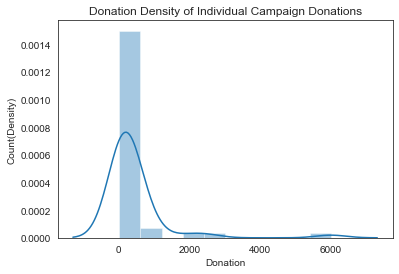

In [22]:
# donation density 
sns.distplot(x=data['contribution_receipt_amount'], bins=10)
plt.title('Donation Density of Individual Campaign Donations')
plt.xlabel('Donation')
plt.ylabel('Count(Density)')
plt.show()

Hypothesis Testing

Hypothesis 1: The head and tails of the month get a higher amount of donations than the middle. Any campaign sets fundraising goals - most want to meet these goals. Therefore there's pressure at the beginning and the end of the month to raise money. This is similiar to ticket quotas for police officers.  

Do the beginning and end of the months raise more money than the middle? It's important to note these are continuous numebers for the beginning of 2021, meaning that these dates are grouped for each month. 

Text(0, 0.5, 'Donation Amount')

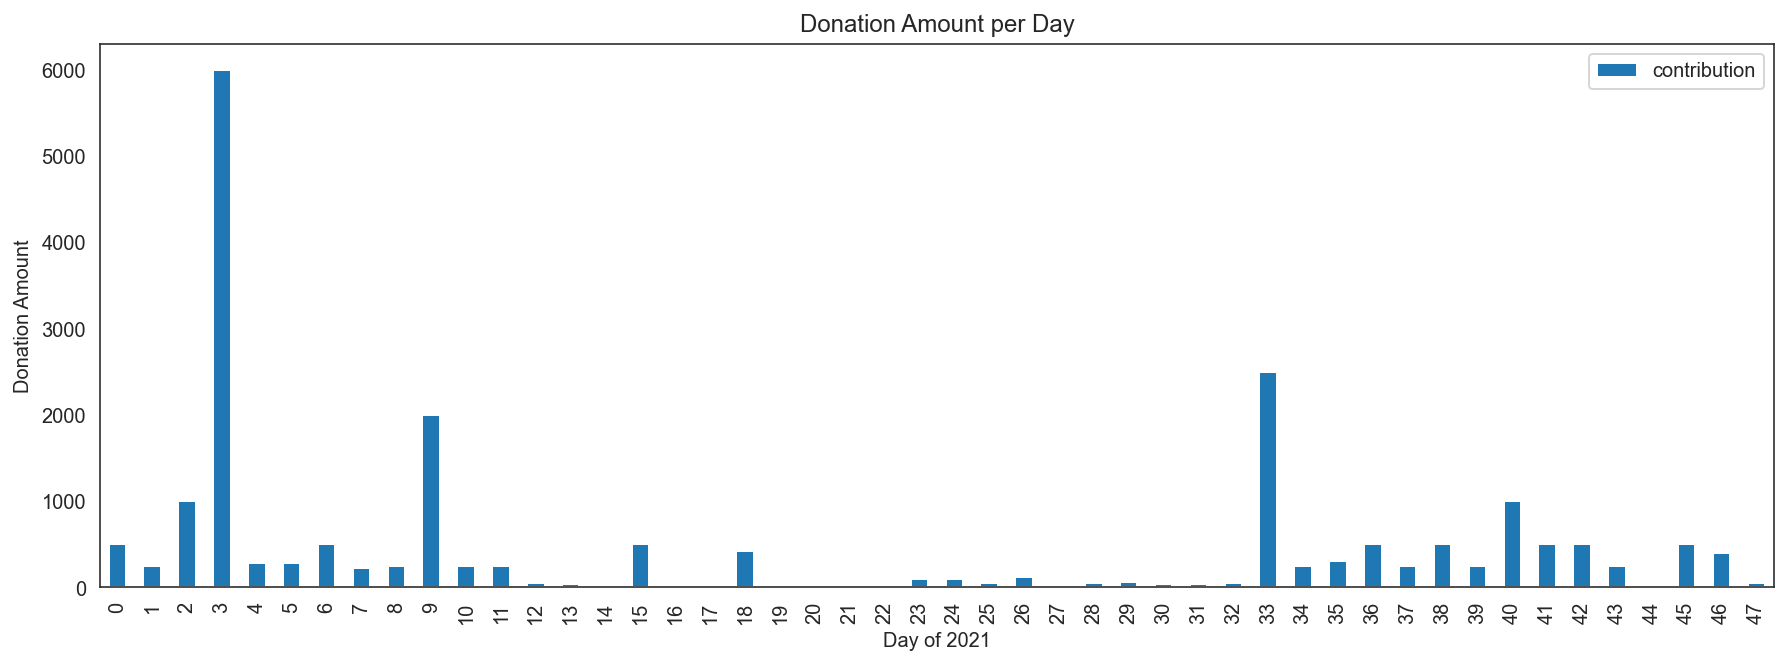

In [116]:
# days of the month that get the most donations
grouped_dates = pd.DataFrame({'date': data['contribution_receipt_date'], 'contribution': data['contribution_receipt_amount']})
grouped_dates['Day-Year'] = grouped_dates['date'].apply(lambda x: "%d/%d" % (x.day, x.year))
grouped_dates.groupby(['Day-Year', data['contribution_receipt_date']]).size()

ax = states.plot(kind='bar',figsize=(15,5), title='Donation Amount per Day')
ax.set_xlabel('Day of 2021')
ax.set_ylabel('Donation Amount')

Hypothesis 2: States with higher poplulations have higher amounts of donations. I believe that the more people in that state, the higher the probability that someone would like a candidate enough to donate to that person. Therefore higher states have a higher amount of donations. 

Do states with higher populations have higher amounts of money?

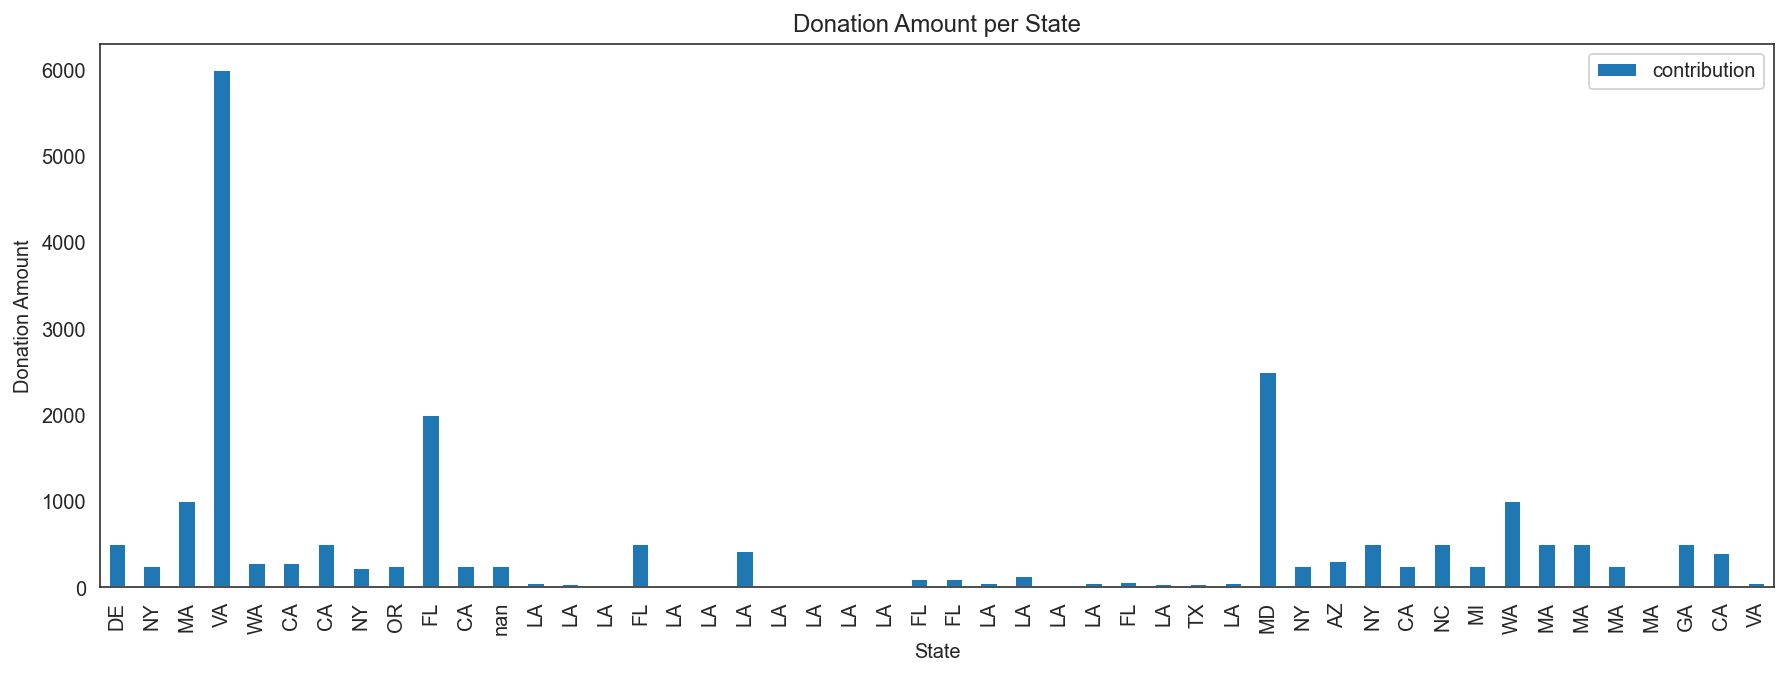

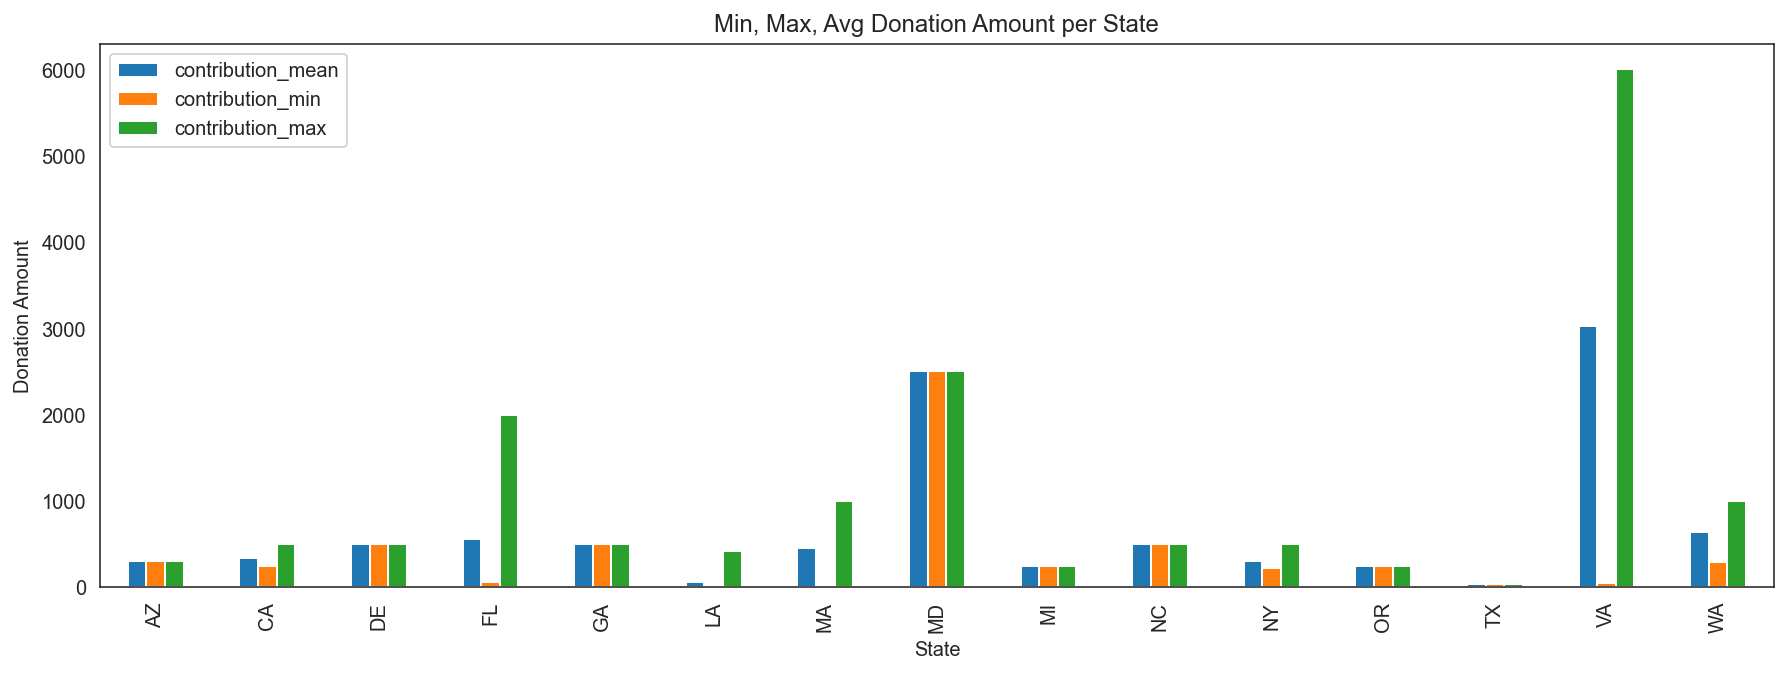

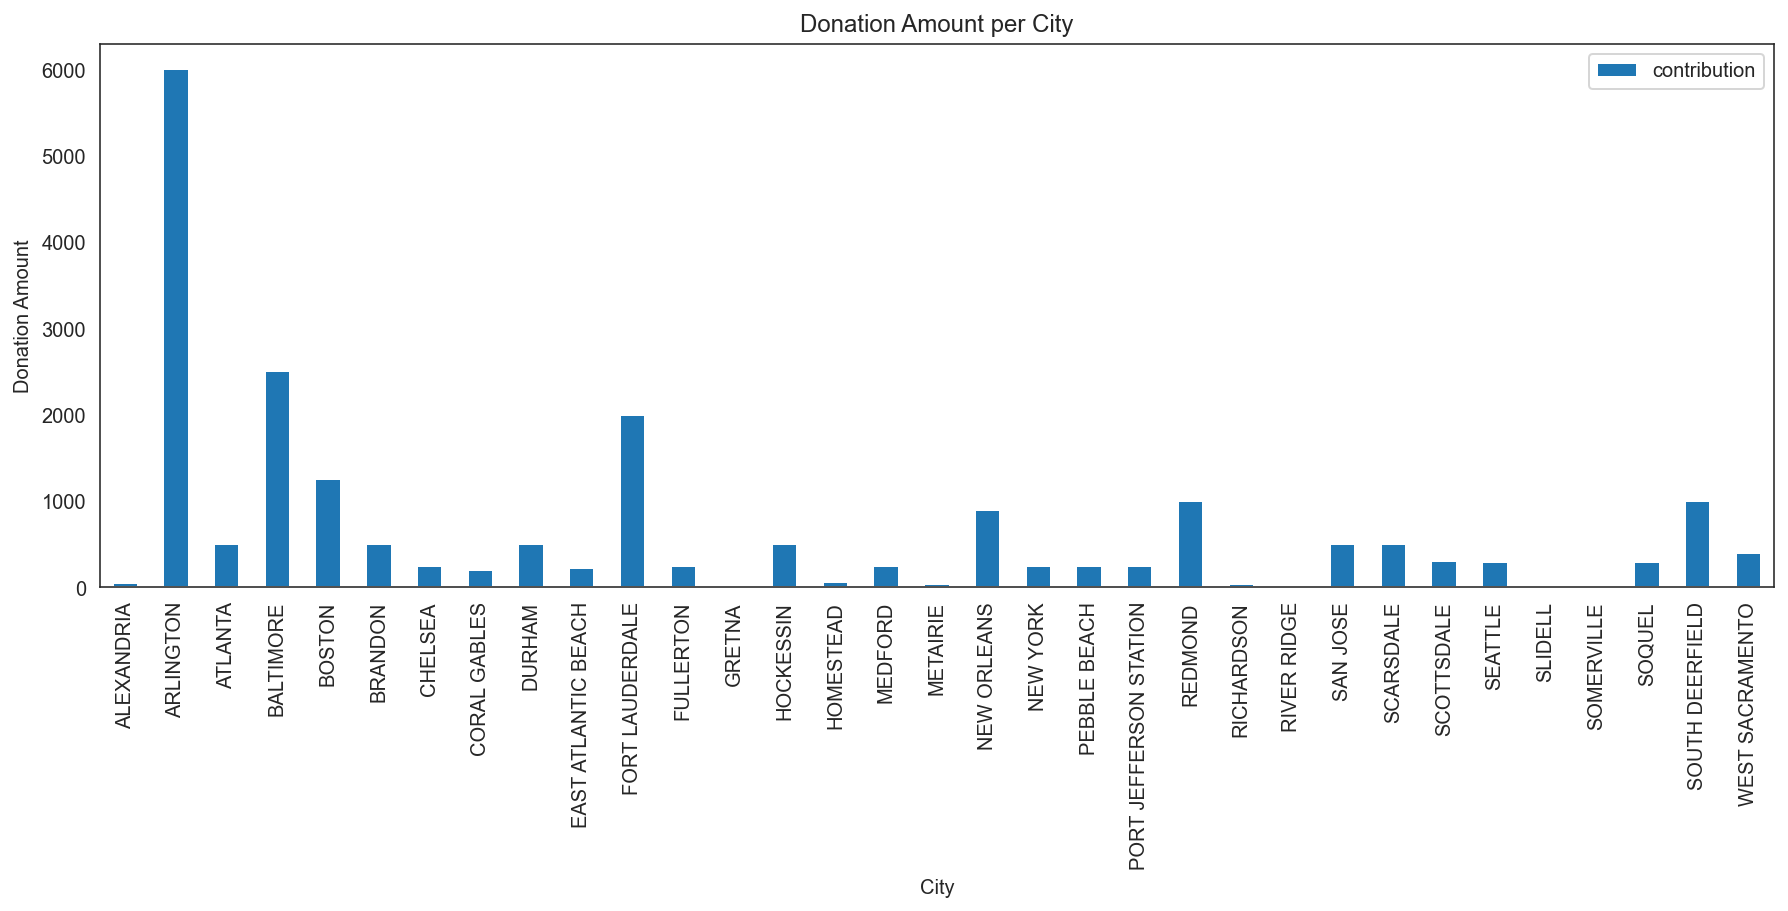

In [114]:
%config InlineBackend.figure_format='retina'
#this groups not sums the data 
grouped_states = pd.DataFrame({'State': data['contributor_state'], 'contribution': data['contribution_receipt_amount']})
grouped_states.groupby(['State', data['contribution_receipt_amount']])

#this gives the number of donations per city but what about cities with the same name in differerent states
#states = pd.DataFrame({'state': data['contributor_state'], 'city': data['contributor_city'], 'contribution': data['contribution_receipt_amount']})
#state_city = states.groupby(['state', 'city']).size().reset_index().groupby('city')[[0]].max()
#print(state_city)

#this gives the amount of donations per state
states = pd.DataFrame({'State': data['contributor_state'], 'contribution': data['contribution_receipt_amount']})
states.set_index('State', inplace=True)
states.sum(level='State')
ax1 = states.plot(kind='bar',figsize=(15,5), title='Donation Amount per State')
ax1.set_ylabel('Donation Amount')

#this gives the information for each state (mean, min, max)
states = pd.DataFrame({'State': data['contributor_state'], 'contribution': data['contribution_receipt_amount']})
state_city = states.groupby(['State']).agg({'contribution': ['mean', 'min', 'max']})
state_city.columns = ['contribution_mean','contribution_min','contribution_max']
ax2 = state_city.plot(kind='bar',figsize=(15,5), title='Min, Max, Avg Donation Amount per State')
ax2.set_ylabel('Donation Amount')

#this gives the amount of donations for each city, for each state 
states = pd.DataFrame({'State': data['contributor_state'], 'City': data['contributor_city'], 'contribution': data['contribution_receipt_amount']})
state_city = states.groupby(['State', 'City']).sum().reset_index().groupby('City').max()
state_city.sum(level='City')
ax3 = state_city.plot(kind='bar',figsize=(15,5), title='Donation Amount per City')
ax3.set_ylabel('Donation Amount')

plt.show()

Hypothesis 3: Executives donate more than any other profession. I believe that becuase executives may have more dispoable money than others, they may donate more. 

Do individuals who make more, donate more than others?

<AxesSubplot:title={'center':'Donation Amount Per Occupation'}, xlabel='contributor_occupation'>

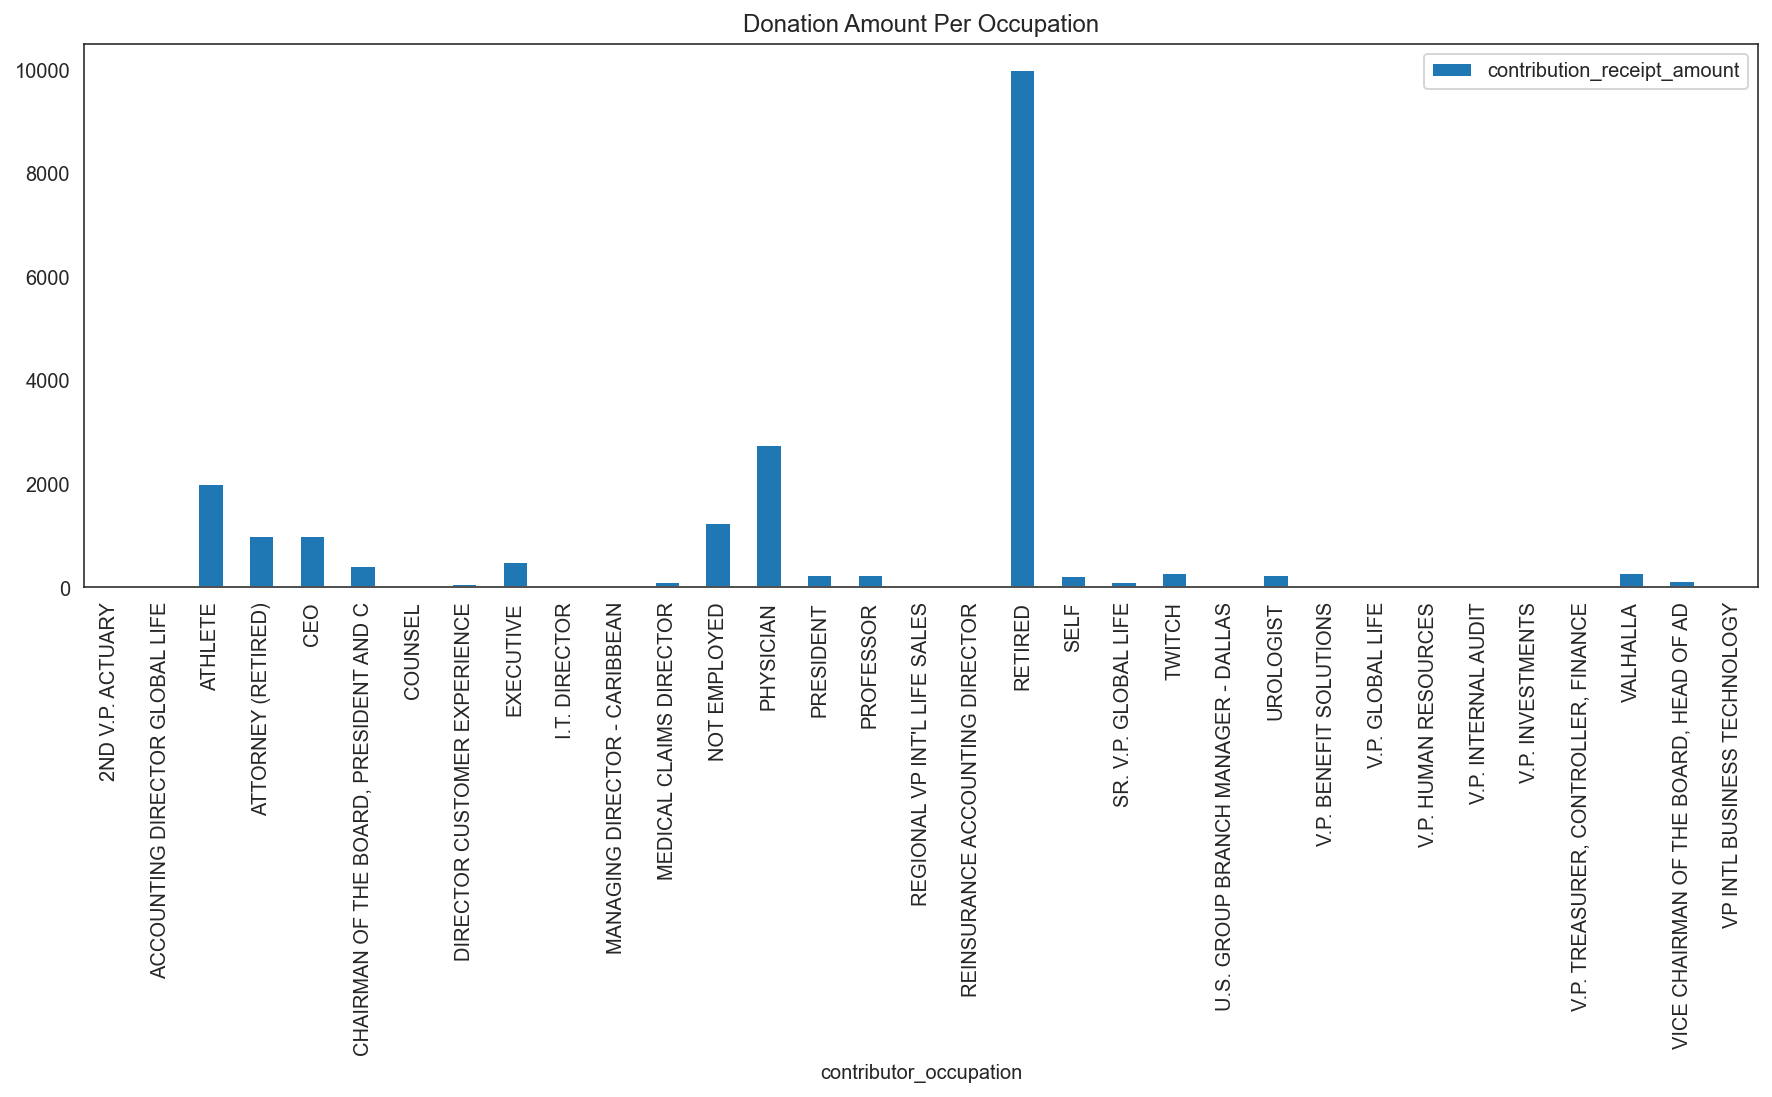

In [103]:
#this gives the overview of the occupation
occupation = data.contributor_occupation.value_counts()[:10]

#this gives the amount of donations per occupuation
grouped_occupation = data.pivot_table('contribution_receipt_amount', index = 'contributor_occupation',aggfunc='sum')
ax4 = grouped_occupation.plot(kind='bar',figsize=(15,5), title='Donation Amount Per Occupation')
ax4.set_ylabel('Donation Amount')

    Hypothesis 4: Do individuals with certain names donate more than others? 

In [106]:
#this gives information if people with certain last names donate more
name = pd.DataFrame({'LastName': data['contributor_last_name'], 'contribution': data['contribution_receipt_amount']})
last_names = name.groupby(['LastName']).agg({'contribution': ['mean', 'min', 'max']})
last_names.columns = ['contribution_mean','contribution_min','contribution_max']

#this gives information if people with certain first names donate more
name = pd.DataFrame({'FirstName': data['contributor_first_name'], 'contribution': data['contribution_receipt_amount']})
first_names = name.groupby(['FirstName']).agg({'contribution': ['mean', 'min', 'max']})
first_names.columns = ['contribution_mean','contribution_min','contribution_max']

Text(0, 0.5, 'Donation Amount')

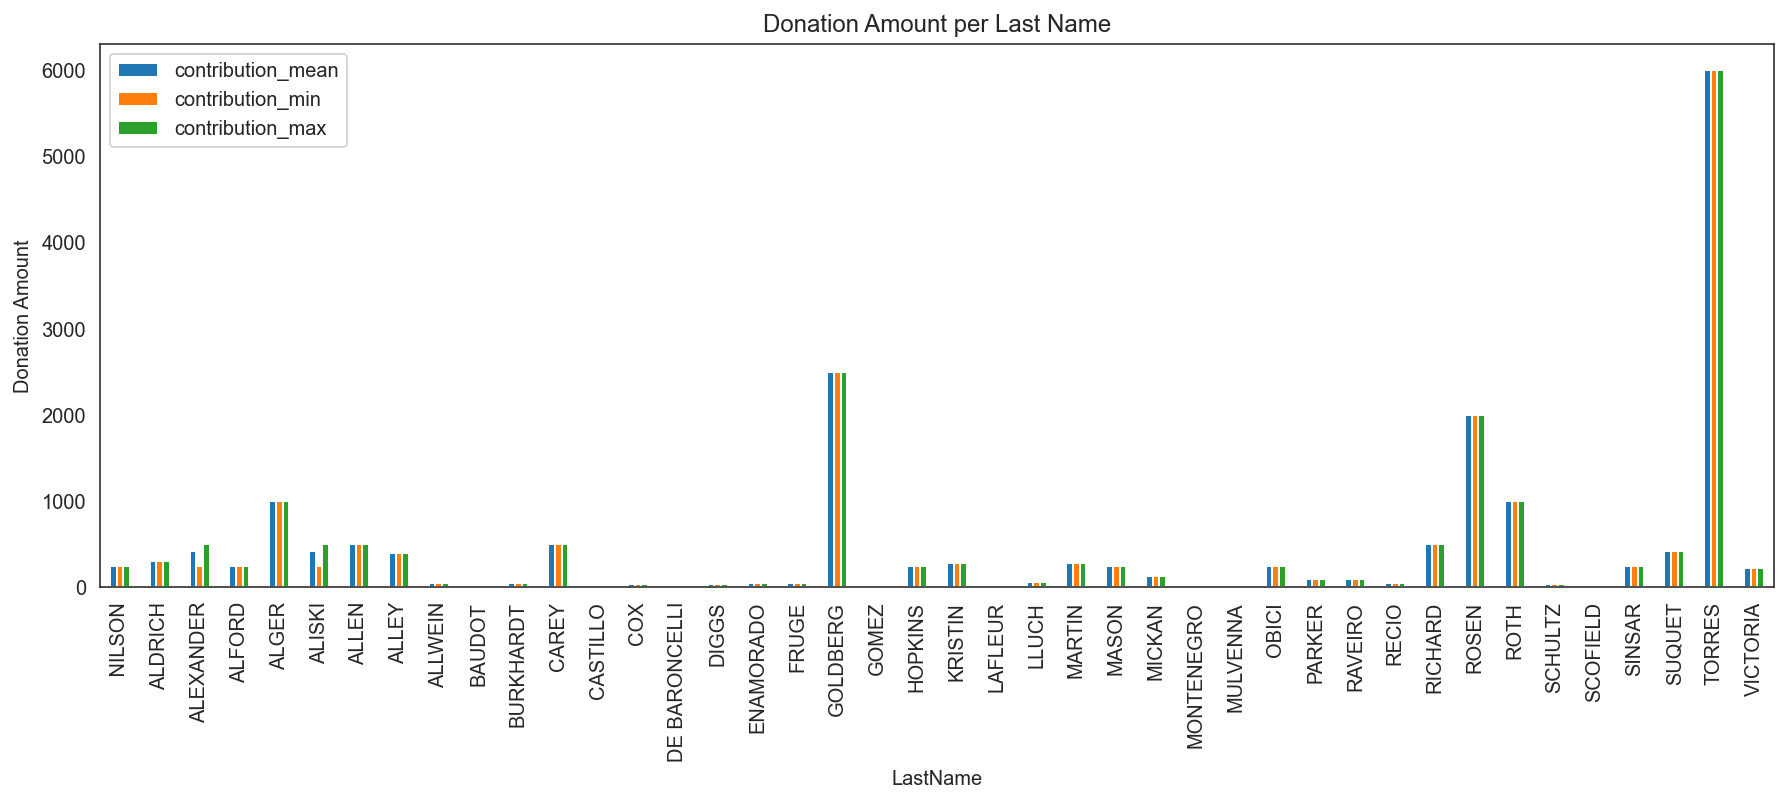

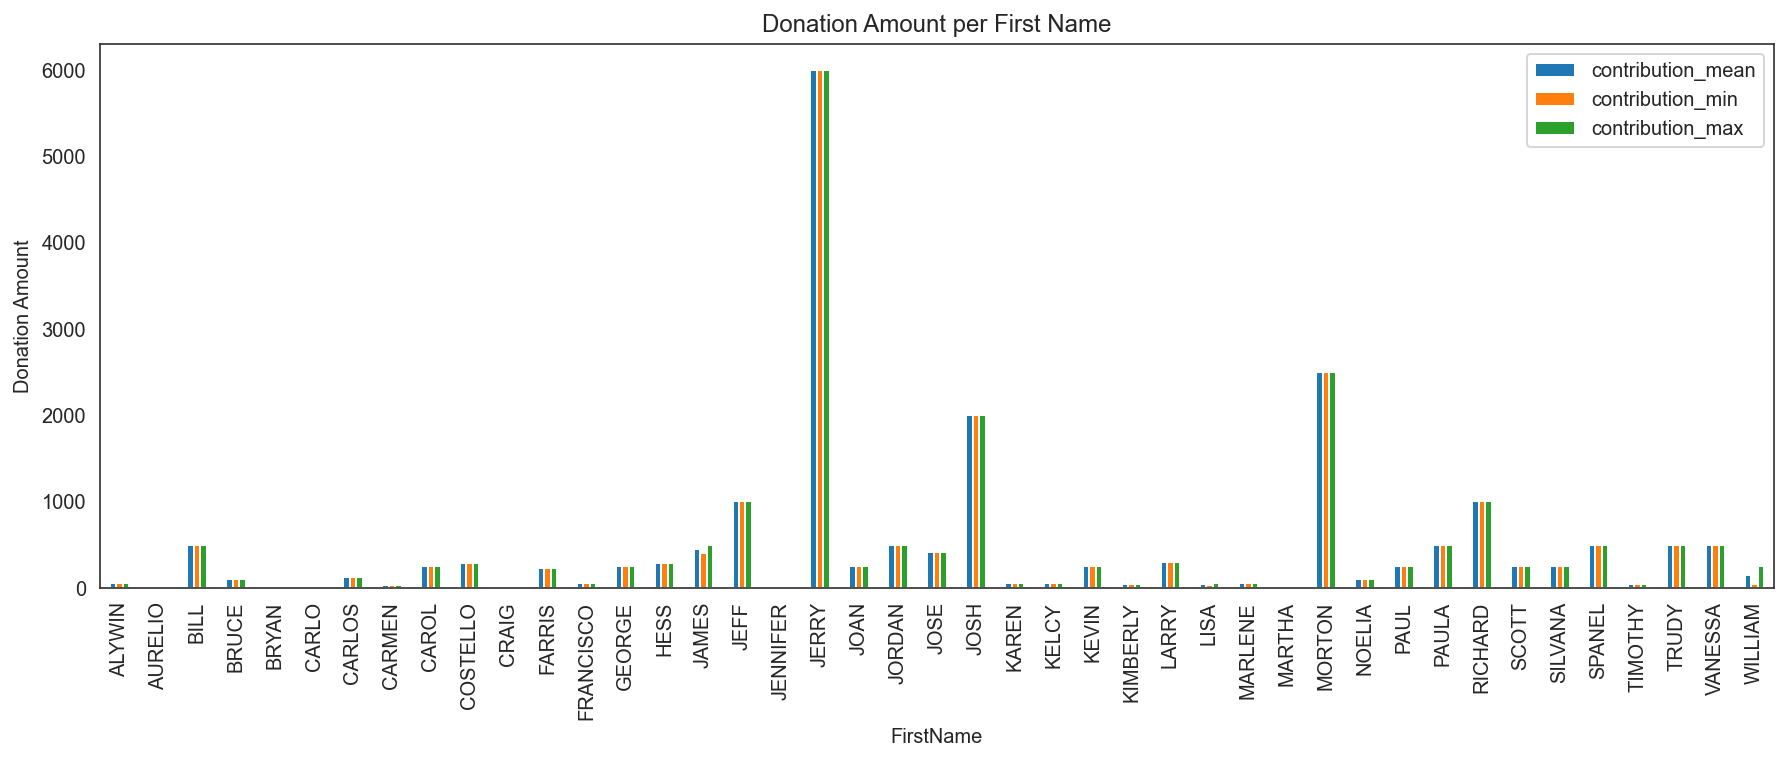

In [115]:
ax5 = last_names.plot(kind='bar',figsize=(15,5), title='Donation Amount per Last Name')
ax5.set_ylabel('Donation Amount')

ax6 = first_names.plot(kind='bar',figsize=(15,5), title='Donation Amount per First Name')
ax6.set_ylabel('Donation Amount')